In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import geopandas as gpd
import seaborn as sns
import missingno as msno

%matplotlib inline

In [2]:
#global pandas options
pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x))

<h1>NCR School Dataset</h1>

In [3]:
#  reading in csv to pandas dataframe
#  for NCR school list data
ncr_school = pd.read_csv('data/ncr_schools.csv') 

ncr_school.head()

,Region,Division,District,BEIS School ID,School Name,Street Address,Municipality,Legislative District,Barangay,Sector,Urban/Ru,Sacl hColaosls Sifuicbactliaosnsification,Modified Curricural Offering Classification
0,NCR,City of San Juan,San Juan Distr,ct I136744,Pedro Cruz Elementary,114 Lope K. Santos Street Barangay Pedro San J...,CITY OF SAN JUAN,Lone District,PEDRO CRUZ,Public,Urban,DepED Managed,Purely ES
1,NCR,City of San Juan,San Juan Distr,ct I136745,Salapan ES,"11- S. Veloso St.,",CITY OF SAN JUAN,Lone District,SALAPAN,Public,Urban,DepED Managed,Purely ES
2,NCR,City of San Juan,San Juan Distr,ct I136746,San Juan ES,N. Domingo cor. A. Luna St.,CITY OF SAN JUAN,Lone District,BALONG-BATO,Public,Urban,DepED Managed,Purely ES
3,NCR,City of San Juan,San Juan Distr,ct I136747,San Perfecto ES,A. Adevoso St. Cor. San Gabriel St.,CITY OF SAN JUAN,Lone District,SAN PERFECTO,Public,Urban,DepED Managed,Purely ES
4,NCR,City of San Juan,San Juan Distr,ct I305423,San Juan National High School,P. Narciso,CITY OF SAN JUAN,Lone District,CORAZON DE JESUS,Public,Urban,DepED Managed,JHS with SHS


In [4]:
ncr_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Region                                       3059 non-null   object
 1   Division                                     3059 non-null   object
 2   District                                     3059 non-null   object
 3   BEIS School ID                               3059 non-null   object
 4   School Name                                  3059 non-null   object
 5   Street Address                               3059 non-null   object
 6   Municipality                                 3059 non-null   object
 7   Legislative District                         3059 non-null   object
 8   Barangay                                     3055 non-null   object
 9   Sector                                       3059 non-null   object
 10  Urban/Ru    

<p>
<p>There are no numerical data in this dataset</p>
<p>Several of these features shall be removed either because of its irrelevance or because of its redundancy.</p>
<p>The following features shall be retained:</p>
<ol>
<li>Division</li>
<li>School Name</li>
<li>Sector</li>
<li>School Classification</li>
<li>Curricural Offering Classification</li>
</ol>
<br>
<em><p>There are no missing values in this dataset either</p></em>
<br>
<p>From this preliminary diagnosis of the dataset, the following changes shall then be enacted:</p>
<ol>
<li>Removal of irrelevant and/or redundant features</li>
<li>Rename column to follow the snake case</li>
</ol>
<p>After implementing said changes, we will then proceed to examining the data within each entry to check for errors or inconsistencies.</p>

<h2>Data Cleaning</h2>

In [5]:
#  features that are to be kept 
relevant_school_col = ['Division',
                 'School Name',
                 'Sector',
                 'Sacl hColaosls Sifuicbactliaosnsification',
                 'Modified Curricural Offering Classification'
                 ]

#  retaining only relevant columns
pithy_ncr_school = ncr_school[relevant_school_col]

pithy_ncr_school.head()

,Division,School Name,Sector,Sacl hColaosls Sifuicbactliaosnsification,Modified Curricural Offering Classification
0,City of San Juan,Pedro Cruz Elementary,Public,DepED Managed,Purely ES
1,City of San Juan,Salapan ES,Public,DepED Managed,Purely ES
2,City of San Juan,San Juan ES,Public,DepED Managed,Purely ES
3,City of San Juan,San Perfecto ES,Public,DepED Managed,Purely ES
4,City of San Juan,San Juan National High School,Public,DepED Managed,JHS with SHS


In [6]:
#  column names to snake case 
snek_school_col = {'Division': 'city',
                'School Name': 'school_name',
                'Sector': 'sector',
                'Sacl hColaosls Sifuicbactliaosnsification': 'school_subclass',
                'Modified Curricural Offering Classification': 'curricular_class'}

#  changing column names to snake case
pithy_ncr_school = pithy_ncr_school.rename(columns=snek_school_col)

pithy_ncr_school.head()

,city,school_name,sector,school_subclass,curricular_class
0,City of San Juan,Pedro Cruz Elementary,Public,DepED Managed,Purely ES
1,City of San Juan,Salapan ES,Public,DepED Managed,Purely ES
2,City of San Juan,San Juan ES,Public,DepED Managed,Purely ES
3,City of San Juan,San Perfecto ES,Public,DepED Managed,Purely ES
4,City of San Juan,San Juan National High School,Public,DepED Managed,JHS with SHS


In [7]:
def get_unique(df) -> dict:
    """
    This function retrieves the unique values for each column in a dataframe.
    
    The function accepts a dataframe as an argument and returns a dictionary.        
    """
    
    unique_dict = {}
    
    col_list = df.columns
    
    for col in col_list:
        unique_val = df[col].unique()
        unique_dict[col] = unique_val
    
    return unique_dict

In [8]:
unique_school = get_unique(pithy_ncr_school)

unique_school

{'city': array(['City of San Juan', 'Navotas', 'Manila', 'Quezon City',
        'Pasay City', 'Caloocan City', 'Mandaluyong City', 'Marikina City',
        'Makati City', 'Pasig City', 'Paranaque City', 'Las Piñas City',
        'Valenzuela City', 'Malabon City', 'Taguig', 'Muntinlupa City'],
       dtype=object),
 'school_name': array(['Pedro Cruz Elementary', 'Salapan ES', 'San Juan ES', ...,
        "Cambridge Children's Learning and Development Holdings, Inc.",
        'Holy Word Christian School', 'Edith Learning Center Inc.'],
       dtype=object),
 'sector': array(['Public', 'Private', 'SUCs/LUCs'], dtype=object),
 'school_subclass': array(['DepED Managed', 'Sectarian', 'Non-Sectarian', 'LUC',
        'SUC Managed', 'DOST Managed', 'Local Government'], dtype=object),
 'curricular_class': array(['Purely ES', 'JHS with SHS', 'Purely SHS',
        'All Offering (K to 12)', 'ES and JHS (K to 10)', 'Purely JHS'],
       dtype=object)}

<p>school_name column has too many unique values, so it wil not be examined in depth anymore.</p>
<p>division column shows that there are 16 cities/divisions in the dataset. We will only use 7 out of the 16 cities/divisions. We will try to make the format of the values in this column more uniformed.</p>
<p>For the values in the other columns, we will transform it to lowercase.</p>

In [9]:
#  cleaning the city column
pithy_ncr_school['city'] = pithy_ncr_school['city'].str.replace(r'City','')
pithy_ncr_school['city'] = pithy_ncr_school['city'].str.replace(r'of','')

pithy_ncr_school.sample(5)

,city,school_name,sector,school_subclass,curricular_class
2423,Las Piñas,St. Thomas Aquinas School - Las Piñas Inc.,Private,Non-Sectarian,Purely ES
2201,Paranaque,ST. RAYMOND'S NURSERY AND KINDERGARTEN SCHOOL,Private,Non-Sectarian,Purely ES
60,Navotas,San Jose Academy,Private,Sectarian,All Offering (K to 12)
2371,Las Piñas,Madre Giulia Salzano School,Private,Sectarian,ES and JHS (K to 10)
9,San Juan,Xavier School,Private,Sectarian,All Offering (K to 12)


In [10]:
#  transforming to lowercase and removing whitespace from the value in all columns
pithy_ncr_school['city'] = pithy_ncr_school['city'].apply(lambda x: x.strip().lower())

In [11]:
#  distilling the dataset to extract the seven main cities
cities_school = ['san juan',
                 'manila',
                 'quezon', 
                 'mandaluyong',
                 'pasig',
                 'makati',
                 'taguig']

clean_ncr_schools = pithy_ncr_school.loc[pithy_ncr_school.city.isin(cities_school)]

In [12]:
#  saving the clean dataset to csv
clean_ncr_schools.to_csv('data/clean/clean_ncr_school.csv')

In [13]:
clean_ncr_schools.sample(15)

,city,school_name,sector,school_subclass,curricular_class
1218,quezon,Leopoldo B. Santos ES,Public,DepED Managed,Purely ES
705,quezon,St. Vincent School of Quezon City,Private,Non-Sectarian,Purely ES
1190,quezon,"Lady Anne's Preparatory School of Q.C., Inc.",Private,Non-Sectarian,Purely ES
656,quezon,Jeshua Kinderland Christian Academy,Private,Non-Sectarian,Purely ES
189,manila,"Kinder Bright Montessori School, Inc.",Private,Non-Sectarian,Purely ES
1847,makati,AMA Computer Learning Center of Guadalupe Maka...,Private,Non-Sectarian,Purely SHS
2813,taguig,"Saint Helena School, Inc.",Private,Non-Sectarian,ES and JHS (K to 10)
771,quezon,Holy Child Academy- Main,Private,Non-Sectarian,All Offering (K to 12)
721,quezon,"Jelaine Academy of Quezon City, Inc.",Private,Non-Sectarian,Purely ES
1180,quezon,Central Colleges of the Philippines,Private,Non-Sectarian,JHS with SHS


<h2>Exploratory Data Analysis</h2>

In [14]:
#  palettes for plotting
city_palettes = {'san juan': 'red', 
                 'manila': 'blue', 
                 'quezon': 'yellow', 
                 'mandaluyong': 'green',
                 'makati': 'orange', 
                 'pasig': 'pink', 
                 'taguig': 'purple'}

sector_palettes = {'Public': 'orange', 
                   'Private': 'blue',
                   'SUCs/LUCs': 'green'}

subclass_palettes = {'DepED Managed': 'red', 
                     'Sectarian': 'green', 
                     'Non-Sectarian': 'orange', 
                     'LUC': 'pink',
                     'SUC Managed': 'purple', 
                     'DOST Managed': 'blue', 
                     'Local Government': 'yellow'}

curricular_palettes = {'Purely ES': 'red', 
                       'JHS with SHS': 'blue', 
                       'Purely SHS': 'green',
                       'All Offering (K to 12)': 'orange', 
                       'ES and JHS (K to 10)': 'purple',  
                       'Purely JHS': 'pink'}

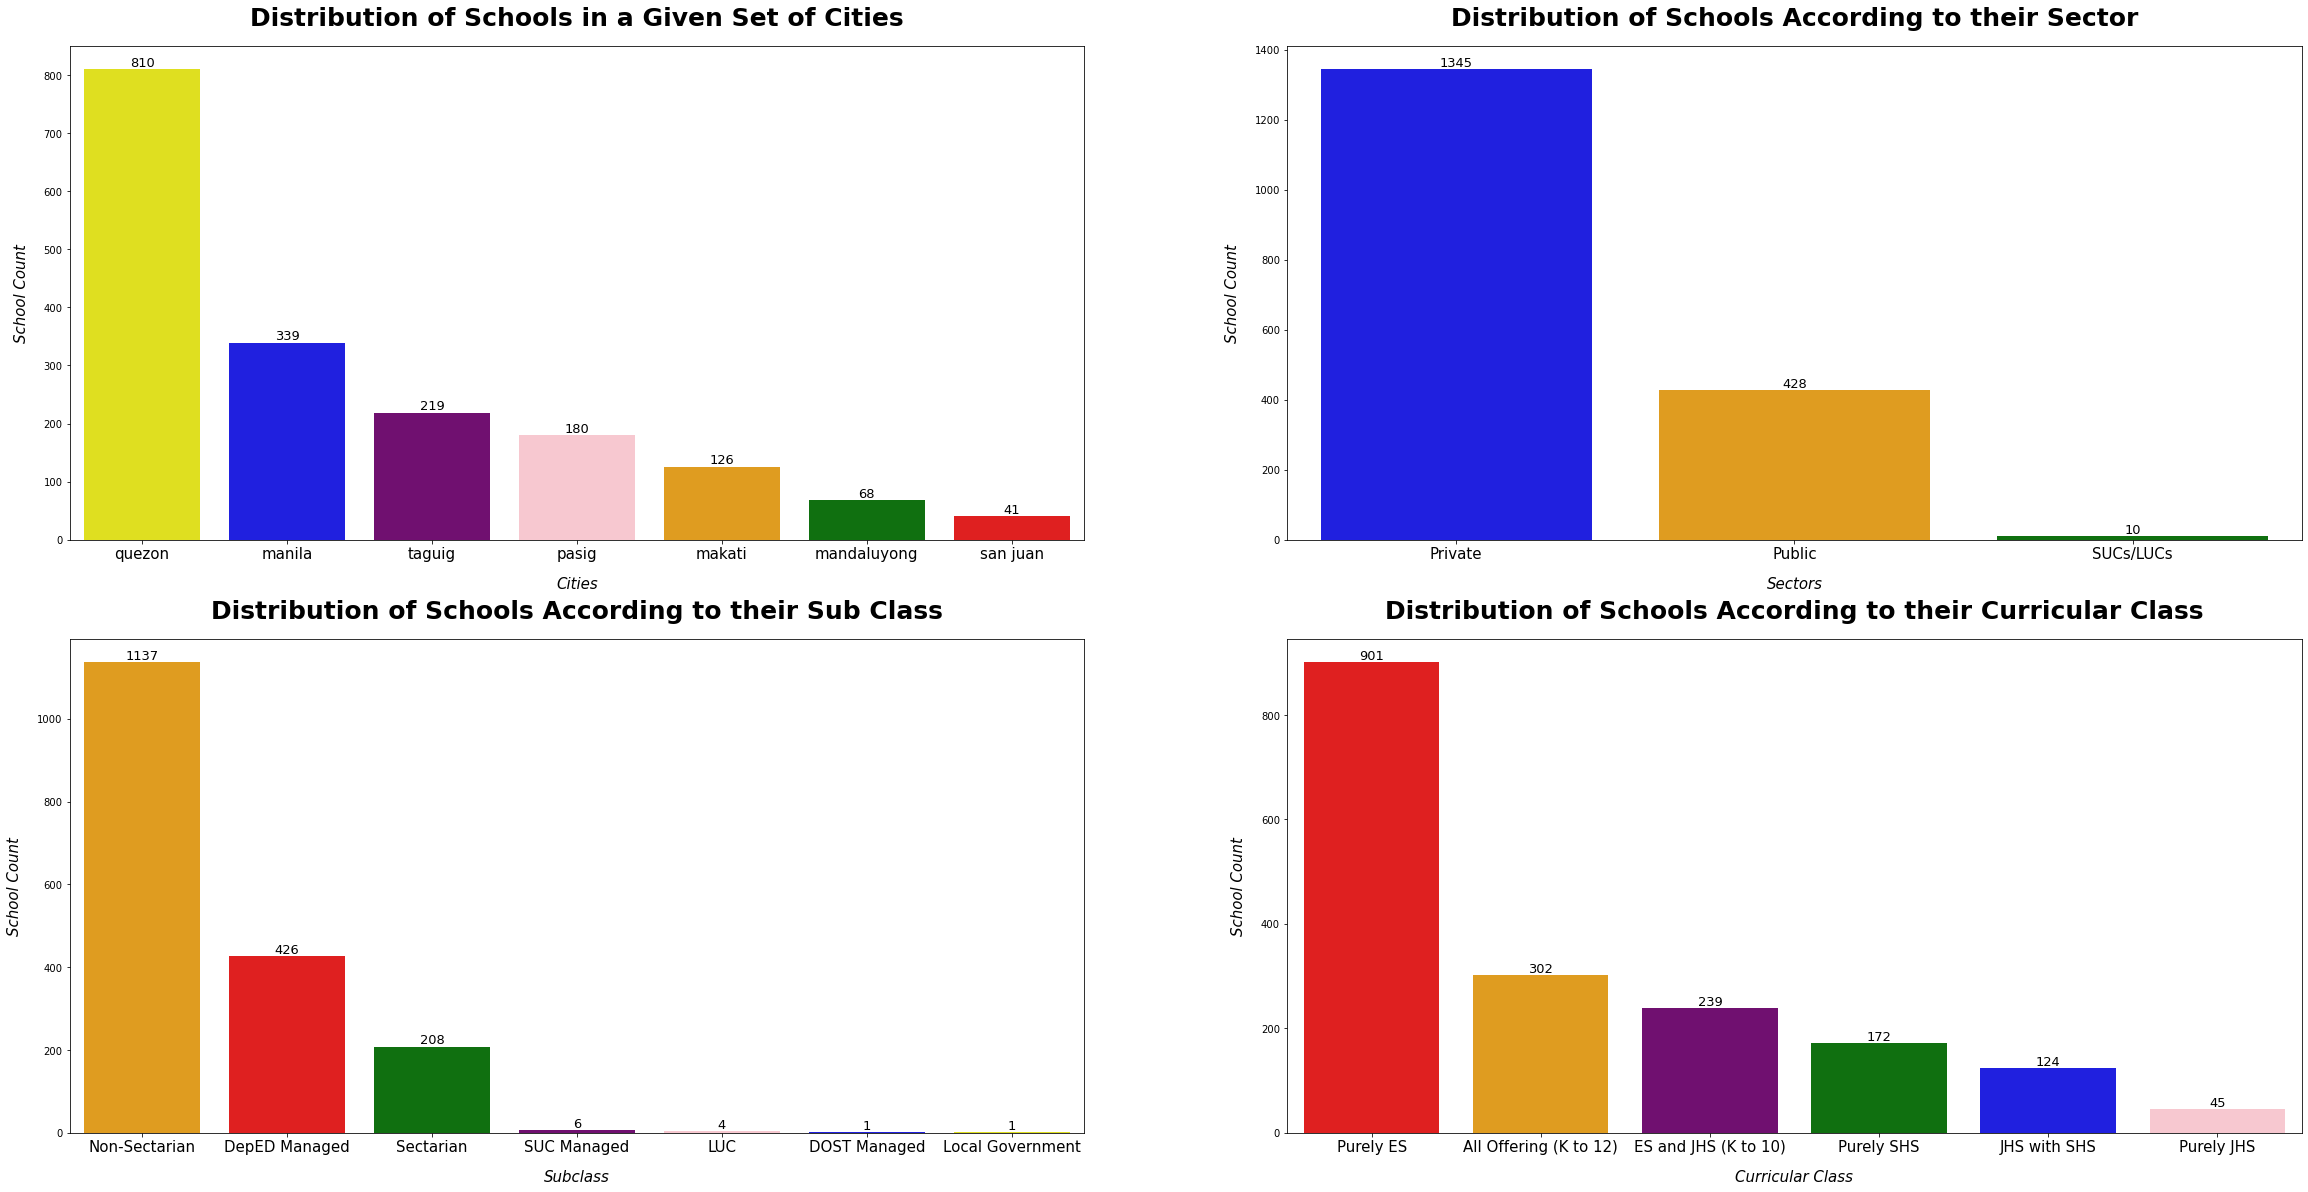

In [15]:
#  creating figure 
fig = plt.figure(figsize=(40,20))

#  bar chart to show the distribution of schools in the seven cities 
city_school_dist = clean_ncr_schools.groupby('city').school_name.count().reset_index().sort_values(by='school_name', ascending=False)

ax_city_school = fig.add_subplot(221)
ax_city_school = sns.barplot(x = city_school_dist.city, y = city_school_dist.school_name, palette=city_palettes)

ax_city_school.bar_label(ax_city_school.containers[0], size=13);
ax_city_school.set_ylabel('School Count', size=15, labelpad=15, style='italic')
ax_city_school.set_xlabel('Cities', size=15, labelpad=15, style='italic')
ax_city_school.set_title('Distribution of Schools in a Given Set of Cities', size=25, weight='bold', pad=20);

plt.xticks(size=15);

# bar chart to show distribution of schools re the sector they belong to

sector_school_dist = clean_ncr_schools.groupby('sector').school_name.count().reset_index().sort_values(by='school_name', ascending=False)

ax_sector_school = fig.add_subplot(222)
ax_sector_school = sns.barplot(x = sector_school_dist.sector, y = sector_school_dist.school_name, palette=sector_palettes)

ax_sector_school.bar_label(ax_sector_school.containers[0], size=13);
ax_sector_school.set_ylabel('School Count', size=15, labelpad=15, style='italic')
ax_sector_school.set_xlabel('Sectors', size=15, labelpad=15, style='italic')
ax_sector_school.set_title('Distribution of Schools According to their Sector', size=25, weight='bold', pad=20);

plt.xticks(size=15);

# bar chart to show distribution of schools re the subclass they are categorized as
subclass_school_dist = clean_ncr_schools.groupby('school_subclass').school_name.count().reset_index().sort_values(by='school_name', ascending=False)

ax_subclass_school = fig.add_subplot(223)
ax_subclass_school = sns.barplot(x = subclass_school_dist.school_subclass, y = subclass_school_dist.school_name, palette=subclass_palettes)

ax_subclass_school.bar_label(ax_subclass_school.containers[0], size=13);
ax_subclass_school.set_ylabel('School Count', size=15, labelpad=15, style='italic')
ax_subclass_school.set_xlabel('Subclass', size=15, labelpad=15, style='italic')
ax_subclass_school.set_title('Distribution of Schools According to their Sub Class', size=25, weight='bold', pad=20);

plt.xticks(size=15);

# bar chart to show distribution of schools re the curricular class they are categorized as
curclass_school_dist = clean_ncr_schools.groupby('curricular_class').school_name.count().reset_index().sort_values(by='school_name', ascending=False)

ax_curclass_school = fig.add_subplot(224)
ax_curclass_school = sns.barplot(x = curclass_school_dist.curricular_class, y = curclass_school_dist.school_name, palette=curricular_palettes)

ax_curclass_school.bar_label(ax_curclass_school.containers[0], size=13);
ax_curclass_school.set_ylabel('School Count', size=15, labelpad=15, style='italic')
ax_curclass_school.set_xlabel('Curricular Class', size=15, labelpad=15, style='italic')
ax_curclass_school.set_title('Distribution of Schools According to their Curricular Class', size=25, weight='bold', pad=20);

plt.xticks(size=15);



In [16]:
def city_school_info(city):
    
    city_info = clean_ncr_schools.query(f"city == '{city}'")
    
    #  creating figure 
    fig = plt.figure(figsize=(40,20))

    # bar chart to show distribution of schools re the sector they belong to
    sector_school_dist = city_info.groupby('sector').school_name.count().reset_index().sort_values(by='school_name', ascending=False)

    ax_sector_school = fig.add_subplot(221)
    ax_sector_school = sns.barplot(x = sector_school_dist.sector, y = sector_school_dist.school_name, palette=sector_palettes)

    ax_sector_school.bar_label(ax_sector_school.containers[0], size=13);
    ax_sector_school.set_ylabel('School Count', size=15, labelpad=15, style='italic')
    ax_sector_school.set_xlabel('Sectors', size=15, labelpad=15, style='italic')
    ax_sector_school.set_title(f'Distribution of Schools in {city.capitalize()} According to their Sector', size=25, weight='bold', pad=20);

    plt.xticks(size=15);

    # bar chart to show distribution of schools re the subclass they are categorized as
    subclass_school_dist = city_info.groupby('school_subclass').school_name.count().reset_index().sort_values(by='school_name', ascending=False)

    ax_subclass_school = fig.add_subplot(222)
    ax_subclass_school = sns.barplot(x = subclass_school_dist.school_subclass, y = subclass_school_dist.school_name, palette=subclass_palettes)

    ax_subclass_school.bar_label(ax_subclass_school.containers[0], size=13);
    ax_subclass_school.set_ylabel('School Count', size=15, labelpad=15, style='italic')
    ax_subclass_school.set_xlabel('Subclass', size=15, labelpad=15, style='italic')
    ax_subclass_school.set_title(f'Distribution of Schools in {city.capitalize()} According to their Sub Class', size=25, weight='bold', pad=20);

    plt.xticks(size=15);

    # bar chart to show distribution of schools re the curricular class they are categorized as
    curclass_school_dist = city_info.groupby('curricular_class').school_name.count().reset_index().sort_values(by='school_name', ascending=False)

    ax_curclass_school = fig.add_subplot(223)
    ax_curclass_school = sns.barplot(x = curclass_school_dist.curricular_class, y = curclass_school_dist.school_name, palette=curricular_palettes)

    ax_curclass_school.bar_label(ax_curclass_school.containers[0], size=13);
    ax_curclass_school.set_ylabel('School Count', size=15, labelpad=15, style='italic')
    ax_curclass_school.set_xlabel('Curricular Class', size=15, labelpad=15, style='italic')
    ax_curclass_school.set_title(f'Distribution of Schools in {city.capitalize()} According to their Curricular Class', size=25, weight='bold', pad=20);

    plt.xticks(size=15);
    
    fig.suptitle(f'Data on Schools in {city.capitalize()}', size=35, weight='bold');

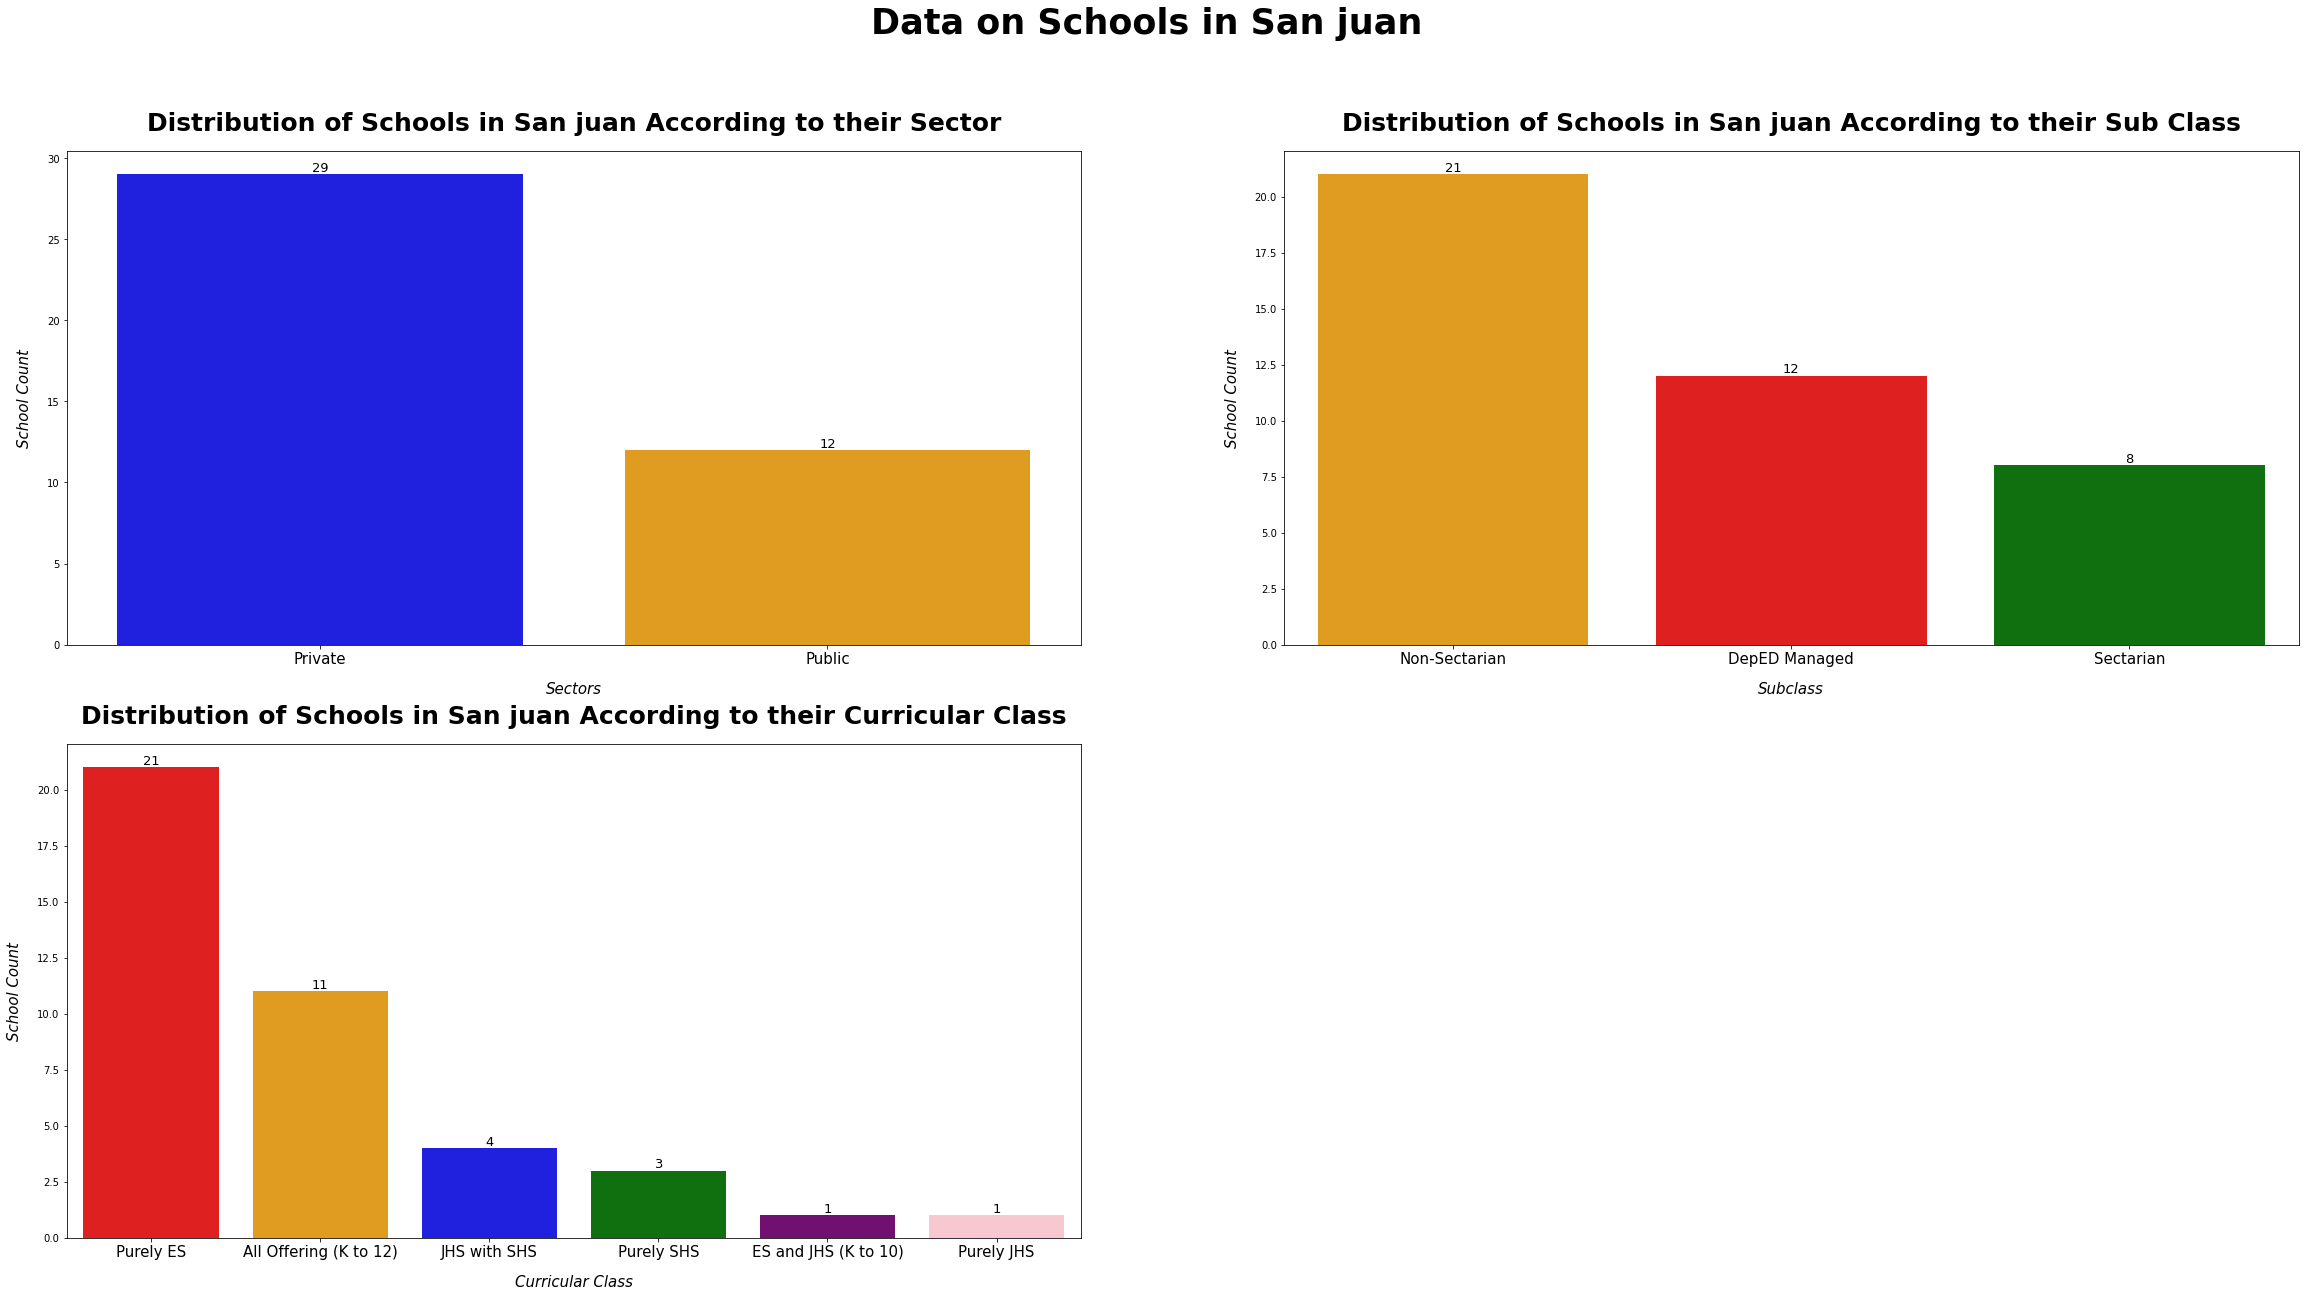

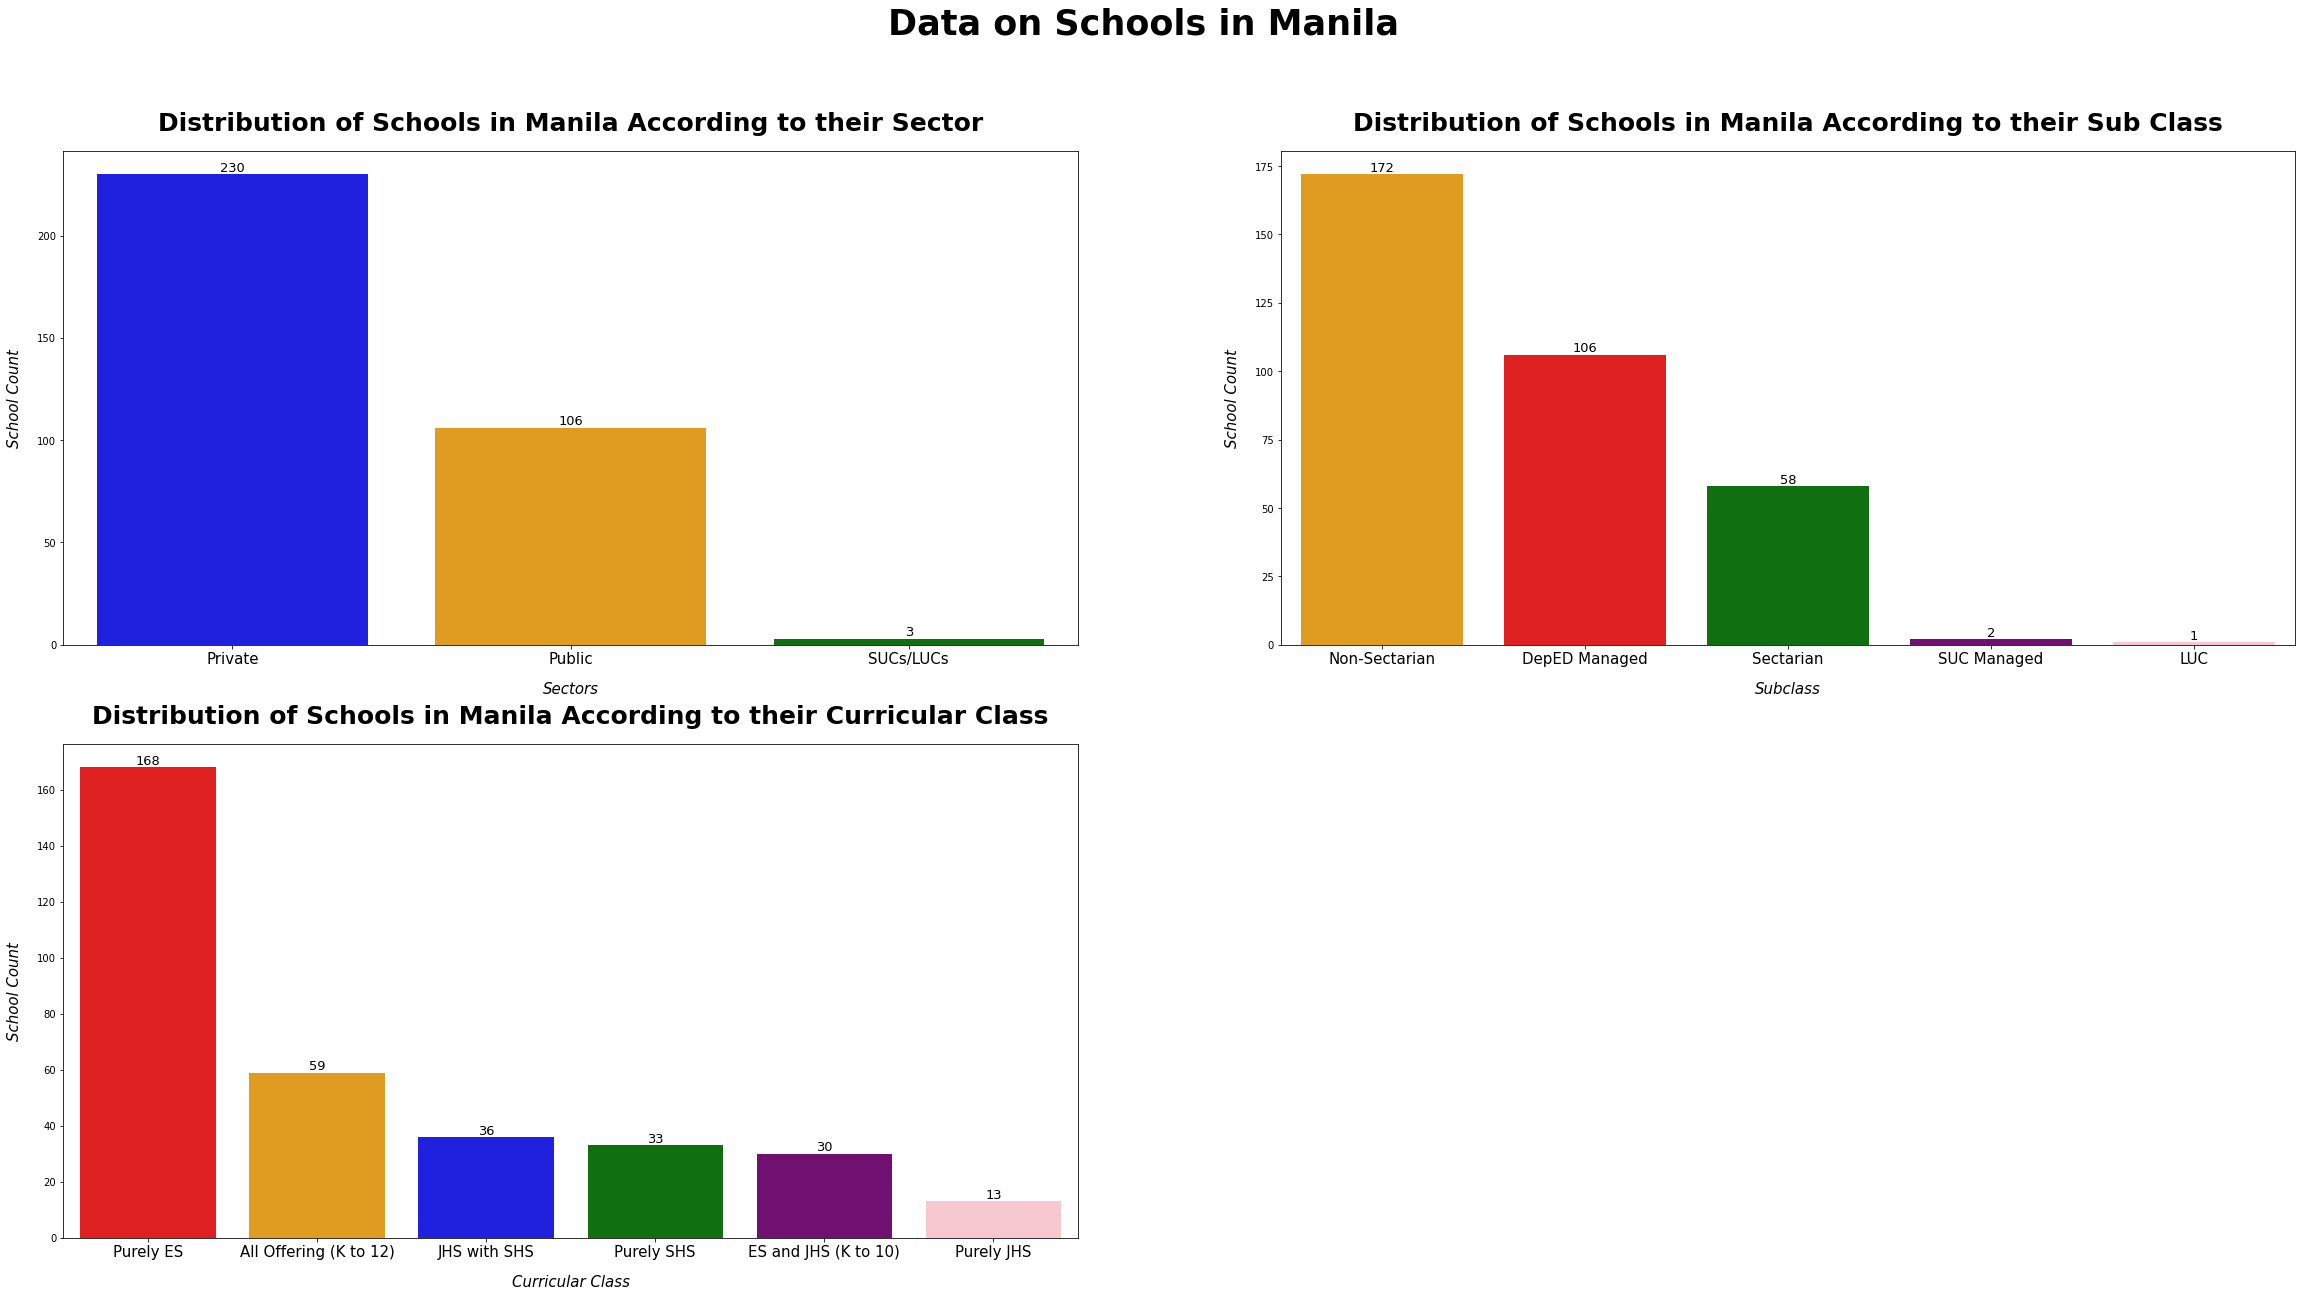

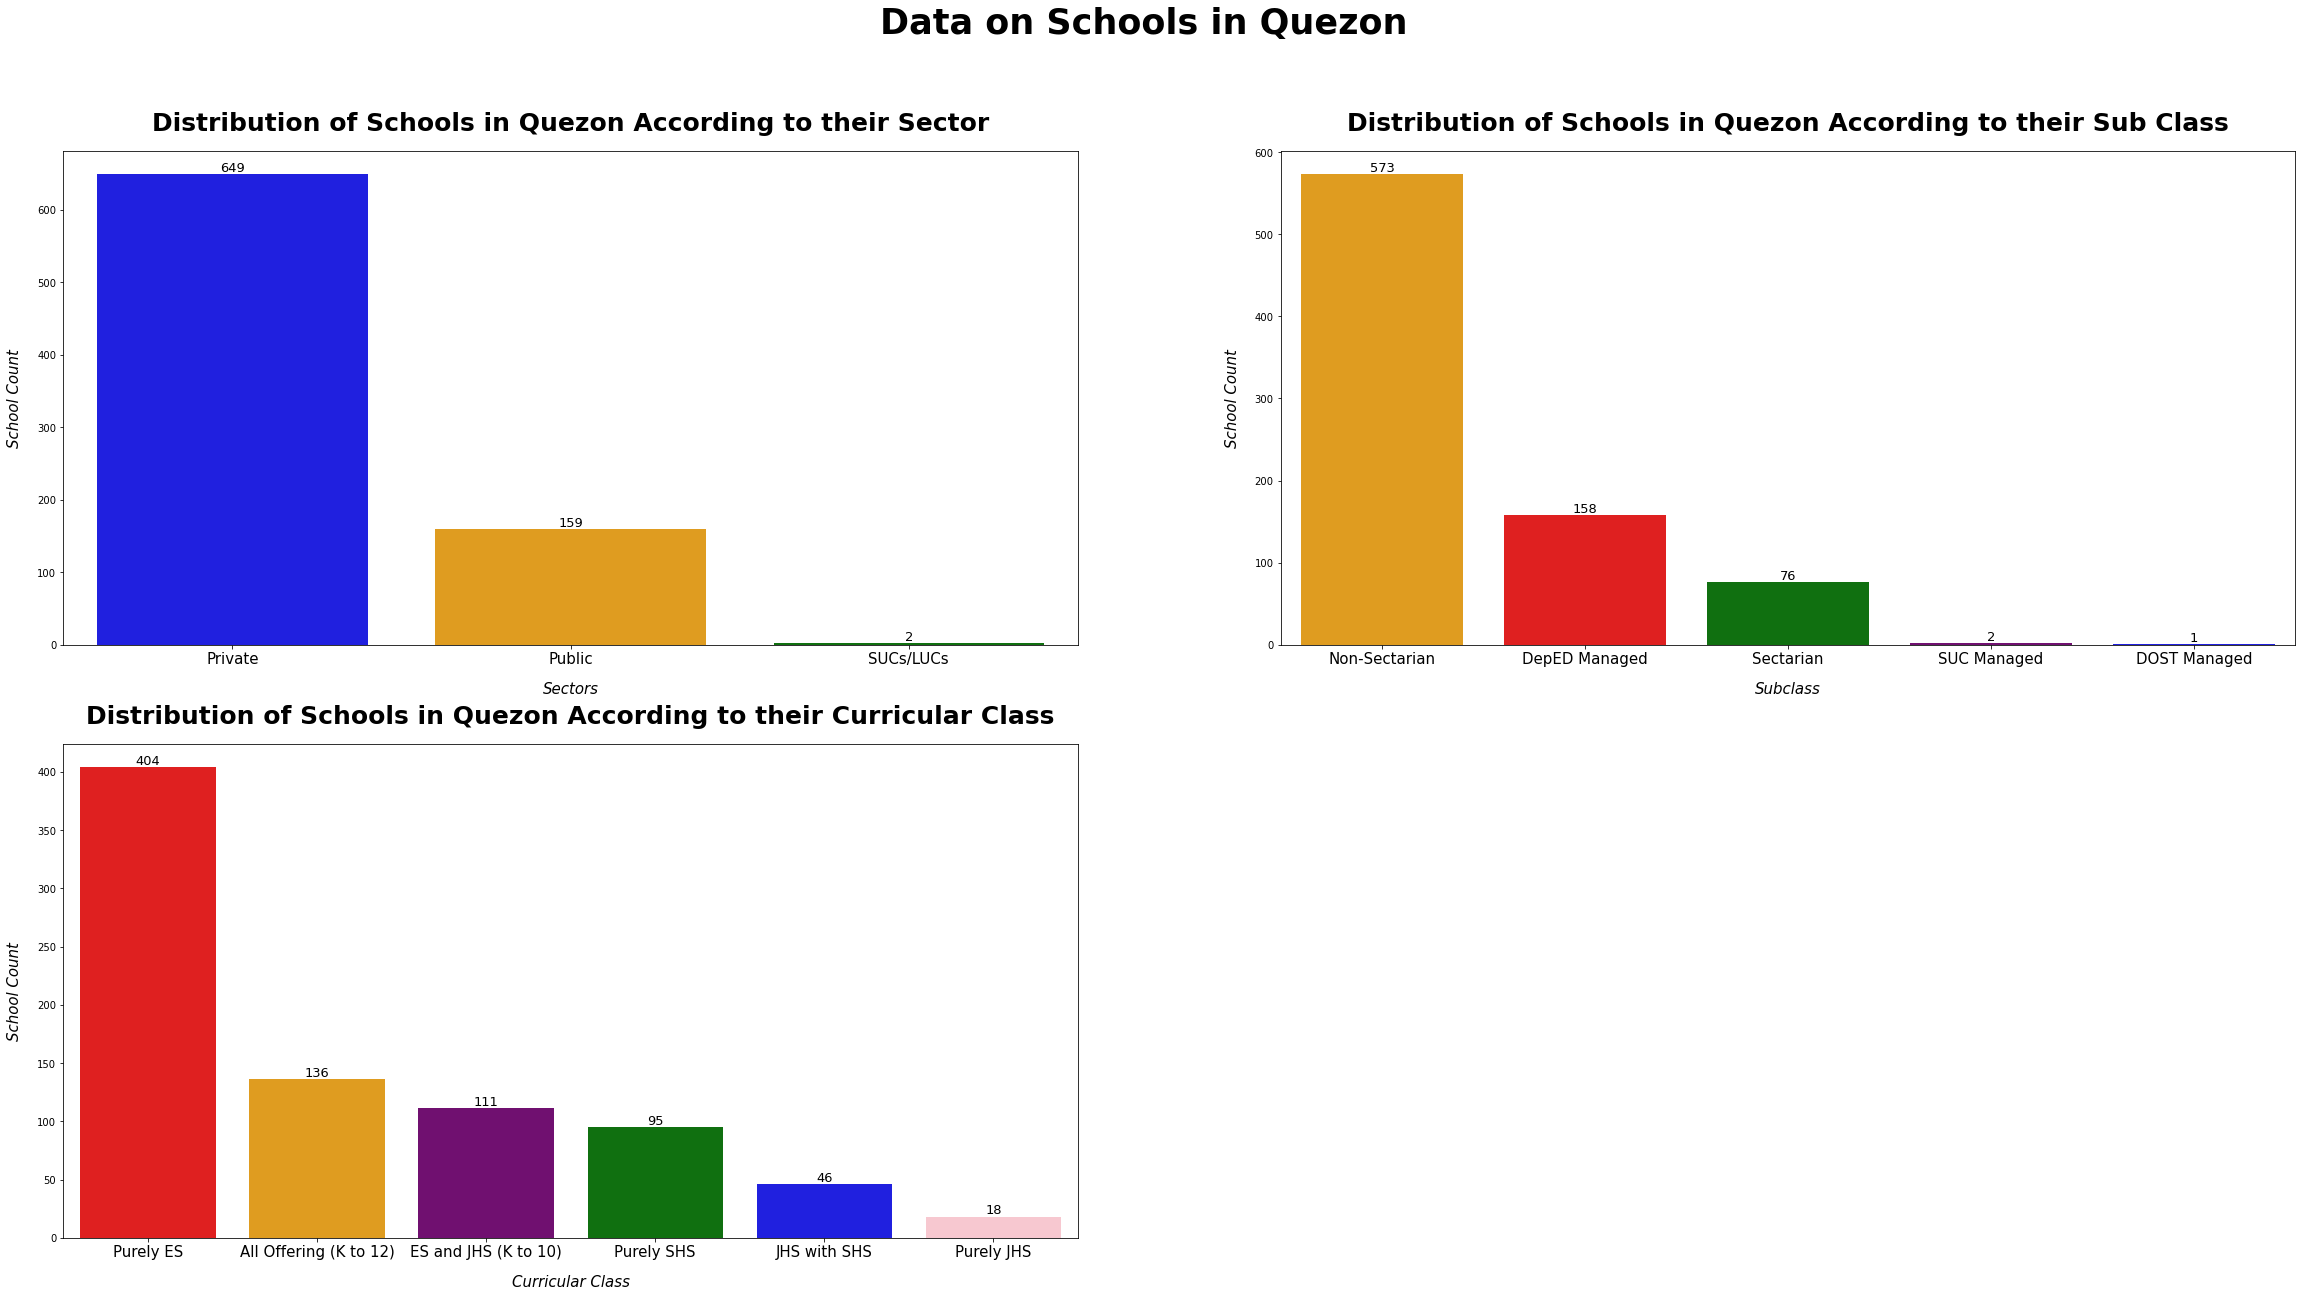

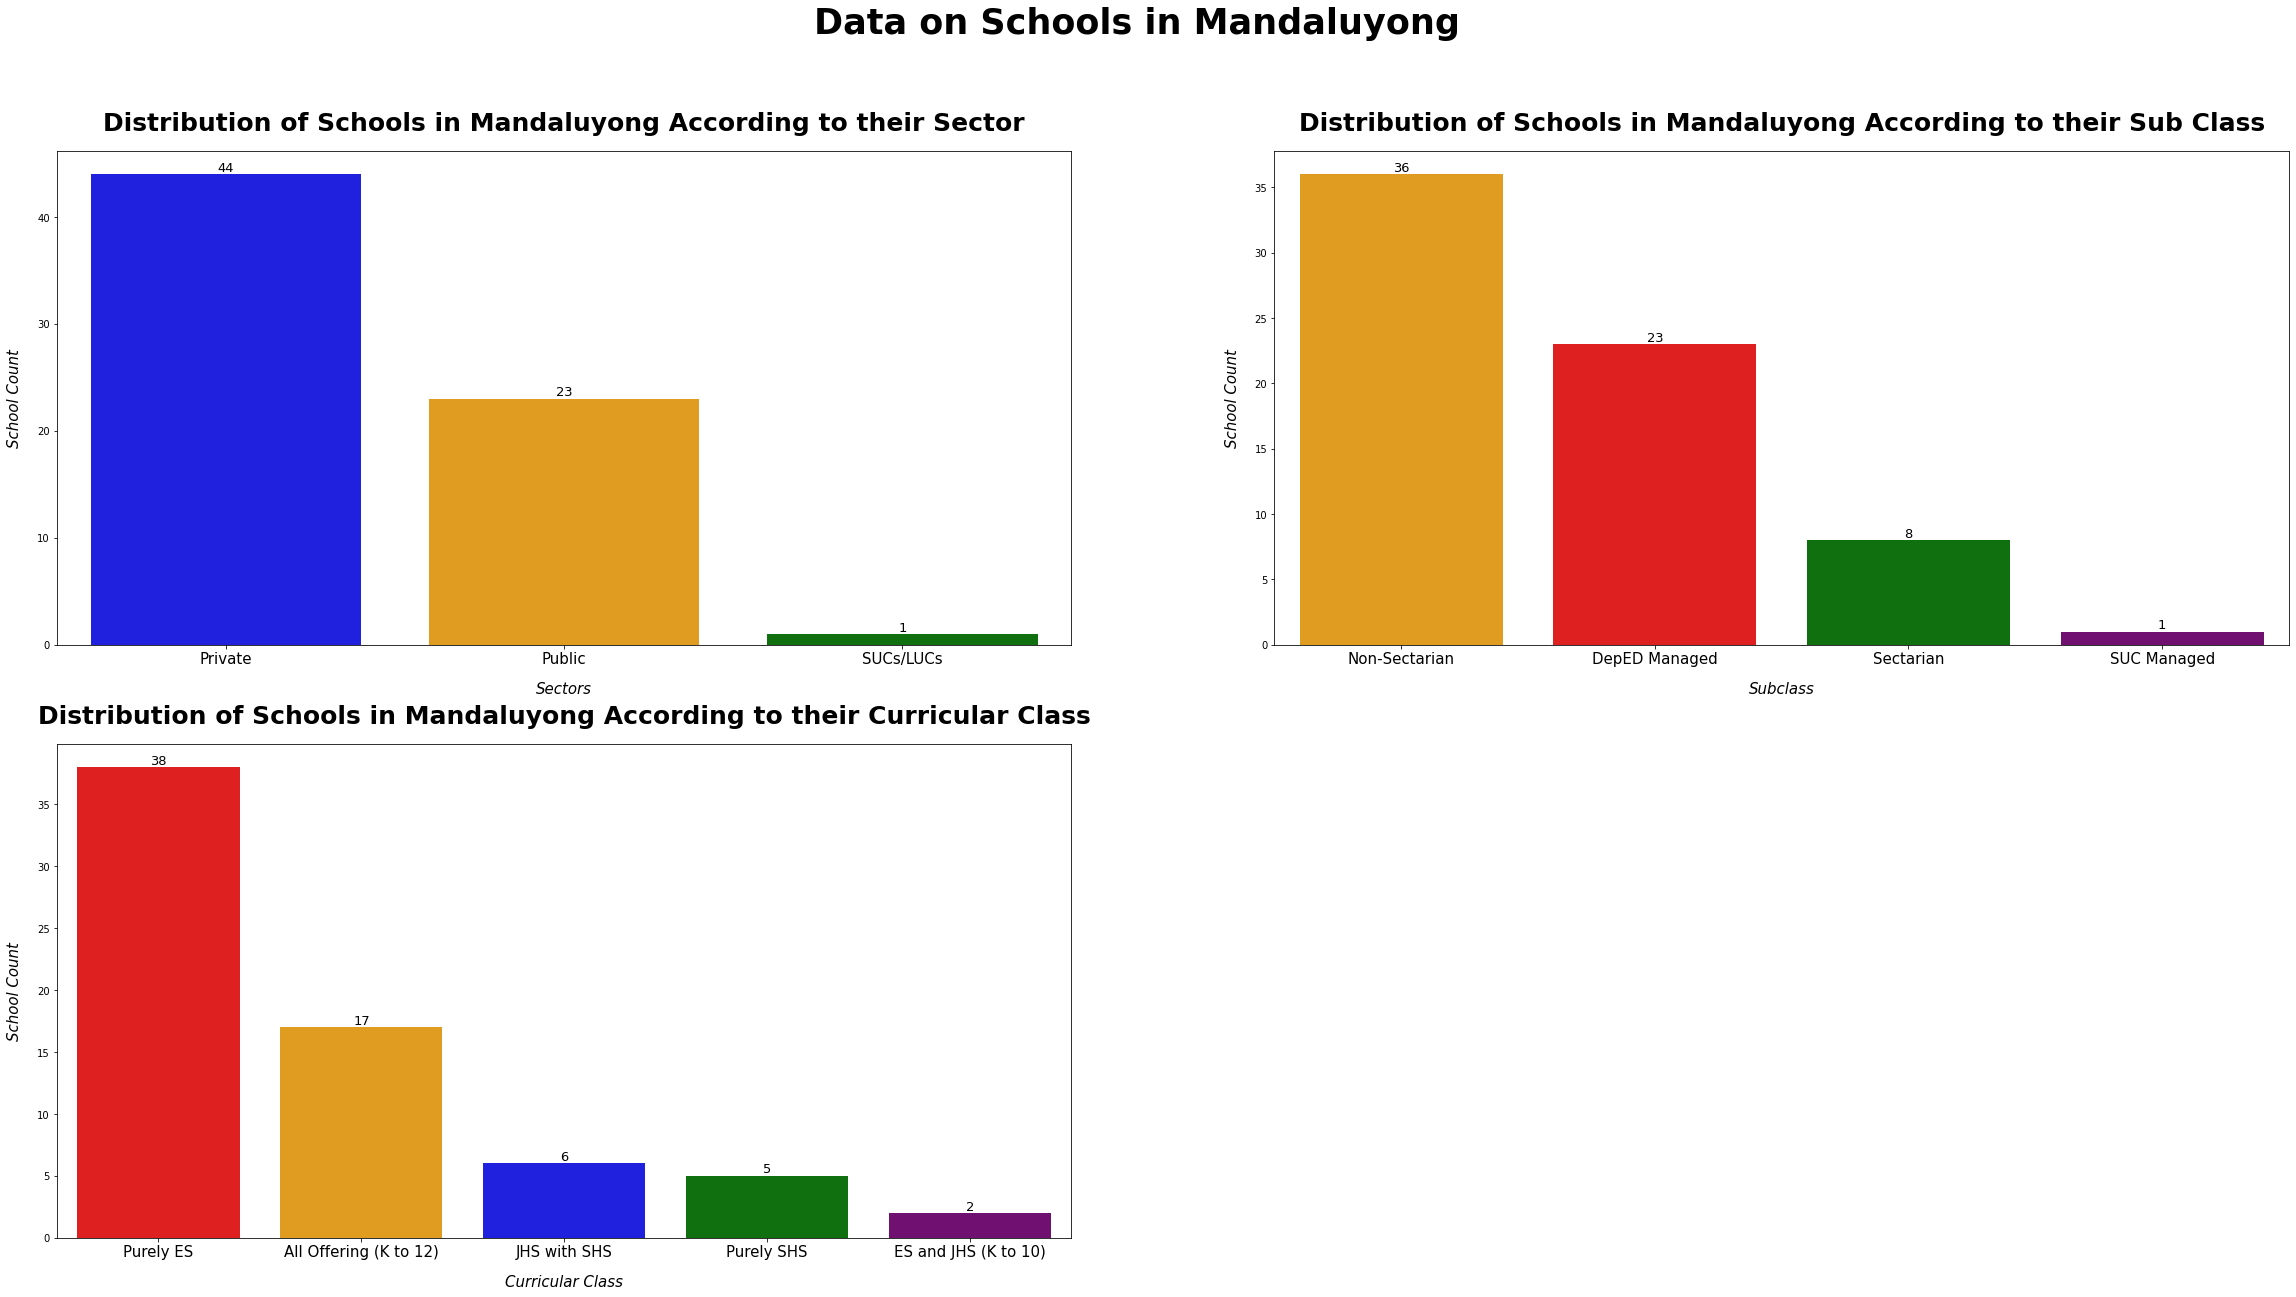

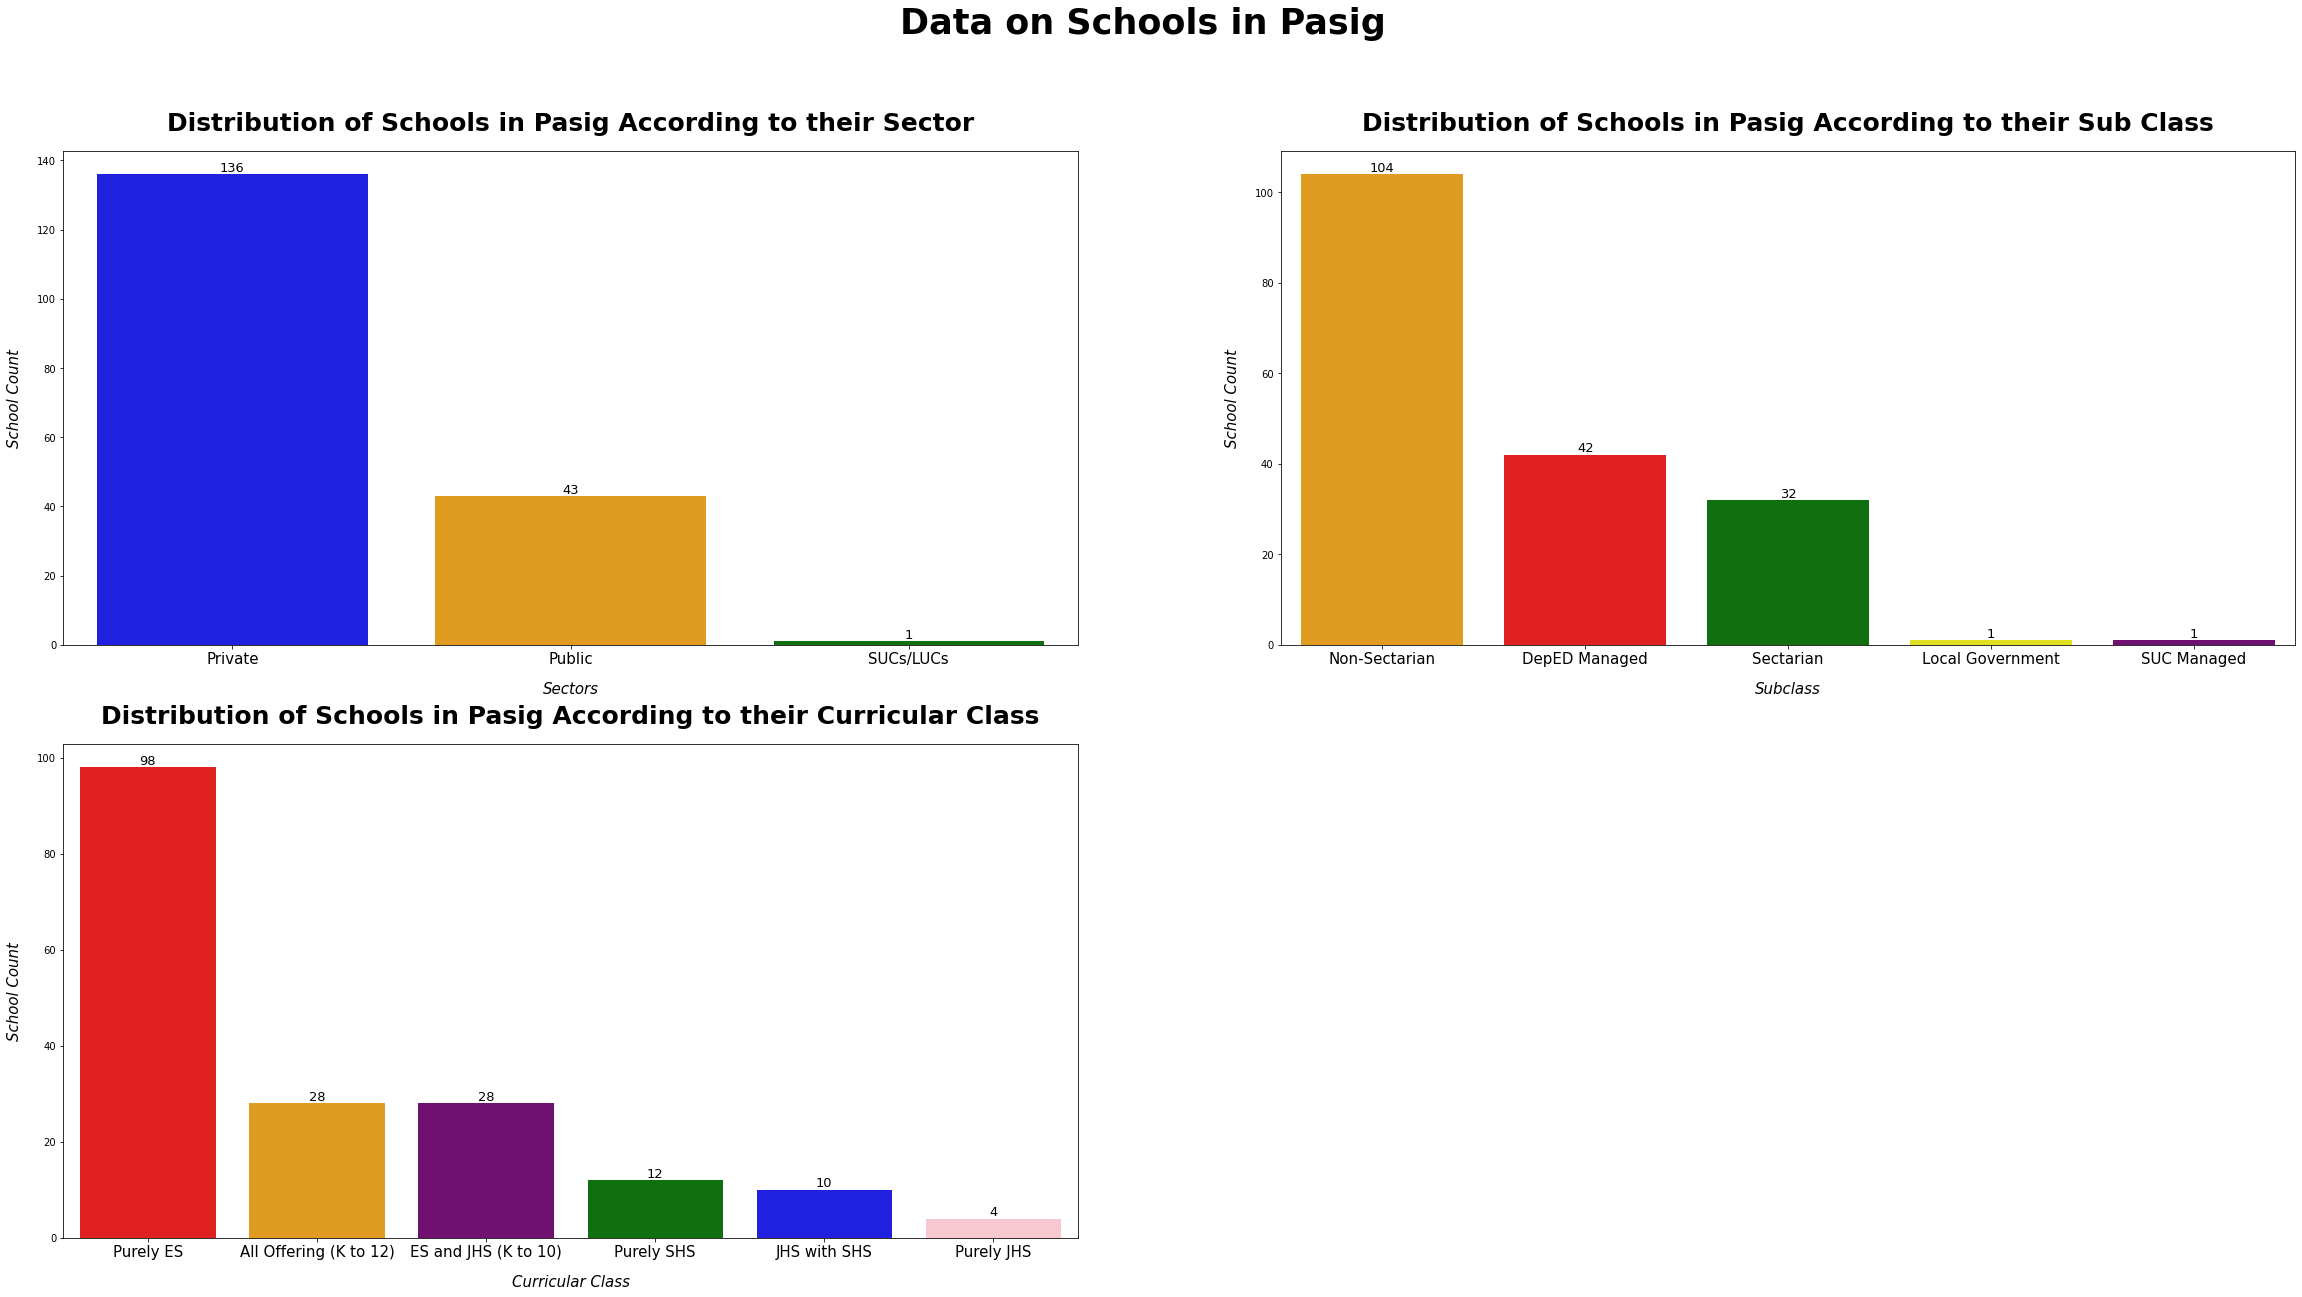

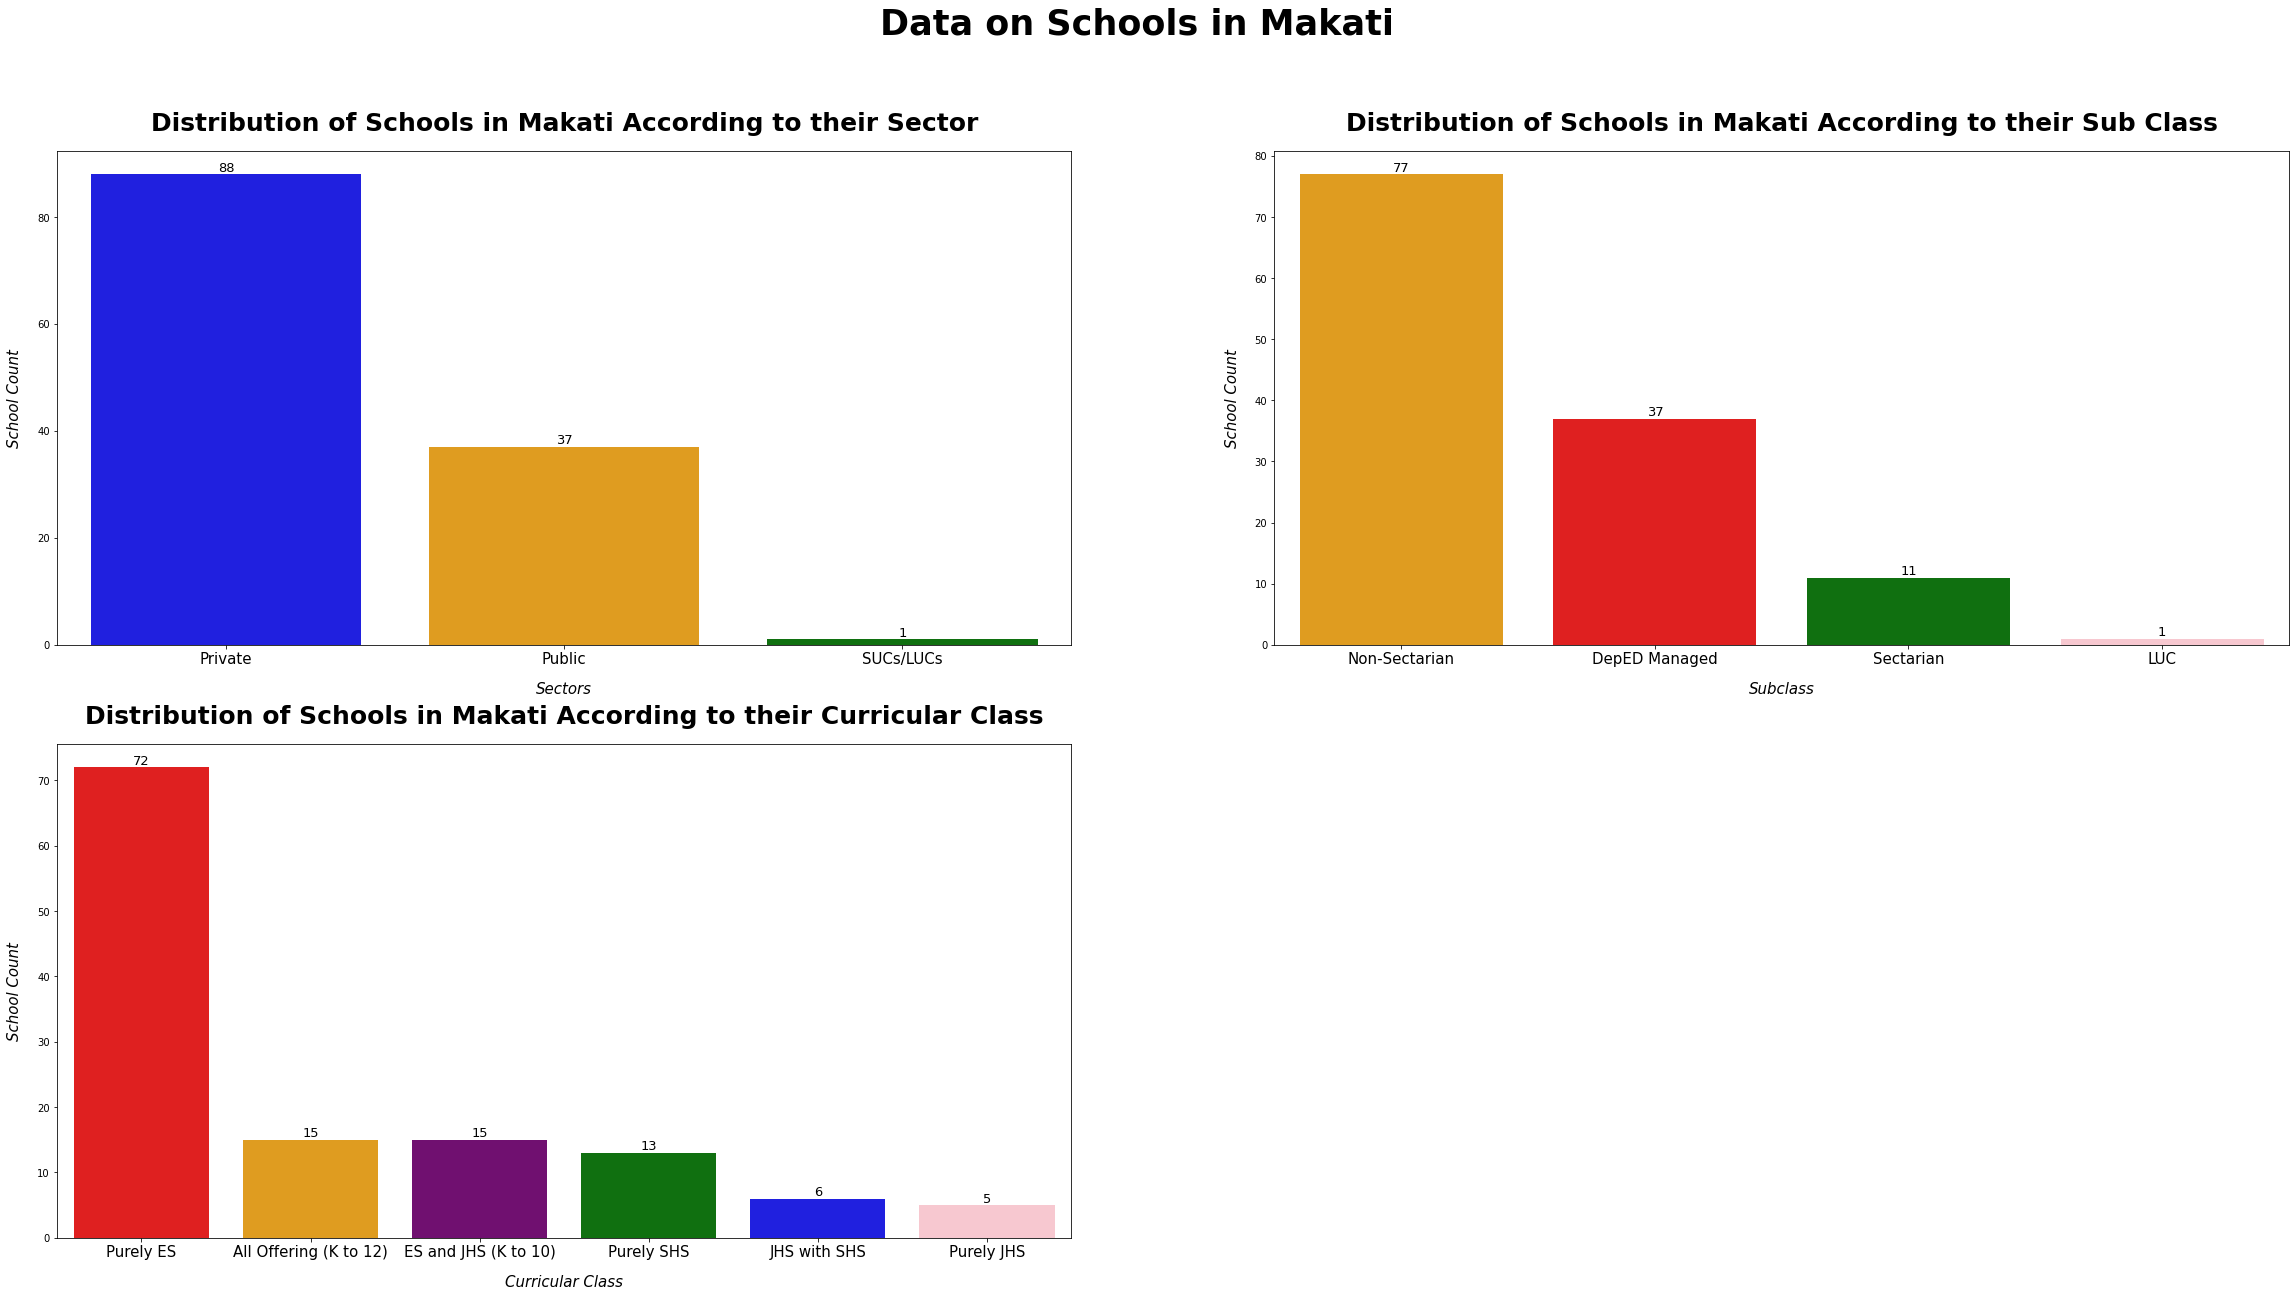

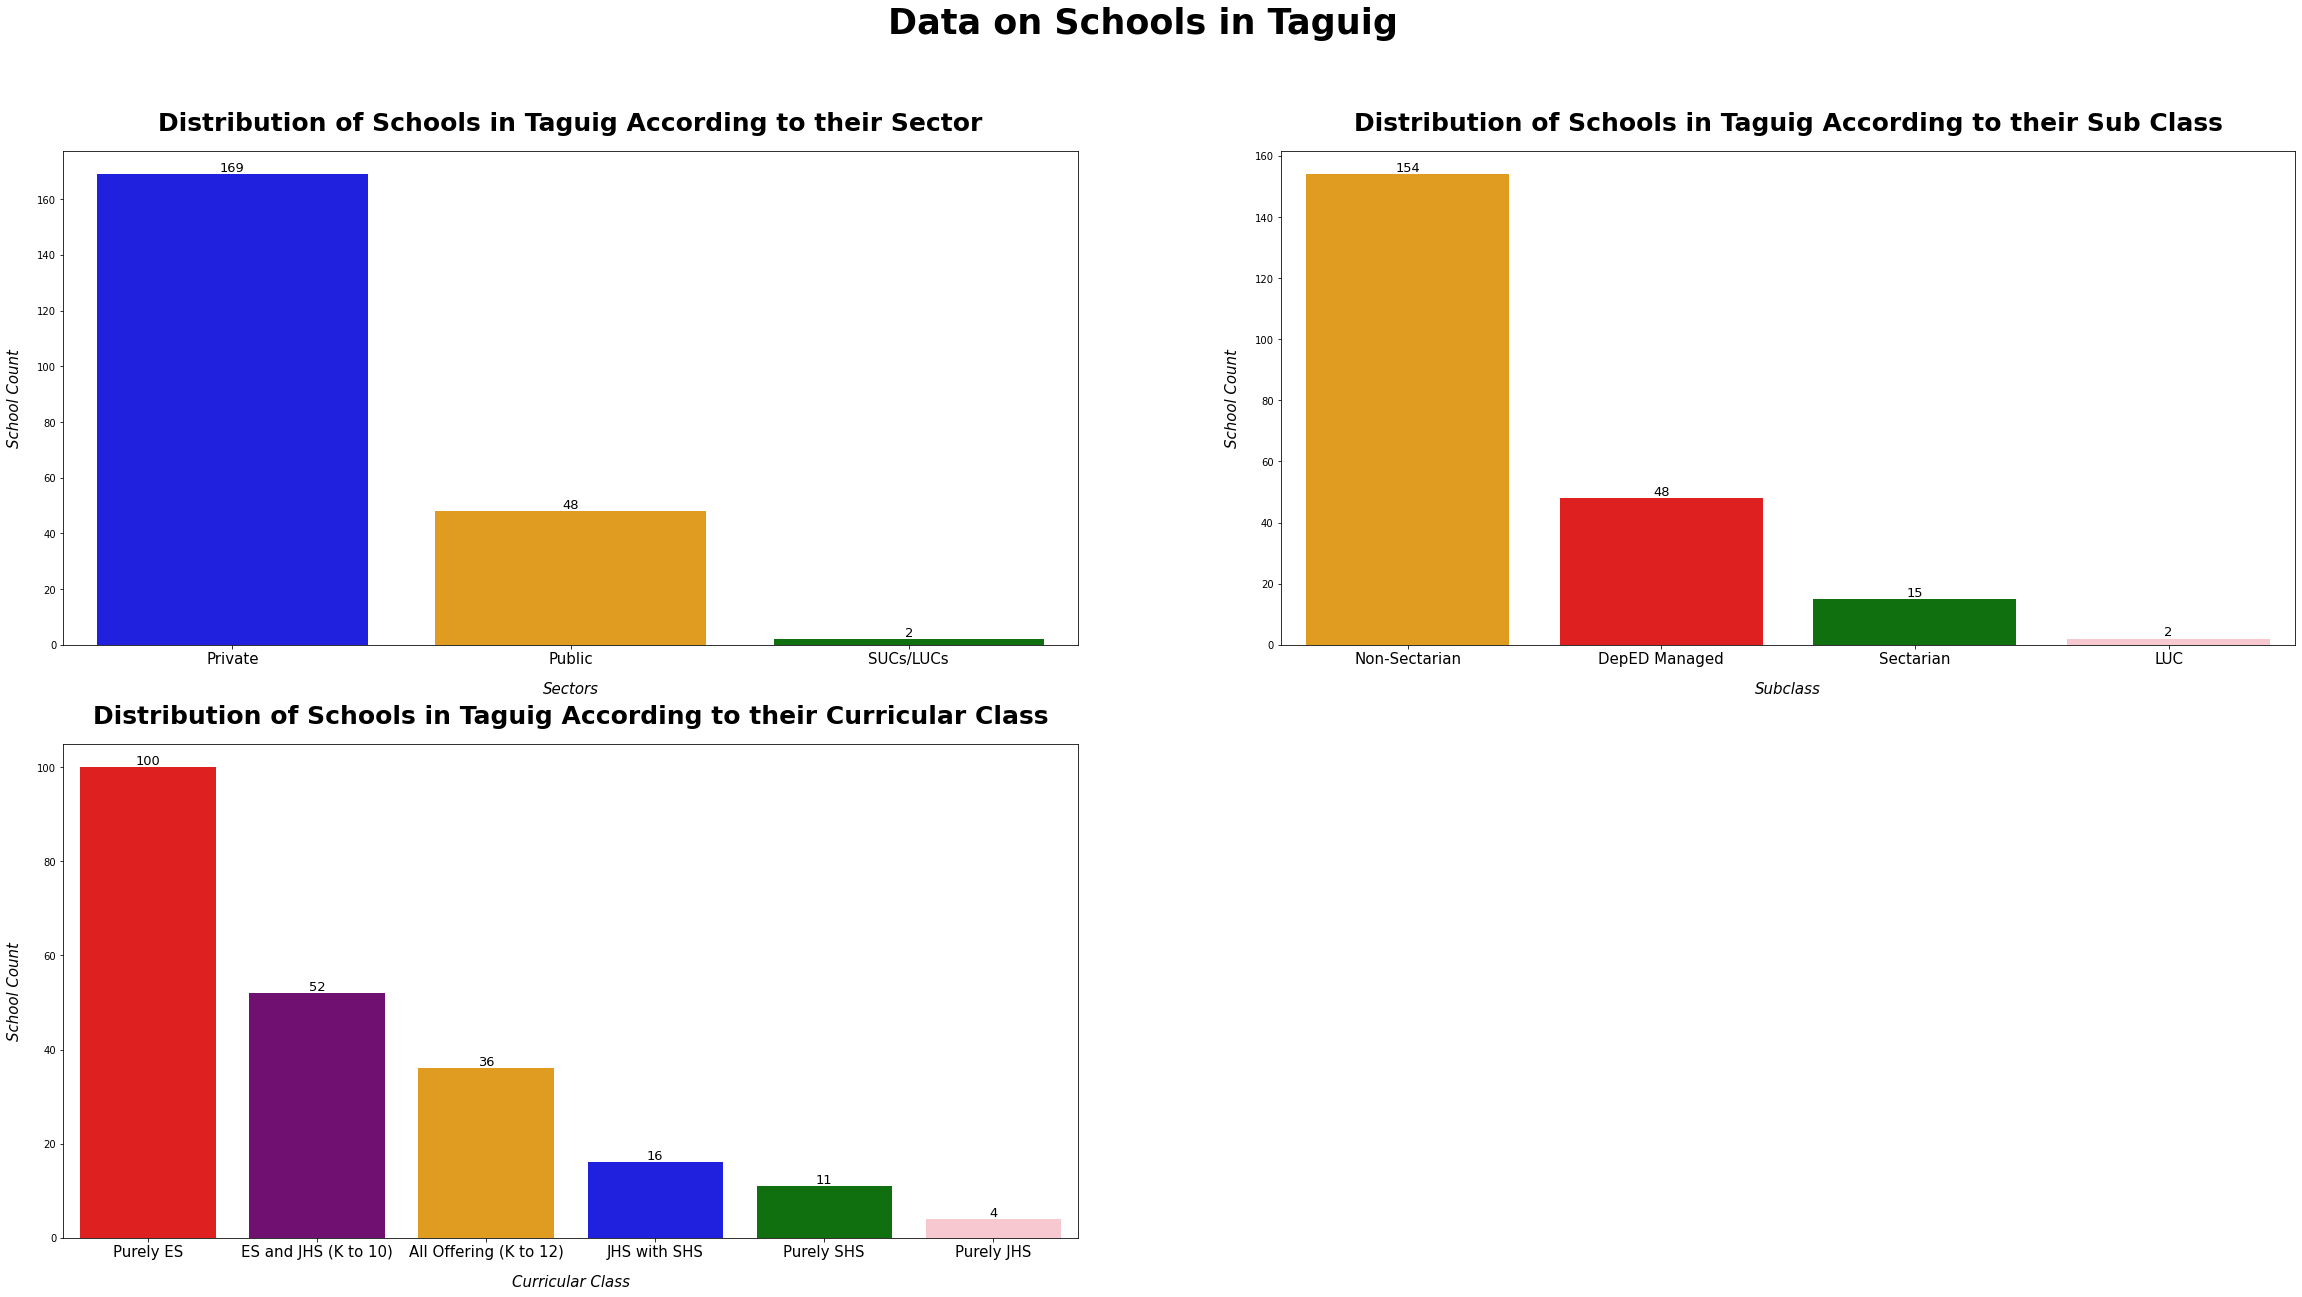

In [17]:
for city in cities_school:
    city_school_info(city)

<h1>NCR Properties for Sale Dataset</h1>

In [18]:
#  reading in csv to pandas dataframe
#  for NCR properties for sale data
ncr_prop4sale = pd.read_csv('data/for sale/ncr_4sale.csv')
ncr_prop4sale = ncr_prop4sale.drop(columns=['Unnamed: 0'])

ncr_prop4sale.head(5)

,listing,location,price,bedroom_num,bathroom_num,floor_area,land_size,longitude,latitude
0,1 Bedroom Condo Unit For Sale | Manila | Grand...,"Ermita, Manila","6,960,000",1.000,1.000,31.000,NaN,120.980,14.577
1,1 Bedroom Condo Unit For Sale Near DLSU|Manila...,"Malate, Manila","4,725,000",1.000,1.000,31.000,NaN,120.992,14.570
2,"Studio w/ Balcony For Sale | C. M. Recto Ave, ...","Quiapo, Manila","6,216,696",1.000,1.000,26.000,NaN,120.983,14.600
3,RFO Studio Condo Unit Beside DLSU Taft|Taft Av...,"Taft, Manila","3,500,000",1.000,1.000,18.000,NaN,120.995,14.563
4,"RFO Studio Condo Unit Fronting UST|Espana, Man...","Sampaloc, Manila","5,366,800",1.000,1.000,23.000,NaN,120.996,14.611


In [19]:
ncr_prop4sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28710 entries, 0 to 28709
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   listing       28710 non-null  object 
 1   location      28710 non-null  object 
 2   price         27607 non-null  object 
 3   bedroom_num   24817 non-null  float64
 4   bathroom_num  14628 non-null  float64
 5   floor_area    25090 non-null  float64
 6   land_size     12542 non-null  float64
 7   longitude     28710 non-null  float64
 8   latitude      28710 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


<p>This dataset already contains all relevant features.<p>
<p>Unfortunately, the price column is not parsed as numerical data type. We will have to fix that later.</p>
<p>We can see here as well that there are columns that have missing values too.</p>
<p>We shall investigate this further.</p>

<AxesSubplot:>

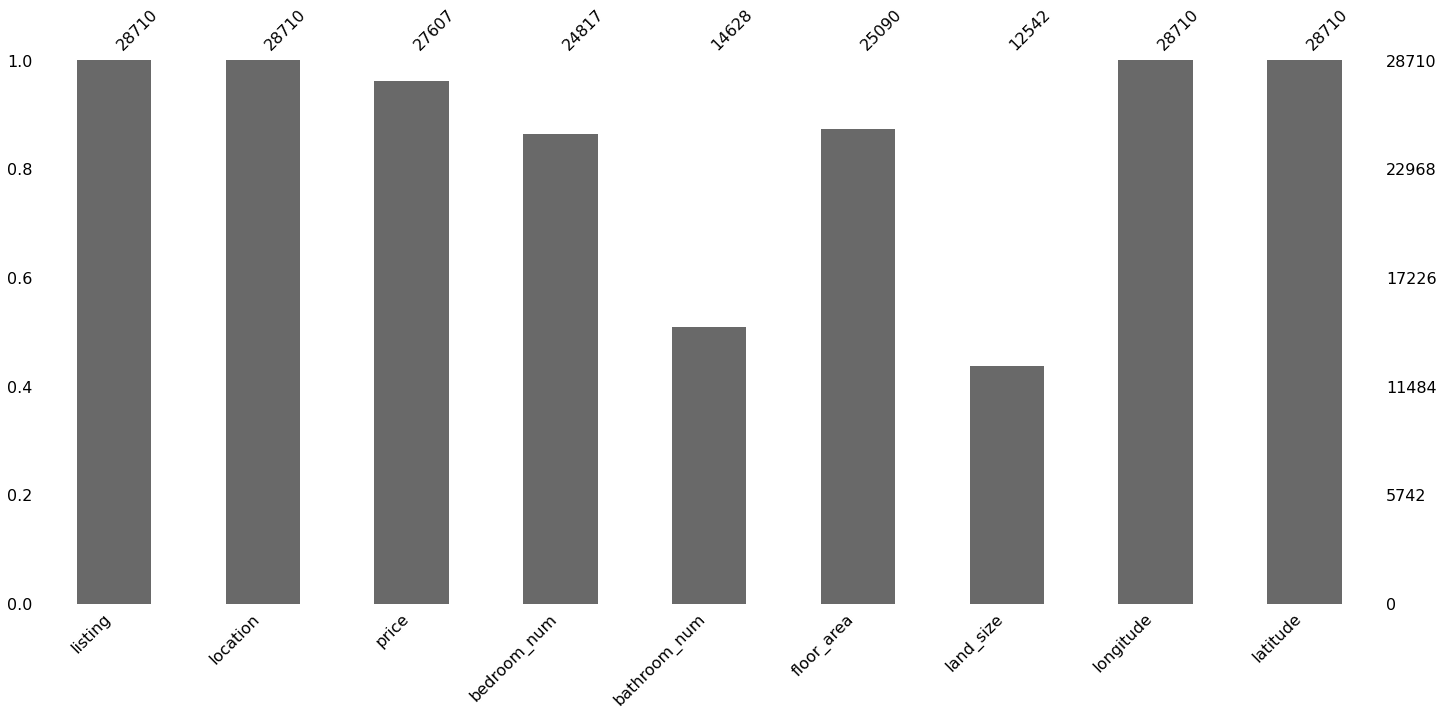

In [20]:
msno.bar(ncr_prop4sale)

<AxesSubplot:>

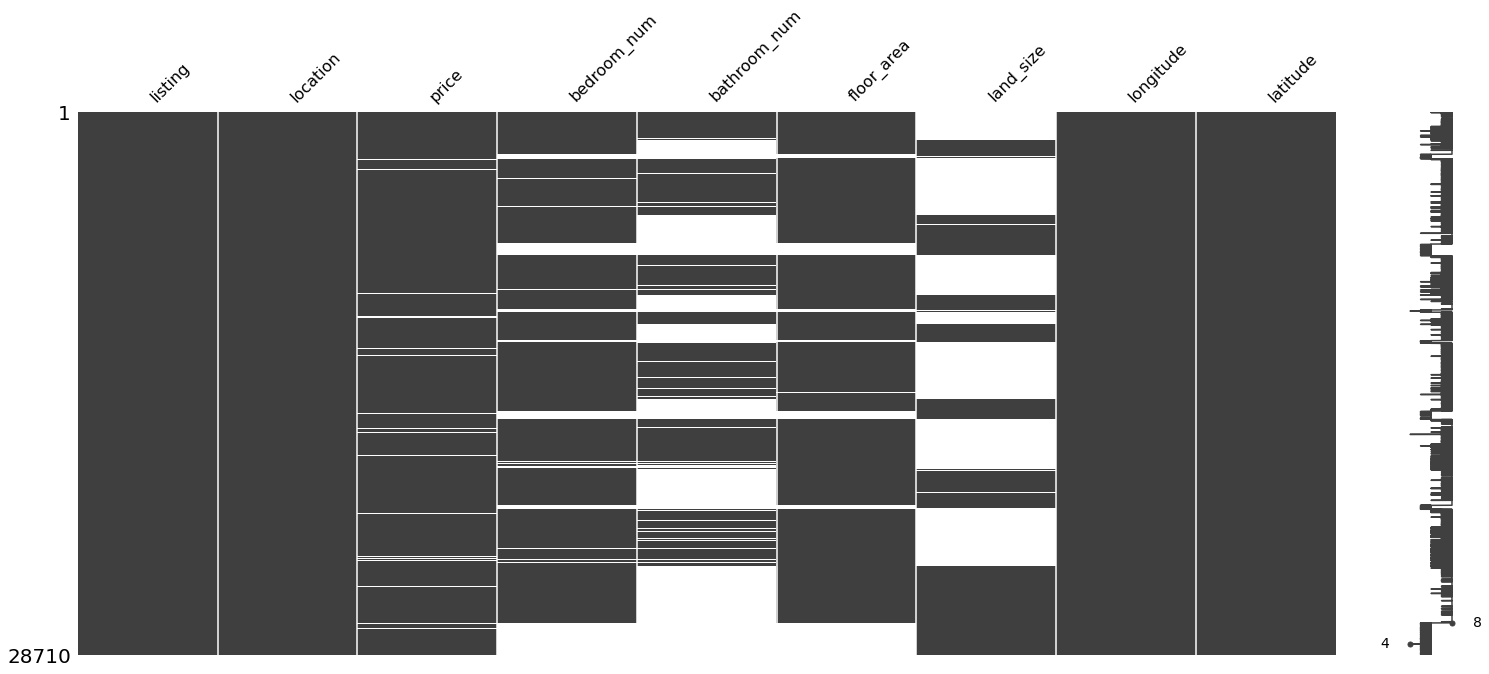

In [21]:
msno.matrix(ncr_prop4sale)

<p>It seems that the following columns have missing values:</p>
<ul>
<li>price</li>
<li>bedroom_num</li> 
<li>bathroom_num</li>
<li>floor_area</li>
<li>land_size</li>
</ul>
<p>We will drop entries with empty null values in all the columns with missing values.</p>
<p>We will also check if there are any duplicate entries in the dataset too.</p>


<h2>Data Cleaning</h2>

In [22]:
sales_duplicate_count = ncr_prop4sale.duplicated(subset=['listing', 'location'], keep='first').sum()
print(f'There are {sales_duplicate_count} duplicate listings \nThat is roughly {sales_duplicate_count/ncr_prop4sale.shape[0]*100}% of the listings')

There are 3049 duplicate listings 
That is roughly 10.619993033786137% of the listings


<p>8% of the entries are duplicates. Fortunately it is not a lot. We can easily drop these duplicates.</p>

In [23]:
#  dropping rows with duplicate values 
pithy_ncr_prop4sale = ncr_prop4sale.drop_duplicates(subset=['listing', 'location'], keep='first').reset_index(drop=True)
print(f'The dataset is now reduced to {pithy_ncr_prop4sale.shape[0]} listings')

The dataset is now reduced to 25661 listings


<p>We shall now drop the entries with null values in the price column.</p>

In [24]:
#  dropping rows with missing values 
pithy_ncr_prop4sale = pithy_ncr_prop4sale.dropna(axis=0, how='any', subset=['price','bedroom_num','bathroom_num','floor_area']).reset_index(drop=True)
print(f'The dataset is now reduced to {pithy_ncr_prop4sale.shape[0]} listings')

The dataset is now reduced to 13089 listings


In [25]:
#  dropping land_size column
pithy_ncr_prop4sale = pithy_ncr_prop4sale.drop(columns=['land_size']).reset_index(drop=True)
print(f'The dataset is now reduced to {pithy_ncr_prop4sale.shape[0]} listings')

The dataset is now reduced to 13089 listings


<AxesSubplot:>

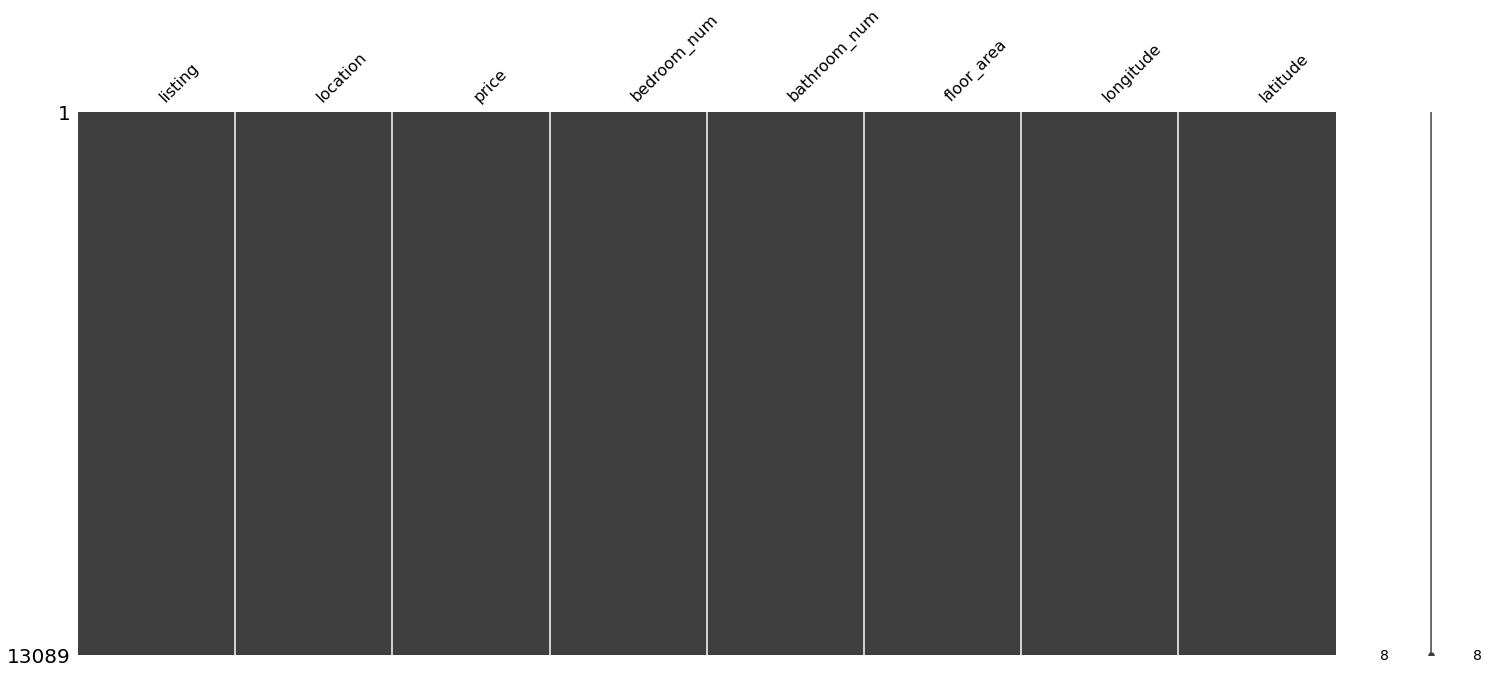

In [26]:
#  to verify that the price column has no missing values
msno.matrix(pithy_ncr_prop4sale)

<p>Data validation time.</p>

In [27]:
#  using get_unique() function to get unique values from each column
unique_props4sale = get_unique(pithy_ncr_prop4sale)

<p>What we are to do</p>
<ol>
<li>strip the whitespace and transform to lowercase those columns with string values</li>
<li>extract only the city from location column</li>
<ol>
<li>create a new column called city for that</li>
</ol>
<li>bin values in the price column</li>
<ol>
<li>remove the commas from each entry</li>
<li>change data type to float</li>
</ol>
<li>remove outliers from price column too?</li>
<li>rearrange columns</li>
</ol>

In [28]:
#  tranforming to lowercase
pithy_ncr_prop4sale['location'] = pithy_ncr_prop4sale['location'].apply(lambda x: x.lower())

#  stripping whitespace from entries
pithy_ncr_prop4sale['listing'] = pithy_ncr_prop4sale['listing'].apply(lambda x: x.strip())
pithy_ncr_prop4sale['location'] = pithy_ncr_prop4sale['location'].apply(lambda x: x.strip())

pithy_ncr_prop4sale.sample(15)

,listing,location,price,bedroom_num,bathroom_num,floor_area,longitude,latitude
11058,FOR SALE - 2 Bedroom unit at Vierra Residences...,"obrero, quezon city","5,800,000",2.000,2.000,59.000,121.032,14.628
12721,Fully Furnished 1 Bedroom condo for Sale in Ea...,"bagumbayan, quezon city","5,200,000",1.000,1.000,46.000,121.080,14.610
7305,1 Bedroom One Uptown Residence BGC For Sale! B...,"fort bonifacio, taguig","9,700,000",1.000,1.000,34.000,121.051,14.557
4048,"DMCI Homes Preselling For Sale in Boni, Mandal...","malamig, mandaluyong","7,372,000",2.000,1.000,53.000,121.036,14.582
6363,Brand New 3 Bedroom Unit For Sale in East Gall...,"fort bonifacio, taguig","70,000,000",3.000,3.000,193.000,121.050,14.541
4172,2 Bedroom Condo in Crossing St Francis Shangri...,"wack-wack greenhills, mandaluyong","28,000,000",2.000,2.000,119.000,121.056,14.580
11075,"For sale RFO 2 Bedroom Condo in New Manila, Qu...","new manila, quezon city","5,500,000",2.000,1.000,39.000,121.021,14.621
8339,Studio Condo Unit For Sale in Viceroy 1 Mckinl...,"fort bonifacio, taguig","4,500,000",1.000,1.000,23.000,121.049,14.533
868,Condo with Parking 37sqm Torre de Manila near ...,"ermita, manila","5,900,000",1.000,1.000,37.000,120.985,14.585
7239,For Sale: Shangri-La Horizon Homes 3 BR Pentho...,"fort bonifacio, taguig","235,000,000",3.000,3.000,383.000,121.046,14.552


In [29]:
def classify_location(location) -> str:
    if 'quezon' in location:
        return 'quezon'
    elif 'taguig' in location:
        return 'taguig'
    elif 'manila' in location:
        return 'manila'
    elif 'makati' in location:
        return 'makati'
    elif 'pasig' in location:
        return 'pasig'
    elif 'san juan' in location: 
        return 'san juan'
    else:
        return 'mandaluyong'
    
#  extracting the only the city from the location column
pithy_ncr_prop4sale['city'] = pithy_ncr_prop4sale['location'].apply(classify_location)

pithy_ncr_prop4sale.sample(15)

,listing,location,price,bedroom_num,bathroom_num,floor_area,longitude,latitude,city
12729,2 Bedrooms (RFO) in Suntrust Asmara E.Rodrigue...,"new manila, quezon city","5,245,900",2.000,1.000,49.000,121.021,14.621,quezon
10734,MSG-08-1088: Foreclosed Residential - Condomin...,"manggahan, pasig","2,182,700",1.000,1.000,33.000,121.093,14.609,pasig
1113,For Sale 1 Bedroom at 2 Torre Lorenzo,"taft, manila","6,329,800",1.000,1.000,31.000,120.993,14.567,manila
1387,2 Bedroom Unit in Tuscany Mckinley Hill Bonifa...,"ayala avenue, makati","18,000,000",2.000,3.000,89.000,121.027,14.554,makati
4935,RUSH SALE 3BR Fully Furnished in Pioneer Highl...,"barangka ilaya, mandaluyong","12,500,000",3.000,2.000,134.000,121.047,14.572,mandaluyong
4745,"For Sale Dettifos Tower, Acqua Private Residen...","hulo, mandaluyong","17,000,000",2.000,2.000,112.000,121.031,14.572,mandaluyong
6630,1 Bedroom Loft Unit For Sale in McKinley Park ...,"fort bonifacio, taguig","8,500,000",1.000,1.000,40.000,121.047,14.554,taguig
11930,"1BR Condo for Sale in One Central Park, Eastwo...","eastwood city, quezon city","7,000,000",1.000,1.000,67.000,121.079,14.611,quezon
10470,Condo in Arezzo Pasig Rush sale,"pinagbuhatan, pasig","2,300,000",1.000,1.000,32.000,121.100,14.549,pasig
2411,SAN LORENZO PLACE 44sqm 2 Bedroom Rent to Own ...,"san lorenzo, makati","7,700,994",2.000,2.000,44.000,121.019,14.551,makati


In [30]:
#  stripping the price column of the commas and converting it to float thereafter
pithy_ncr_prop4sale['price'] = pithy_ncr_prop4sale['price'].apply(lambda x: x.replace(',', ''))
pithy_ncr_prop4sale['price'] = pithy_ncr_prop4sale['price'].astype(float)

pithy_ncr_prop4sale.sample(15)

,listing,location,price,bedroom_num,bathroom_num,floor_area,longitude,latitude,city
10267,2 Bedroom 118.22sqm Condominium For Sale at Sk...,"oranbo, pasig","9,075,400.000",2.000,3.000,118.000,121.065,14.574,pasig
2638,"1 Bedroom (w/o Balcony) at The Lerato Bel-Air,...","bel-air, makati","14,000,000.000",1.000,1.000,48.000,121.026,14.564,makati
10232,Pay only 62k DP and Move In Pagibig And Bank F...,"rosario, pasig","4,167,000.000",3.000,1.000,42.000,121.102,14.593,pasig
421,Affordable 2 Bedroom Condo for sale in Urban D...,"tondo, manila","2,600,000.000",2.000,1.000,34.000,120.964,14.625,manila
10765,Ready for Occupancy 2 Bedroom For Sale at Acac...,"manggahan, pasig","6,696,980.000",2.000,2.000,54.000,121.094,14.602,pasig
6032,For Sale Fully Furnished 2 Bedroom Unit w/ Tan...,"greenhills, san juan","18,500,000.000",2.000,2.000,78.000,121.047,14.601,san juan
12609,Luxury 3BR Corner Unit for Sale in Aspire Towe...,"bagumbayan, quezon city","29,900,000.000",3.000,2.000,219.000,121.082,14.605,quezon
10818,Condominium Mayfield Park Residences 2BR Unit ...,"rosario, pasig","4,911,000.000",2.000,1.000,49.000,121.108,14.593,pasig
7257,"For Sale 2 Bedroom Unit in Avant at The Fort, ...","fort bonifacio, taguig","26,000,000.000",2.000,2.000,84.000,121.045,14.549,taguig
12489,For sale 1 Bedroom condo with Garden - 5% spot...,"santo cristo, quezon city","6,120,000.000",1.000,1.000,51.000,121.028,14.660,quezon


count        13,089.000
mean     15,718,019.286
std      22,791,851.669
min         850,000.000
25%       4,818,178.000
50%       8,000,000.000
75%      17,000,000.000
max     340,000,000.000
Name: price, dtype: float64

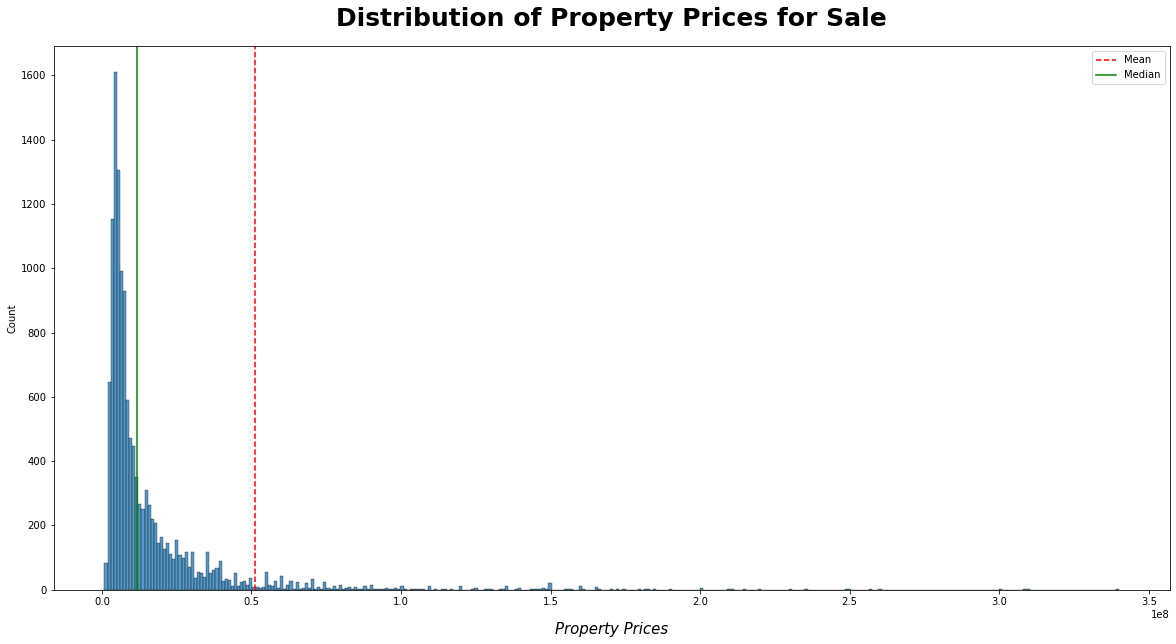

In [31]:
#  visualizing the price distribution to locate outliers
sale_price = pithy_ncr_prop4sale.price
sale_price_statistic = sale_price.describe()
sale_price_mean = sale_price_statistic.mean()
sale_price_median = sale_price_statistic.median()

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.histplot(x=sale_price)

ax.set_xlabel('Property Prices', size=15, labelpad=15, style='italic')
ax.set_title('Distribution of Property Prices for Sale', size=25, weight='bold', pad=20)
ax.axvline(x=sale_price_mean, color='r', linestyle='--', label='Mean')
ax.axvline(x=sale_price_median, color='g', linestyle='-', label='Median')
ax.legend()

display(sale_price_statistic)

In [32]:
def remove_outlier(df):
    q1 = df.quantile(.25)
    q3 = df.quantile(.75)
    iqr = q3 - q1
    
    no_outlier = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]
    no_outlier = no_outlier.dropna()
    no_outlier = no_outlier.reset_index(drop=True)

    return no_outlier

In [33]:
#  removing outliers
clean_ncr_prop4sale = remove_outlier(pithy_ncr_prop4sale)
clean_ncr_prop4sale

C:\Users\Admin\AppData\Local\Temp\ipykernel_28656\234227123.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outlier = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]


,listing,location,price,bedroom_num,bathroom_num,floor_area,longitude,latitude,city
0,1 Bedroom Condo Unit For Sale Near DLSU|Manila...,"malate, manila","4,725,000.000",1.000,1.000,31.000,120.992,14.570,manila
1,"Studio w/ Balcony For Sale | C. M. Recto Ave, ...","quiapo, manila","6,216,696.000",1.000,1.000,26.000,120.983,14.600,manila
2,RFO Studio Condo Unit Beside DLSU Taft|Taft Av...,"taft, manila","3,500,000.000",1.000,1.000,18.000,120.995,14.563,manila
3,"RFO Studio Condo Unit Fronting UST|Espana, Man...","sampaloc, manila","5,366,800.000",1.000,1.000,23.000,120.996,14.611,manila
4,2 Bedroom Condo Unit For Sale Near DLSU|Manila...,"malate, manila","5,252,679.000",2.000,2.000,35.000,120.994,14.562,manila
...,...,...,...,...,...,...,...,...,...
11018,Grass Residences 1 Bedroom Amenity View,"santo cristo, quezon city","5,000,000.000",1.000,1.000,37.000,121.028,14.660,quezon
11019,One Castilla Place | Modern Minimalist 3BR Con...,"valencia, quezon city","12,500,000.000",3.000,3.000,81.000,121.035,14.611,quezon
11020,For sale Condotel Investment at Seville Reside...,"bagumbayan, quezon city","9,772,500.000",1.000,1.000,51.000,121.089,14.603,quezon
11021,"For Sale: 1BR Unit in Vinia Residences, Quezon...","phil-am, quezon city","4,650,000.000",1.000,1.000,34.000,121.033,14.651,quezon


count       11,023.000
mean    10,029,875.422
std      7,383,207.827
min      1,000,000.000
25%      4,722,500.000
50%      7,300,000.000
75%     13,000,000.000
max     35,100,000.000
Name: price, dtype: float64

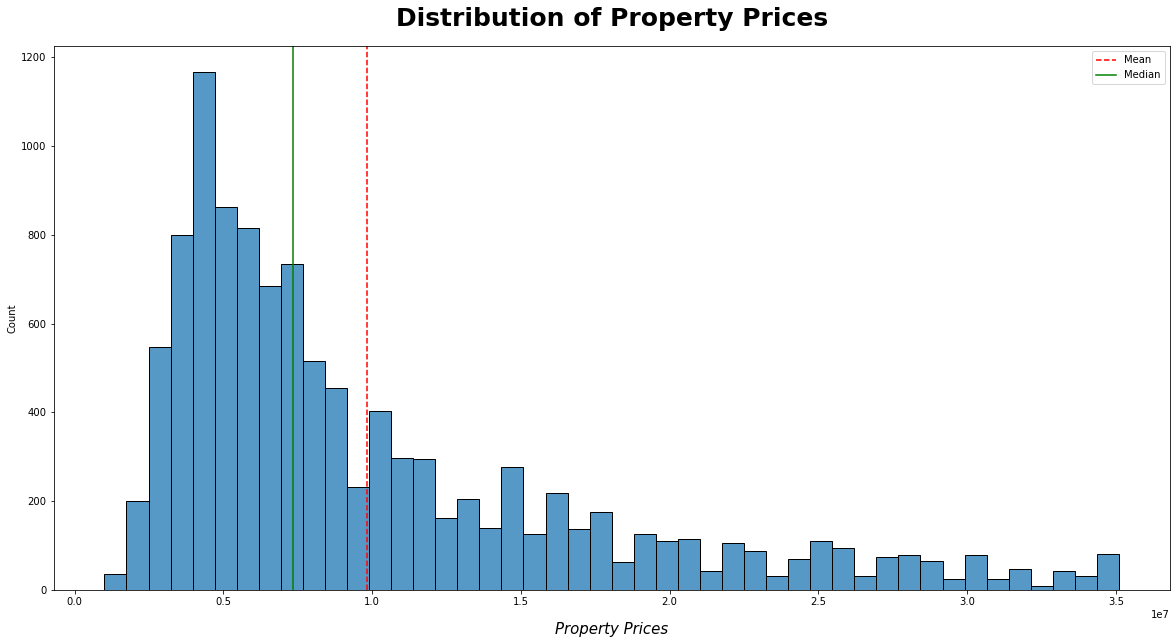

In [34]:
#  visualizing the clenaner price distribution 
norm_price = clean_ncr_prop4sale.price
norm_price_statistic = norm_price.describe()
norm_price_mean = norm_price_statistic.mean()
norm_price_median = norm_price_statistic.median()

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.histplot(x=norm_price)

ax.set_xlabel('Property Prices', size=15, labelpad=15, style='italic')
ax.set_title('Distribution of Property Prices', size=25, weight='bold', pad=20)
ax.axvline(x=norm_price_mean, color='r', linestyle='--', label='Mean')
ax.axvline(x=norm_price_median, color='g', linestyle='-', label='Median')
ax.legend()

display(norm_price_statistic)

<h2>Exploratory Data Analysis</h2>

In [35]:
def eda_gen_visualization_properties(df):
    
    city_dist = df.groupby('city').listing.count().reset_index().sort_values(by='listing', ascending=False)
    bedroom_count = df.groupby('bedroom_num').listing.count().reset_index().sort_values(by='listing', ascending=False)
    bathroom_count = df.groupby('bathroom_num').listing.count().reset_index().sort_values(by='listing', ascending=False)
    #  creating figure 
    fig = plt.figure(figsize=(40,20))

    #  bar chart to show the distribution of properties in the seven cities 
    ax_city = fig.add_subplot(221)
    ax_city = sns.barplot(x = city_dist.city, y = city_dist.listing, palette=city_palettes)

    ax_city.bar_label(ax_city.containers[0], size=13);
    ax_city.set_ylabel('Property Count', size=15, labelpad=15, style='italic')
    ax_city.set_xlabel('Cities', size=15, labelpad=15, style='italic')
    ax_city.set_title('Distribution of Properties in a Given Set of Cities', size=25, weight='bold', pad=20);

    plt.xticks(size=15);

    # bar chart to show distribution of bedroom numbers in properties
    ax_bedroom_count = fig.add_subplot(222)
    ax_bedroom_count = sns.barplot(x = bedroom_count.bedroom_num, y = bedroom_count.listing)

    ax_bedroom_count.bar_label(ax_bedroom_count.containers[0], size=13);
    ax_bedroom_count.set_ylabel('Count', size=15, labelpad=15, style='italic')
    ax_bedroom_count.set_xlabel('Bedroom Numbers', size=15, labelpad=15, style='italic')
    ax_bedroom_count.set_title('Distribution of Bedroom Numbers', size=25, weight='bold', pad=20);

    plt.xticks(size=15);

    # bar chart to show distribution of bathroom numbers
    ax_bathroom_count = fig.add_subplot(223)
    ax_bathroom_count = sns.barplot(x = bathroom_count.bathroom_num, y = bathroom_count.listing)

    ax_bathroom_count.bar_label(ax_bathroom_count.containers[0], size=13);
    ax_bathroom_count.set_ylabel('Count', size=15, labelpad=15, style='italic')
    ax_bathroom_count.set_xlabel('Bathroom Numbers', size=15, labelpad=15, style='italic')
    ax_bathroom_count.set_title('Distribution of Bathroom Numbers', size=25, weight='bold', pad=20);

    plt.xticks(size=15);

    # bar chart to show distribution of price
    price = df.price
    price_statistic = price.describe()
    price_mean = price_statistic.mean()
    price_median = price_statistic.median()
    
    ax_price = fig.add_subplot(224)
    ax_price = sns.histplot(x=price)
    
    ax_price.set_ylabel('Count', size=15, labelpad=15, style='italic')
    ax_price.set_xlabel('Property Price', size=15, labelpad=15, style='italic')
    ax_price.set_title('Distribution of Property Price', size=25, weight='bold', pad=20);
    ax_price.axvline(x=price_mean, color='r', linestyle='--', label='Mean')
    ax_price.axvline(x=price_median, color='g', linestyle='-', label='Median')
    ax_price.legend()

    plt.xticks(size=15);


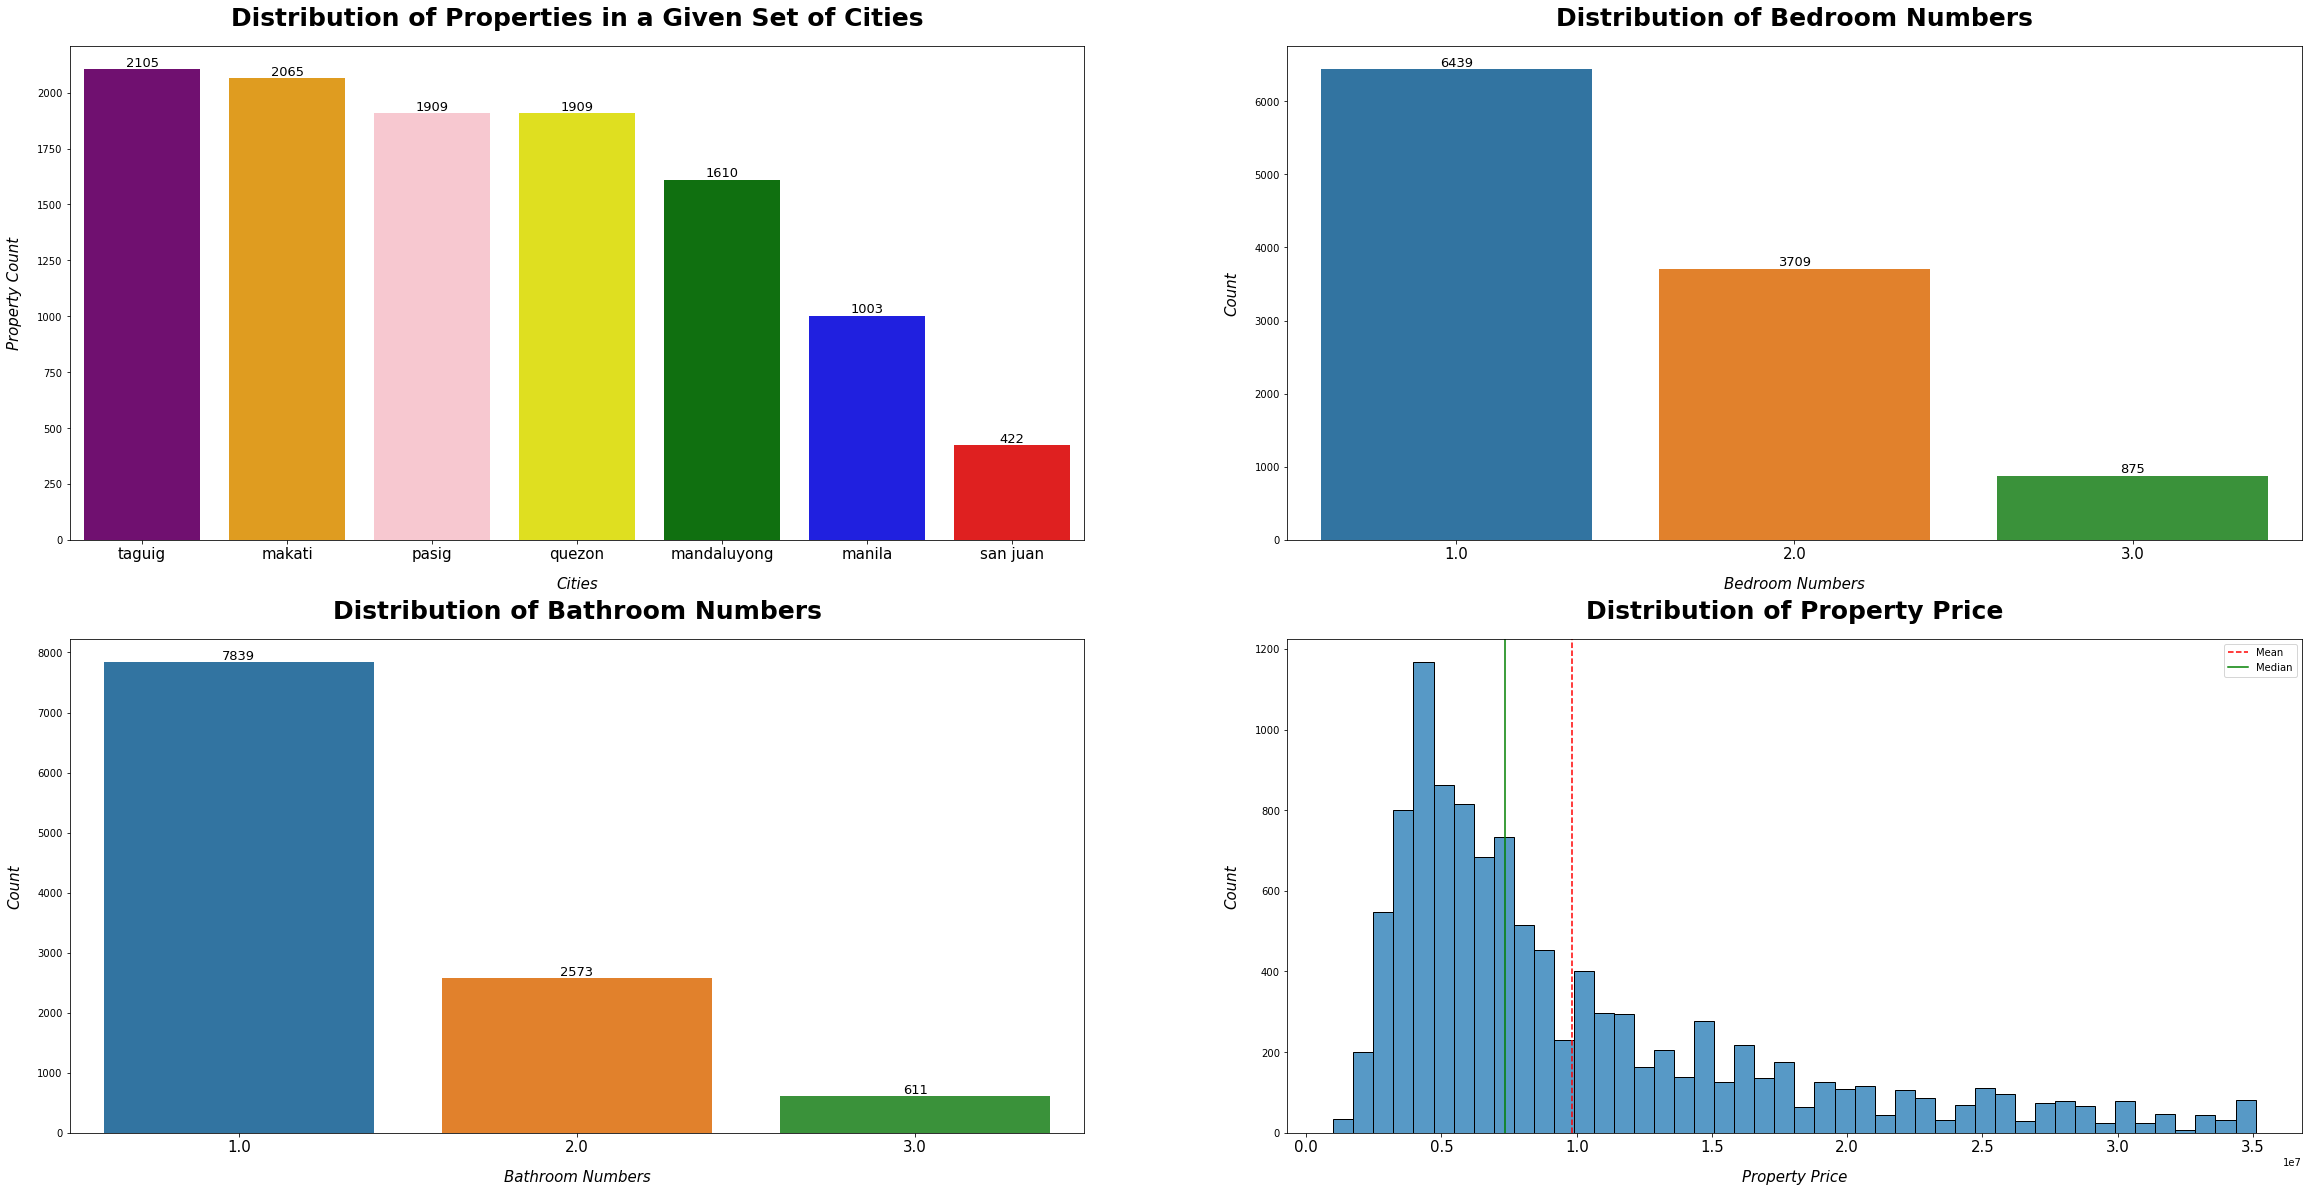

In [36]:
# more general visualizations for EDA
eda_gen_visualization_properties(clean_ncr_prop4sale)

In [37]:
def eda_spec_visualization_properties(df, city):
    
    city_info = df.query(f"city == '{city}'")
    
    bedroom_count = city_info.groupby('bedroom_num').listing.count().reset_index().sort_values(by='listing', ascending=False)
    bathroom_count = city_info.groupby('bathroom_num').listing.count().reset_index().sort_values(by='listing', ascending=False)
    
    #  creating figure 
    fig = plt.figure(figsize=(40,20))

    # bar chart to show distribution of bedroom numbers in properties
    ax_bedroom_count = fig.add_subplot(221)
    ax_bedroom_count = sns.barplot(x = bedroom_count.bedroom_num, y = bedroom_count.listing)

    ax_bedroom_count.bar_label(ax_bedroom_count.containers[0], size=13);
    ax_bedroom_count.set_ylabel('Count', size=15, labelpad=15, style='italic')
    ax_bedroom_count.set_xlabel('Bedroom Numbers', size=15, labelpad=15, style='italic')
    ax_bedroom_count.set_title('Distribution of Bedroom Numbers', size=25, weight='bold', pad=20);

    plt.xticks(size=15);

    # bar chart to show distribution of bathroom numbers
    ax_bathroom_count = fig.add_subplot(222)
    ax_bathroom_count = sns.barplot(x = bathroom_count.bathroom_num, y = bathroom_count.listing)

    ax_bathroom_count.bar_label(ax_bathroom_count.containers[0], size=13);
    ax_bathroom_count.set_ylabel('Count', size=15, labelpad=15, style='italic')
    ax_bathroom_count.set_xlabel('Bathroom Numbers', size=15, labelpad=15, style='italic')
    ax_bathroom_count.set_title('Distribution of Bathroom Numbers', size=25, weight='bold', pad=20);

    plt.xticks(size=15);

    # bar chart to show distribution of floor area
    floor_area = city_info.floor_area
    floor_area_statistic = floor_area.describe()
    floor_area_mean = floor_area_statistic.mean()
    floor_area_median = floor_area_statistic.median()
    
    ax_floor_area = fig.add_subplot(223)
    ax_floor_area = sns.histplot(x=floor_area)
    
    ax_floor_area.set_ylabel('Count', size=15, labelpad=15, style='italic')
    ax_floor_area.set_xlabel('Floor Area (Square Meters)', size=15, labelpad=15, style='italic')
    ax_floor_area.set_title('Distribution of Floor Area', size=25, weight='bold', pad=20);
    ax_floor_area.axvline(x=floor_area_mean, color='r', linestyle='--', label='Mean')
    ax_floor_area.axvline(x=floor_area_median, color='g', linestyle='-', label='Median')
    ax_floor_area.legend()
    
    # bar chart to show distribution of floor area
    price = city_info.price
    price_statistic = price.describe()
    price_mean = price_statistic.mean()
    price_median = price_statistic.median()
    
    ax_price = fig.add_subplot(224)
    ax_price = sns.histplot(x=price)
    
    ax_price.set_ylabel('Count', size=15, labelpad=15, style='italic')
    ax_price.set_xlabel('Property Prices', size=15, labelpad=15, style='italic')
    ax_price.set_title('Distribution of Property Prices', size=25, weight='bold', pad=20);
    ax_price.axvline(x=price_mean, color='r', linestyle='--', label='Mean')
    ax_price.axvline(x=price_median, color='g', linestyle='-', label='Median')
    ax_price.legend()

    plt.xticks(size=15);
    
    fig.suptitle(f'Data on Schools in {city.capitalize()}', size=35, weight='bold');
    
    print(f'Summary Statistics for {city.capitalize()}')
    display(price_statistic)


Summary Statistics for San juan


count          422.000
mean     9,439,222.960
std      7,220,450.853
min      1,200,000.000
25%      4,403,889.000
50%      6,500,000.000
75%     12,665,000.000
max     35,000,000.000
Name: price, dtype: float64

Summary Statistics for Manila


count        1,003.000
mean     5,423,172.152
std      2,929,992.447
min      1,200,000.000
25%      3,600,000.000
50%      4,818,178.000
75%      6,400,000.000
max     25,000,000.000
Name: price, dtype: float64

Summary Statistics for Quezon


count        1,909.000
mean     6,599,128.175
std      4,287,713.482
min      1,000,000.000
25%      3,800,000.000
50%      5,400,000.000
75%      7,891,613.000
max     35,000,000.000
Name: price, dtype: float64

Summary Statistics for Mandaluyong


count        1,610.000
mean     7,330,392.941
std      5,150,368.057
min      1,300,000.000
25%      4,200,000.000
50%      5,778,029.500
75%      8,003,961.000
max     35,000,000.000
Name: price, dtype: float64

Summary Statistics for Pasig


count        1,909.000
mean    10,294,196.040
std      7,041,654.199
min      1,100,000.000
25%      5,000,000.000
50%      8,000,000.000
75%     13,000,000.000
max     35,100,000.000
Name: price, dtype: float64

Summary Statistics for Makati


count        2,065.000
mean    12,701,815.742
std      8,433,019.400
min      1,700,000.000
25%      6,015,000.000
50%      9,500,000.000
75%     17,500,000.000
max     35,000,000.000
Name: price, dtype: float64

Summary Statistics for Taguig


count        2,105.000
mean    14,658,425.155
std      8,025,683.449
min      1,300,000.000
25%      8,000,000.000
50%     13,000,000.000
75%     20,000,000.000
max     35,031,000.000
Name: price, dtype: float64

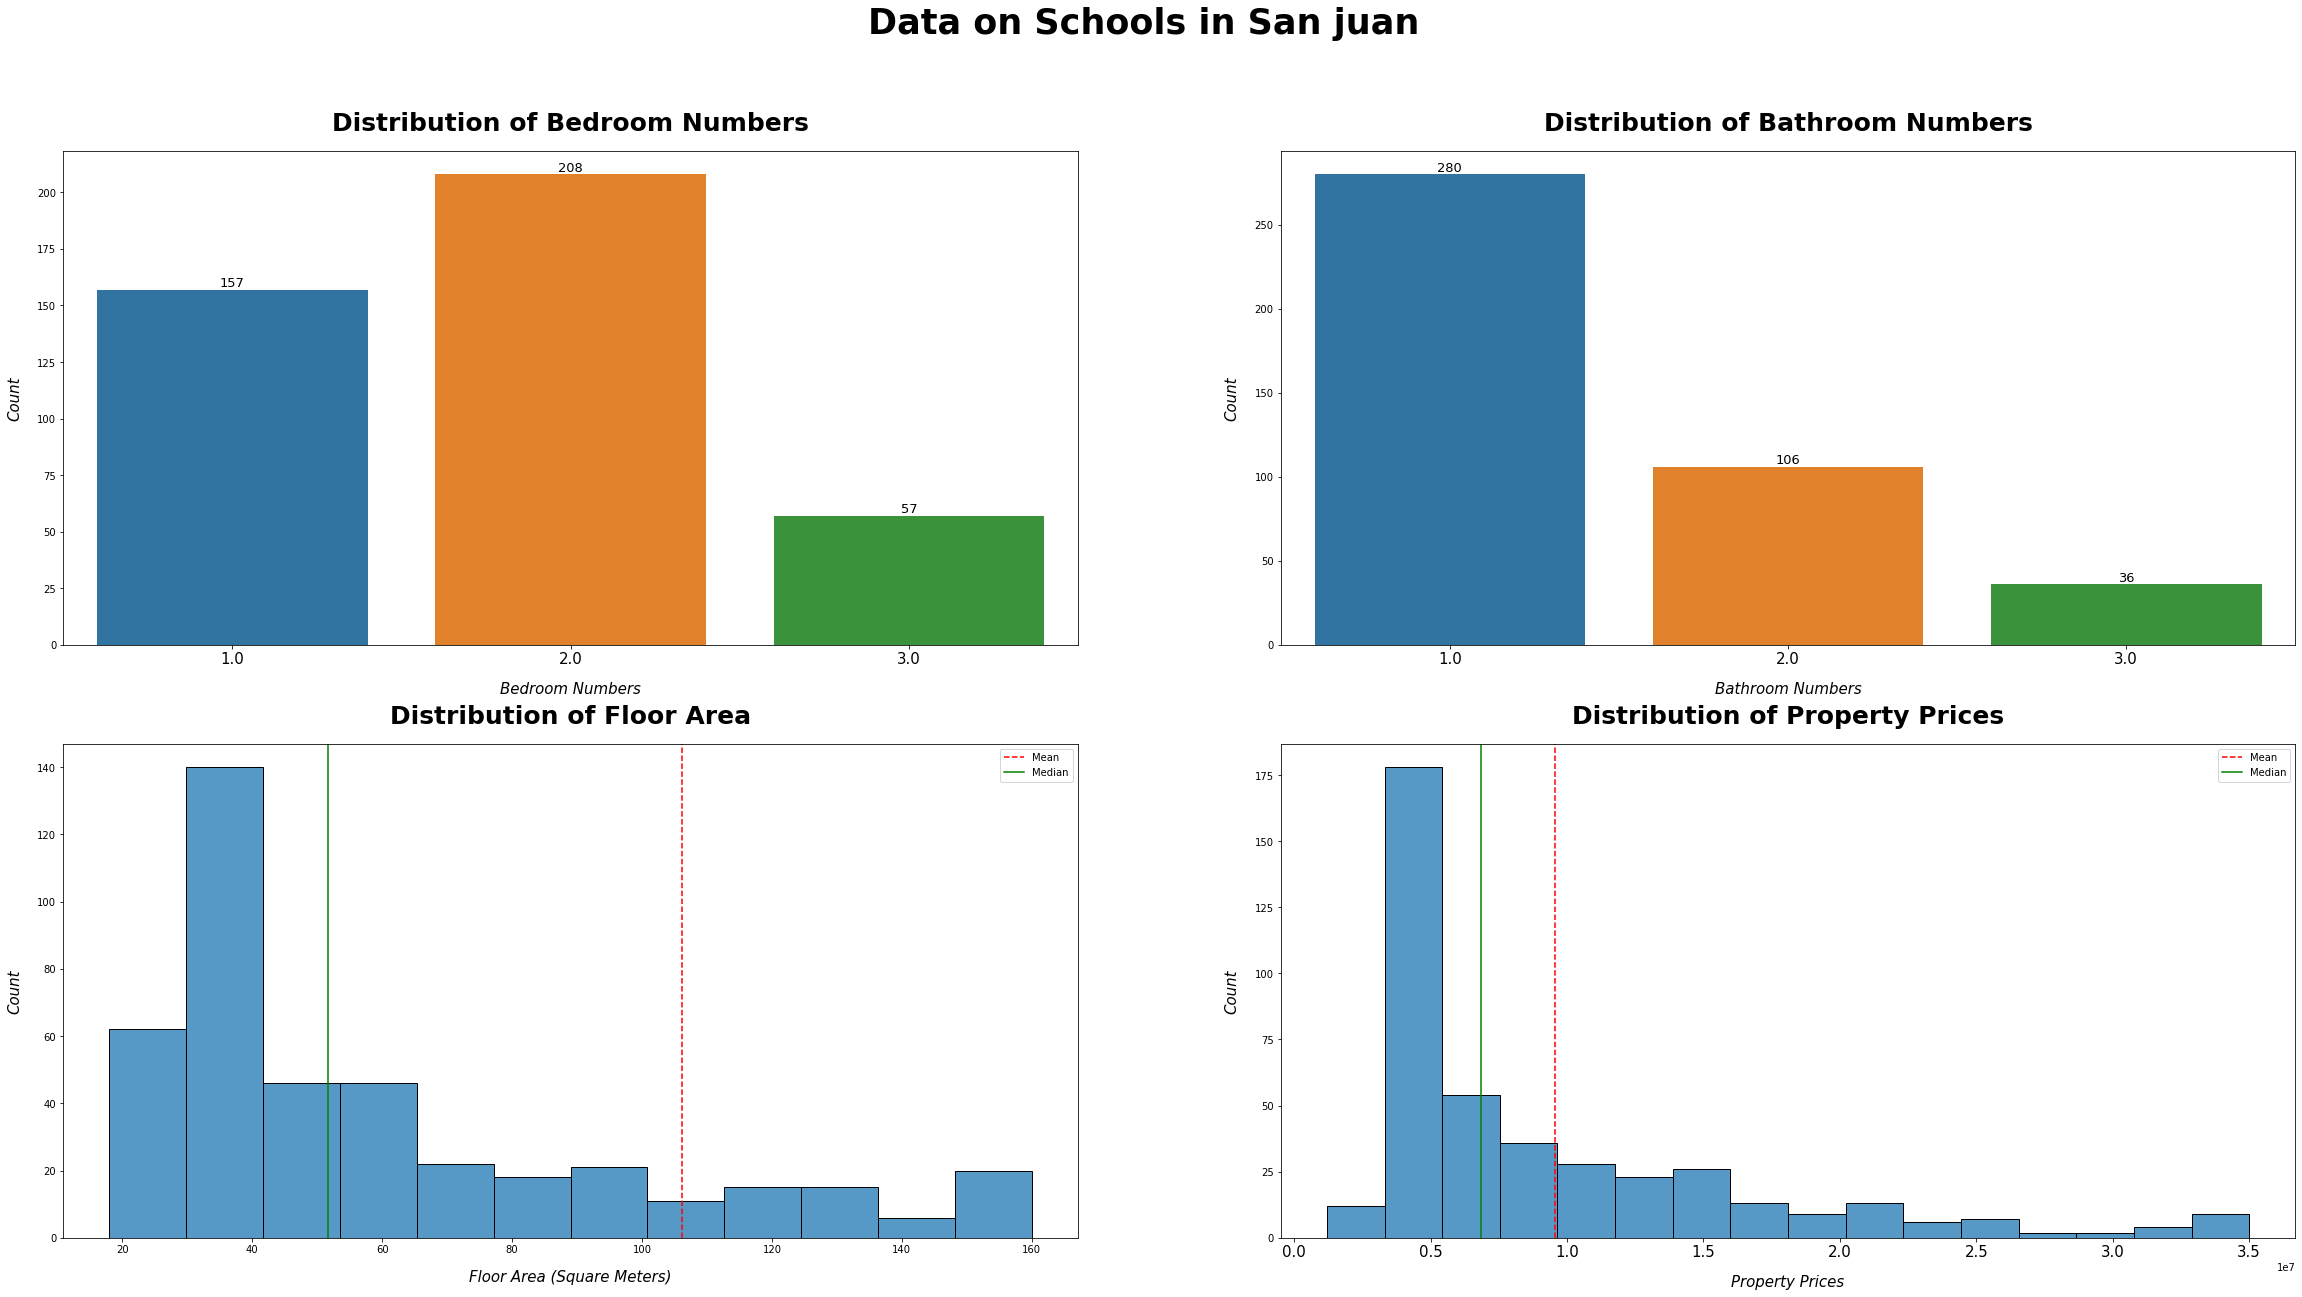

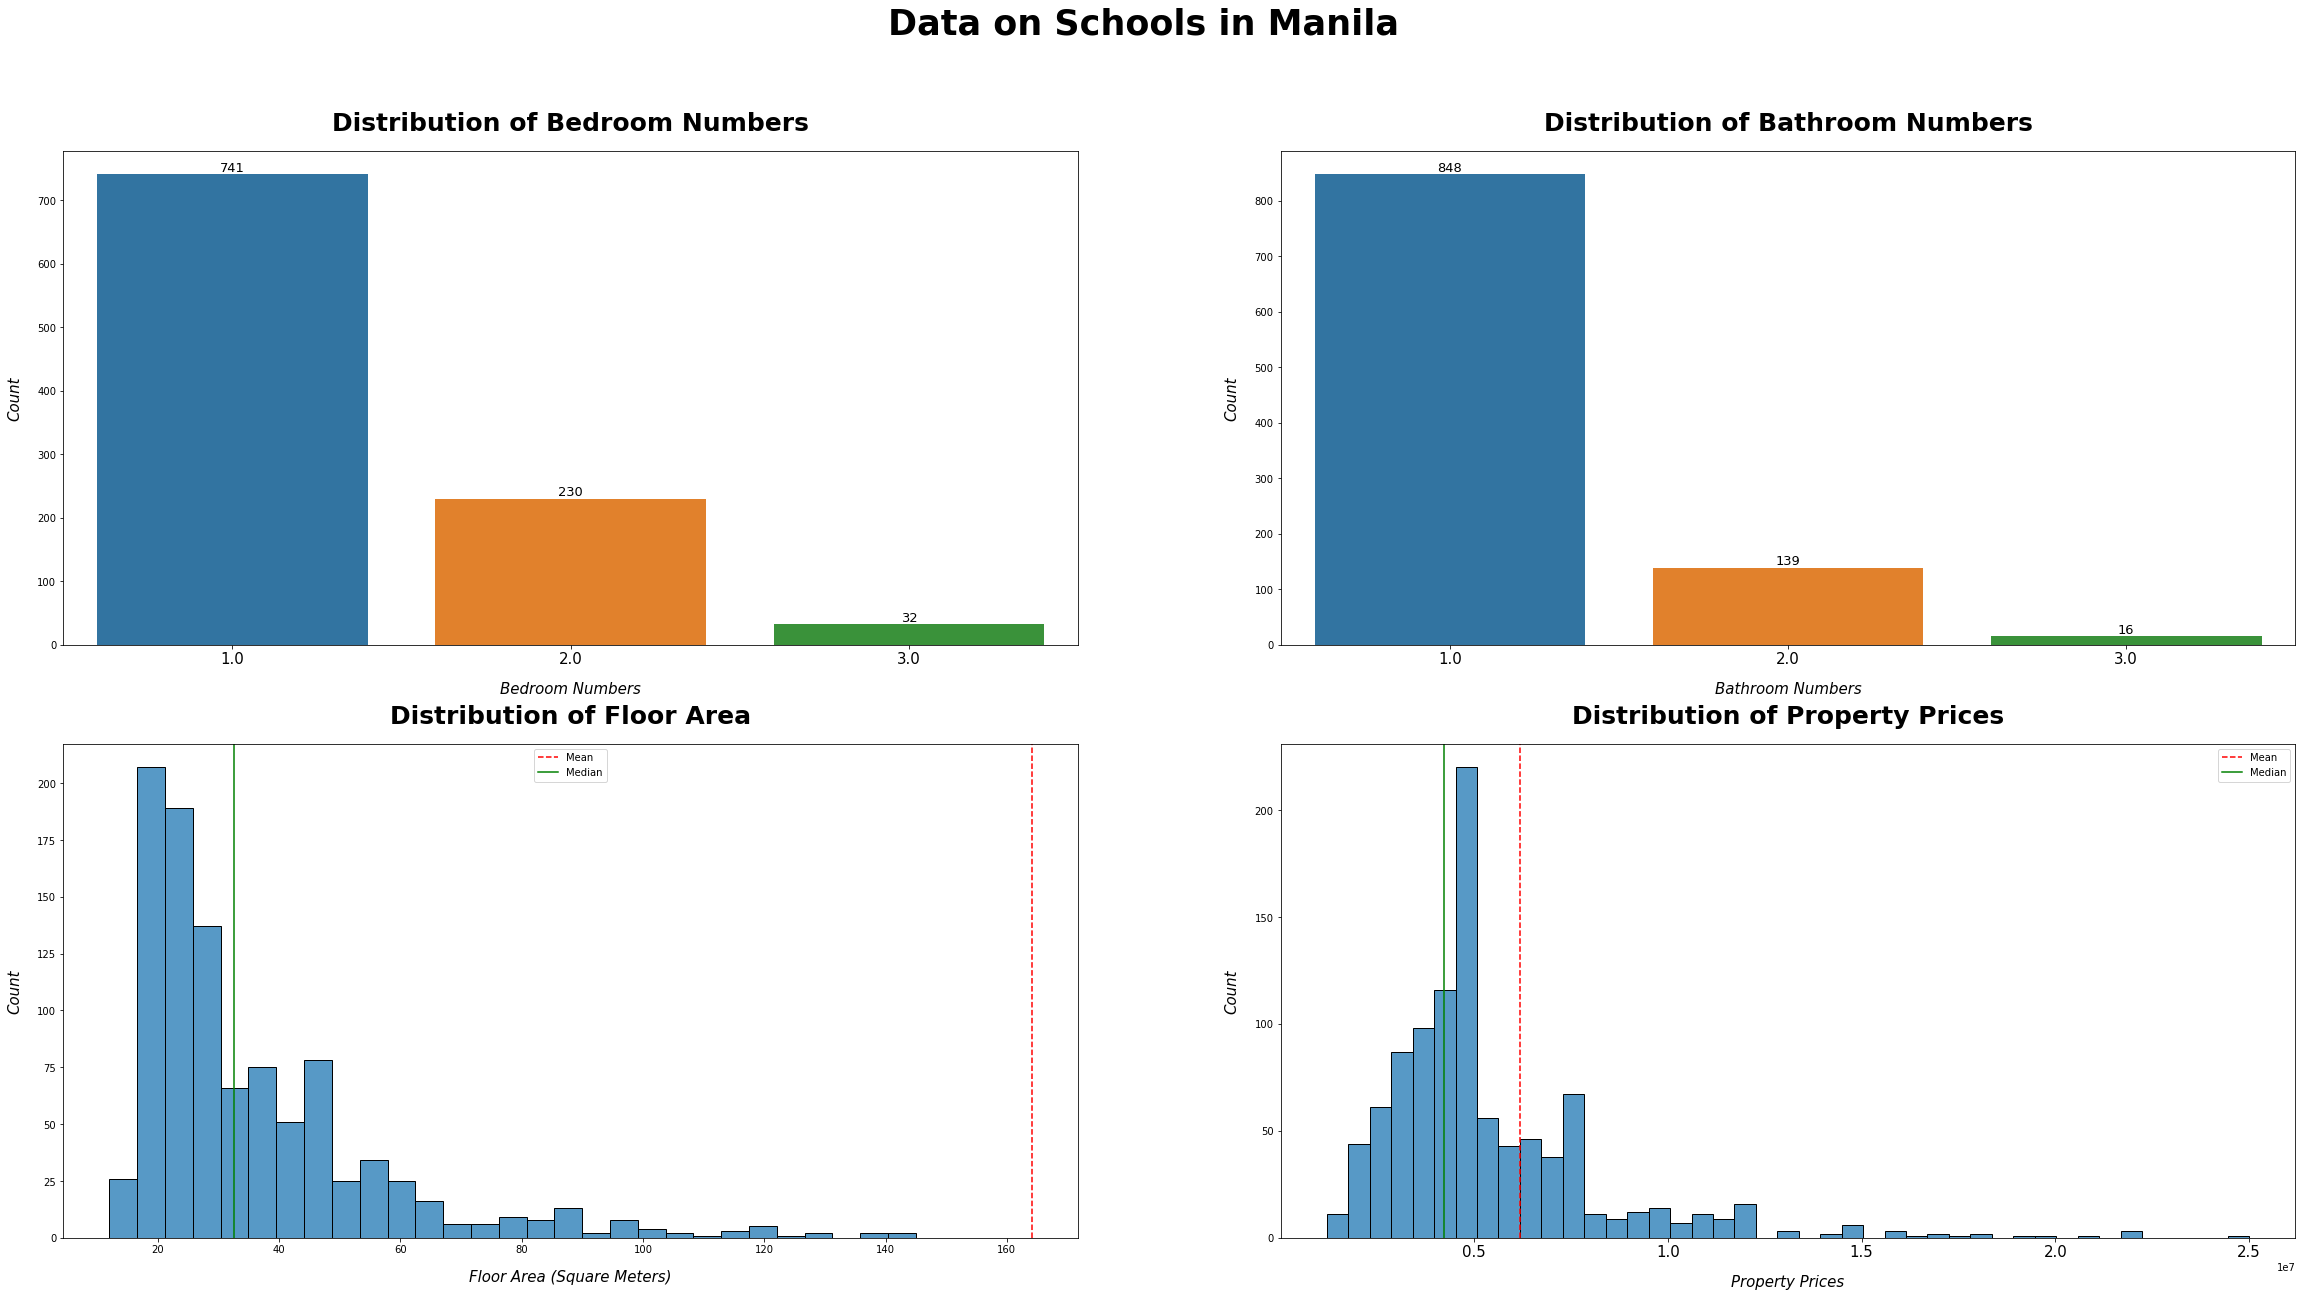

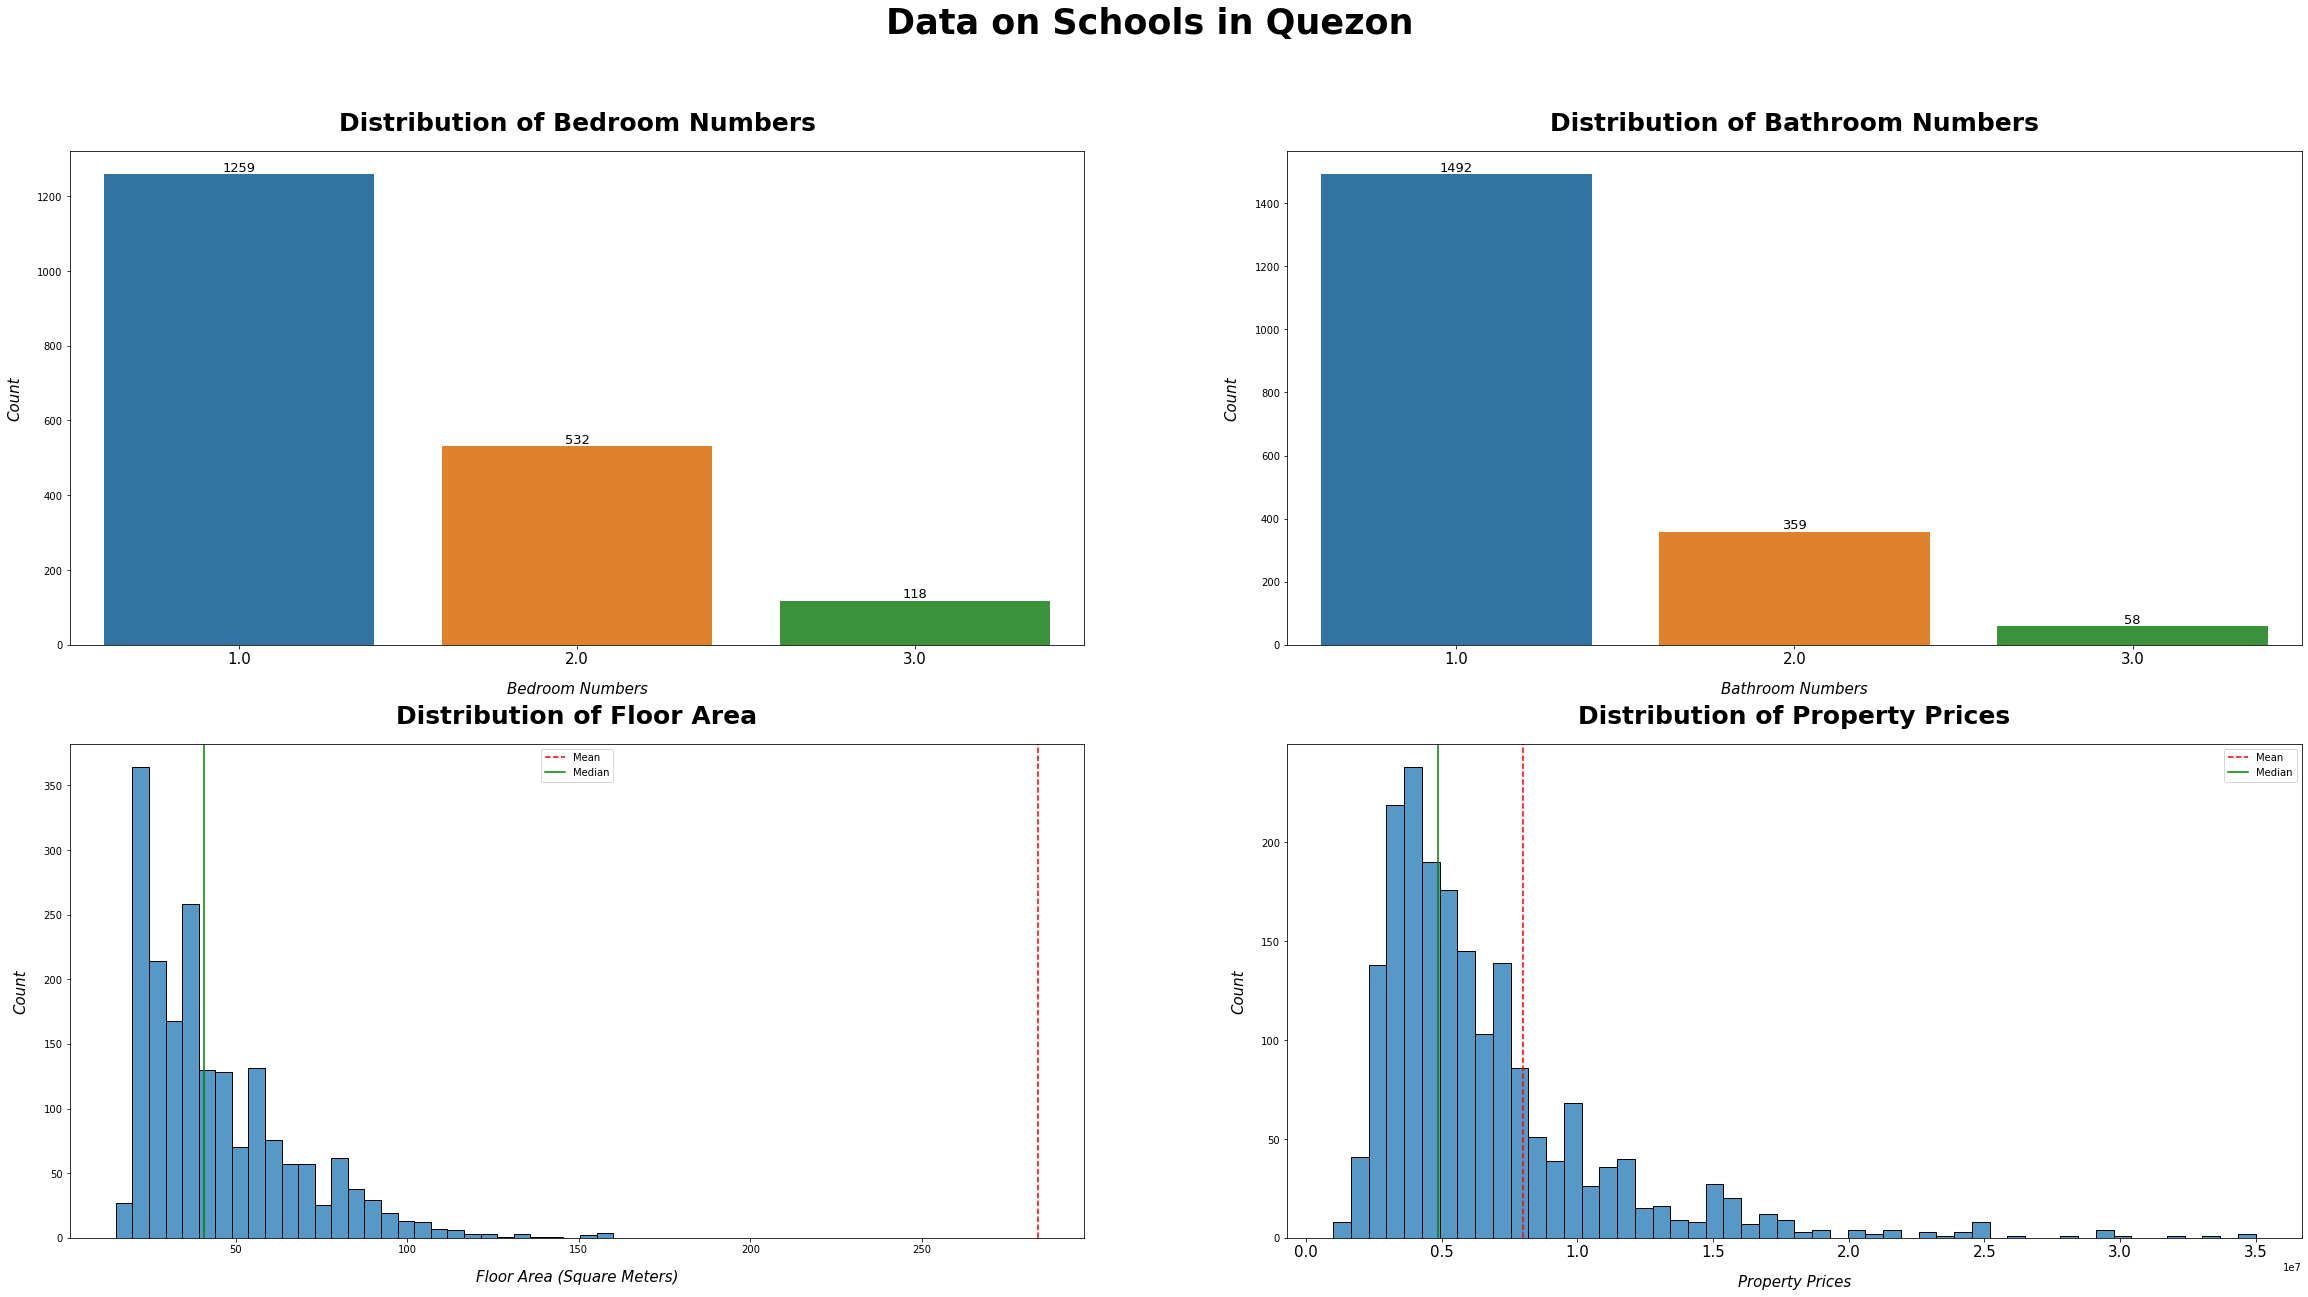

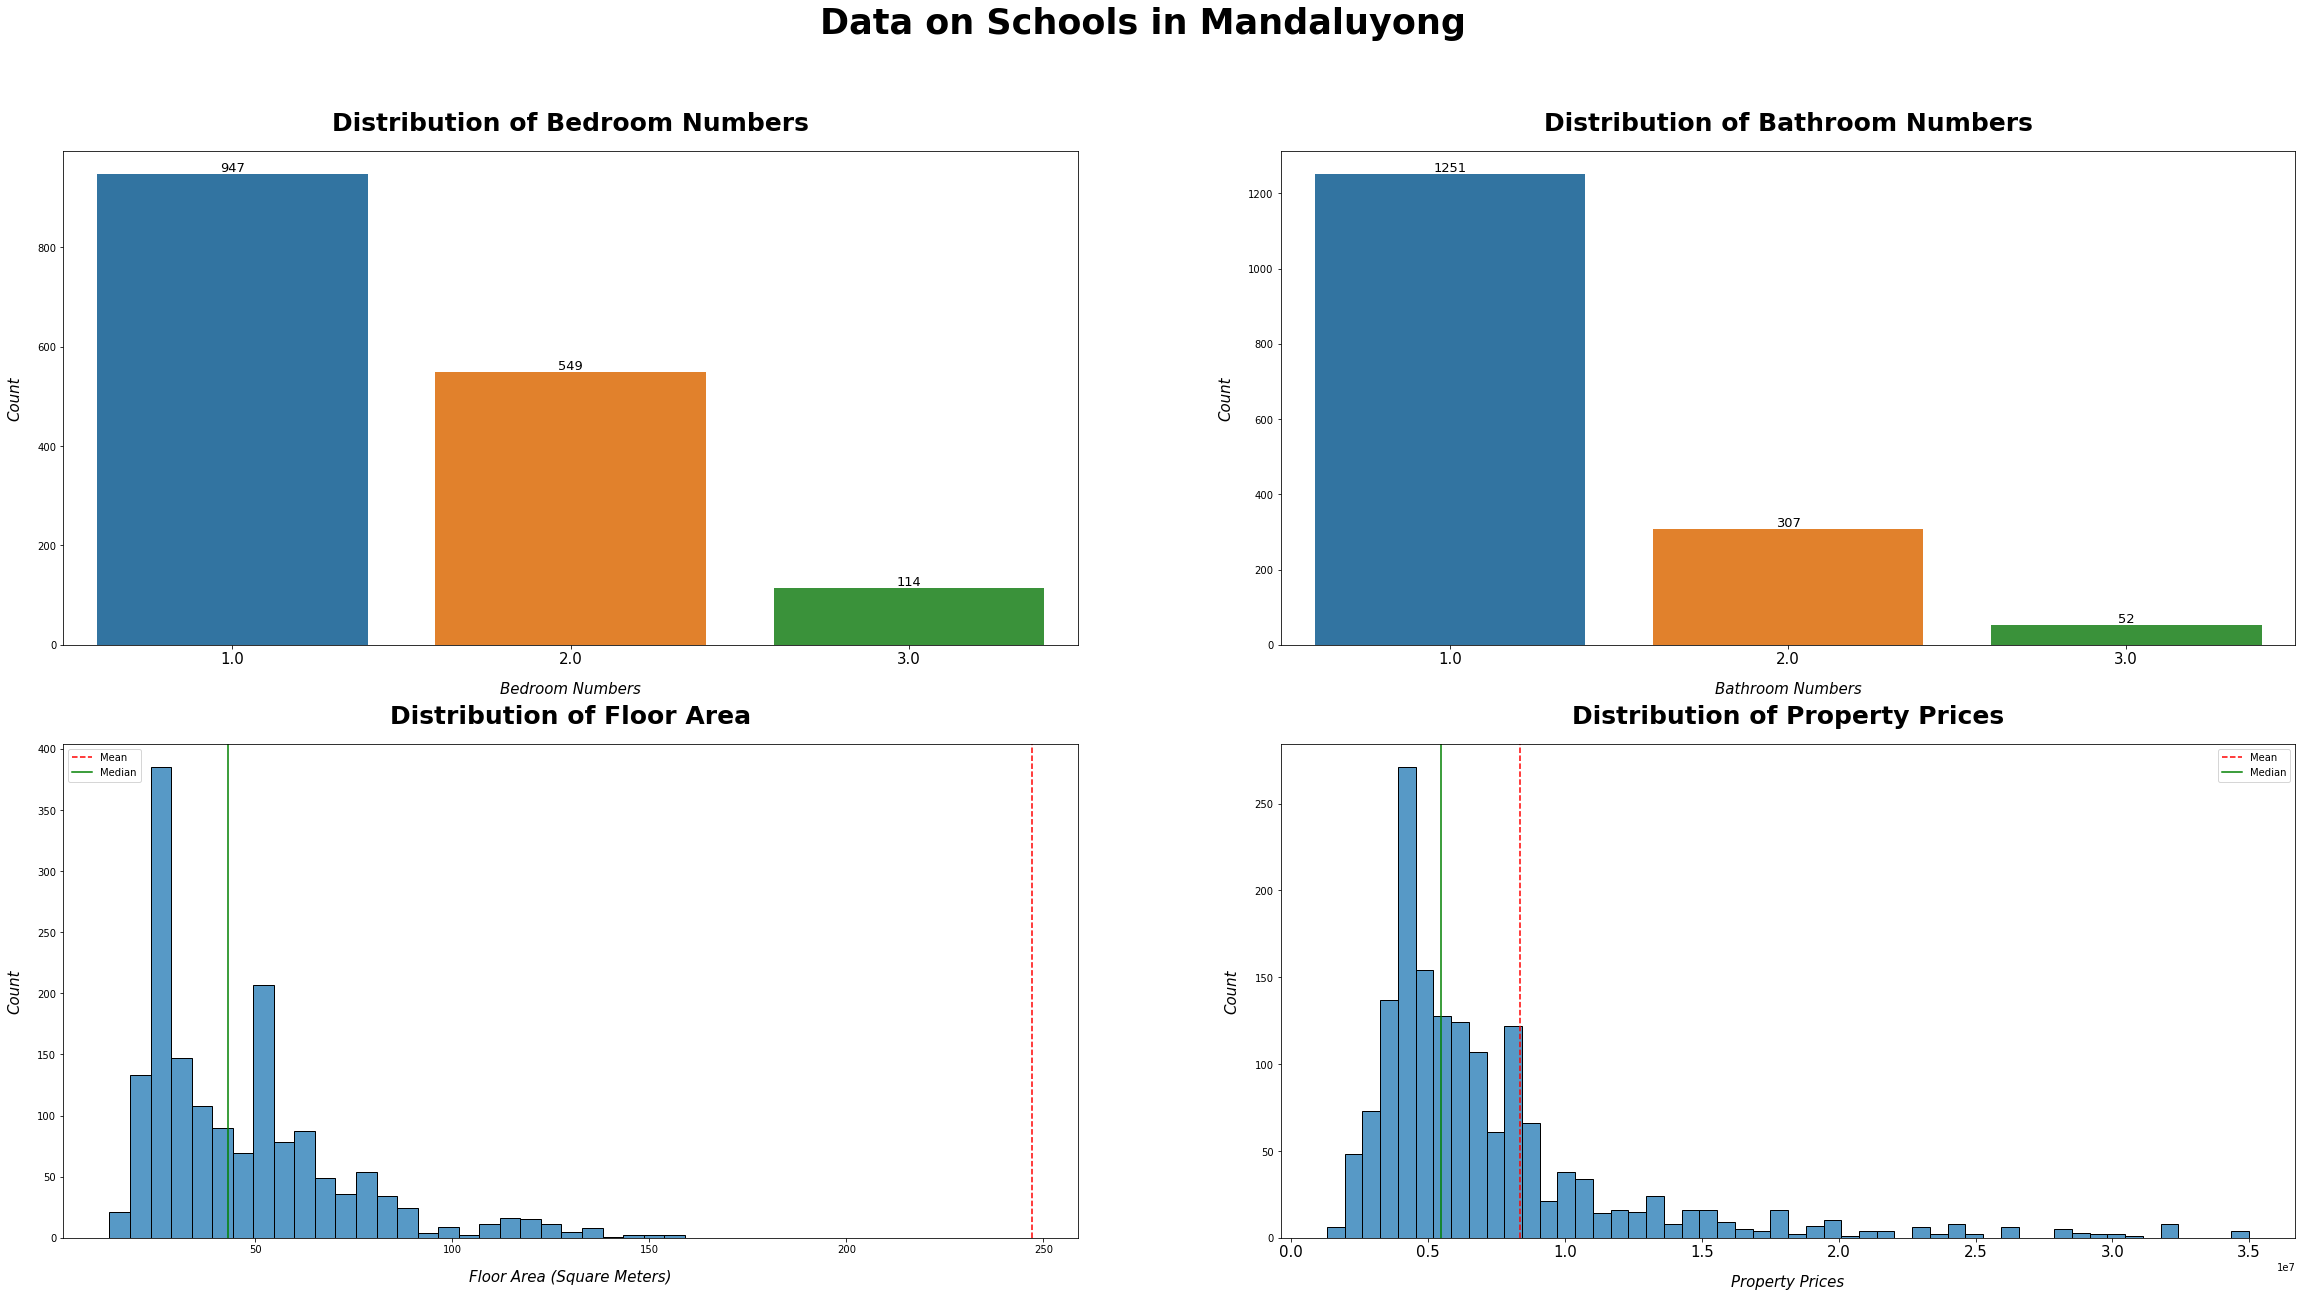

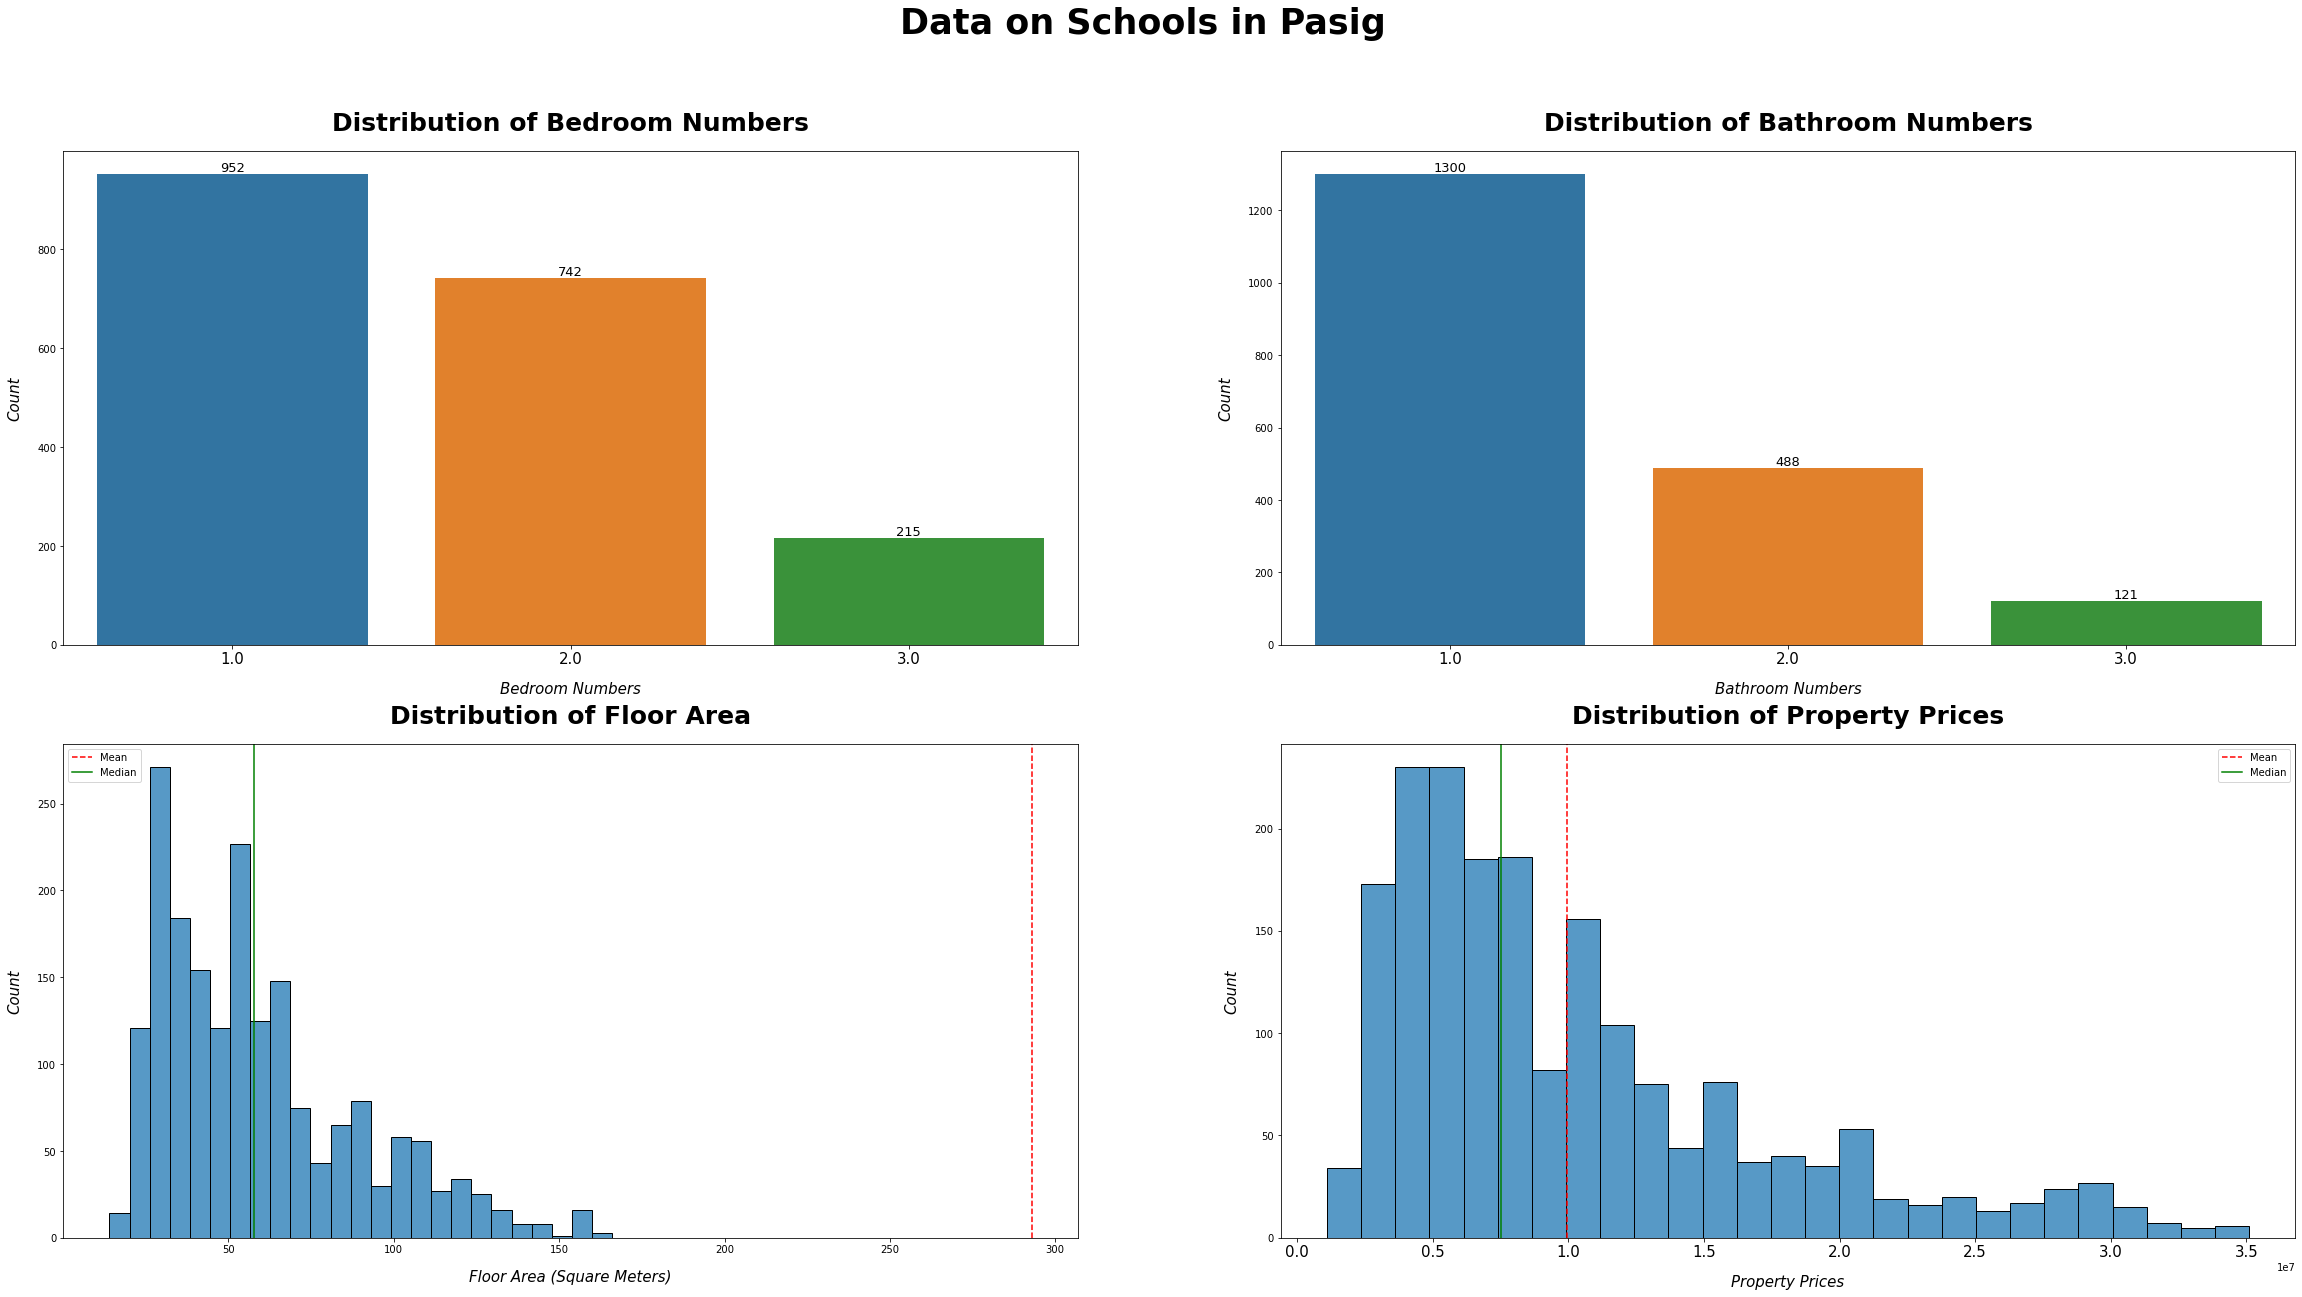

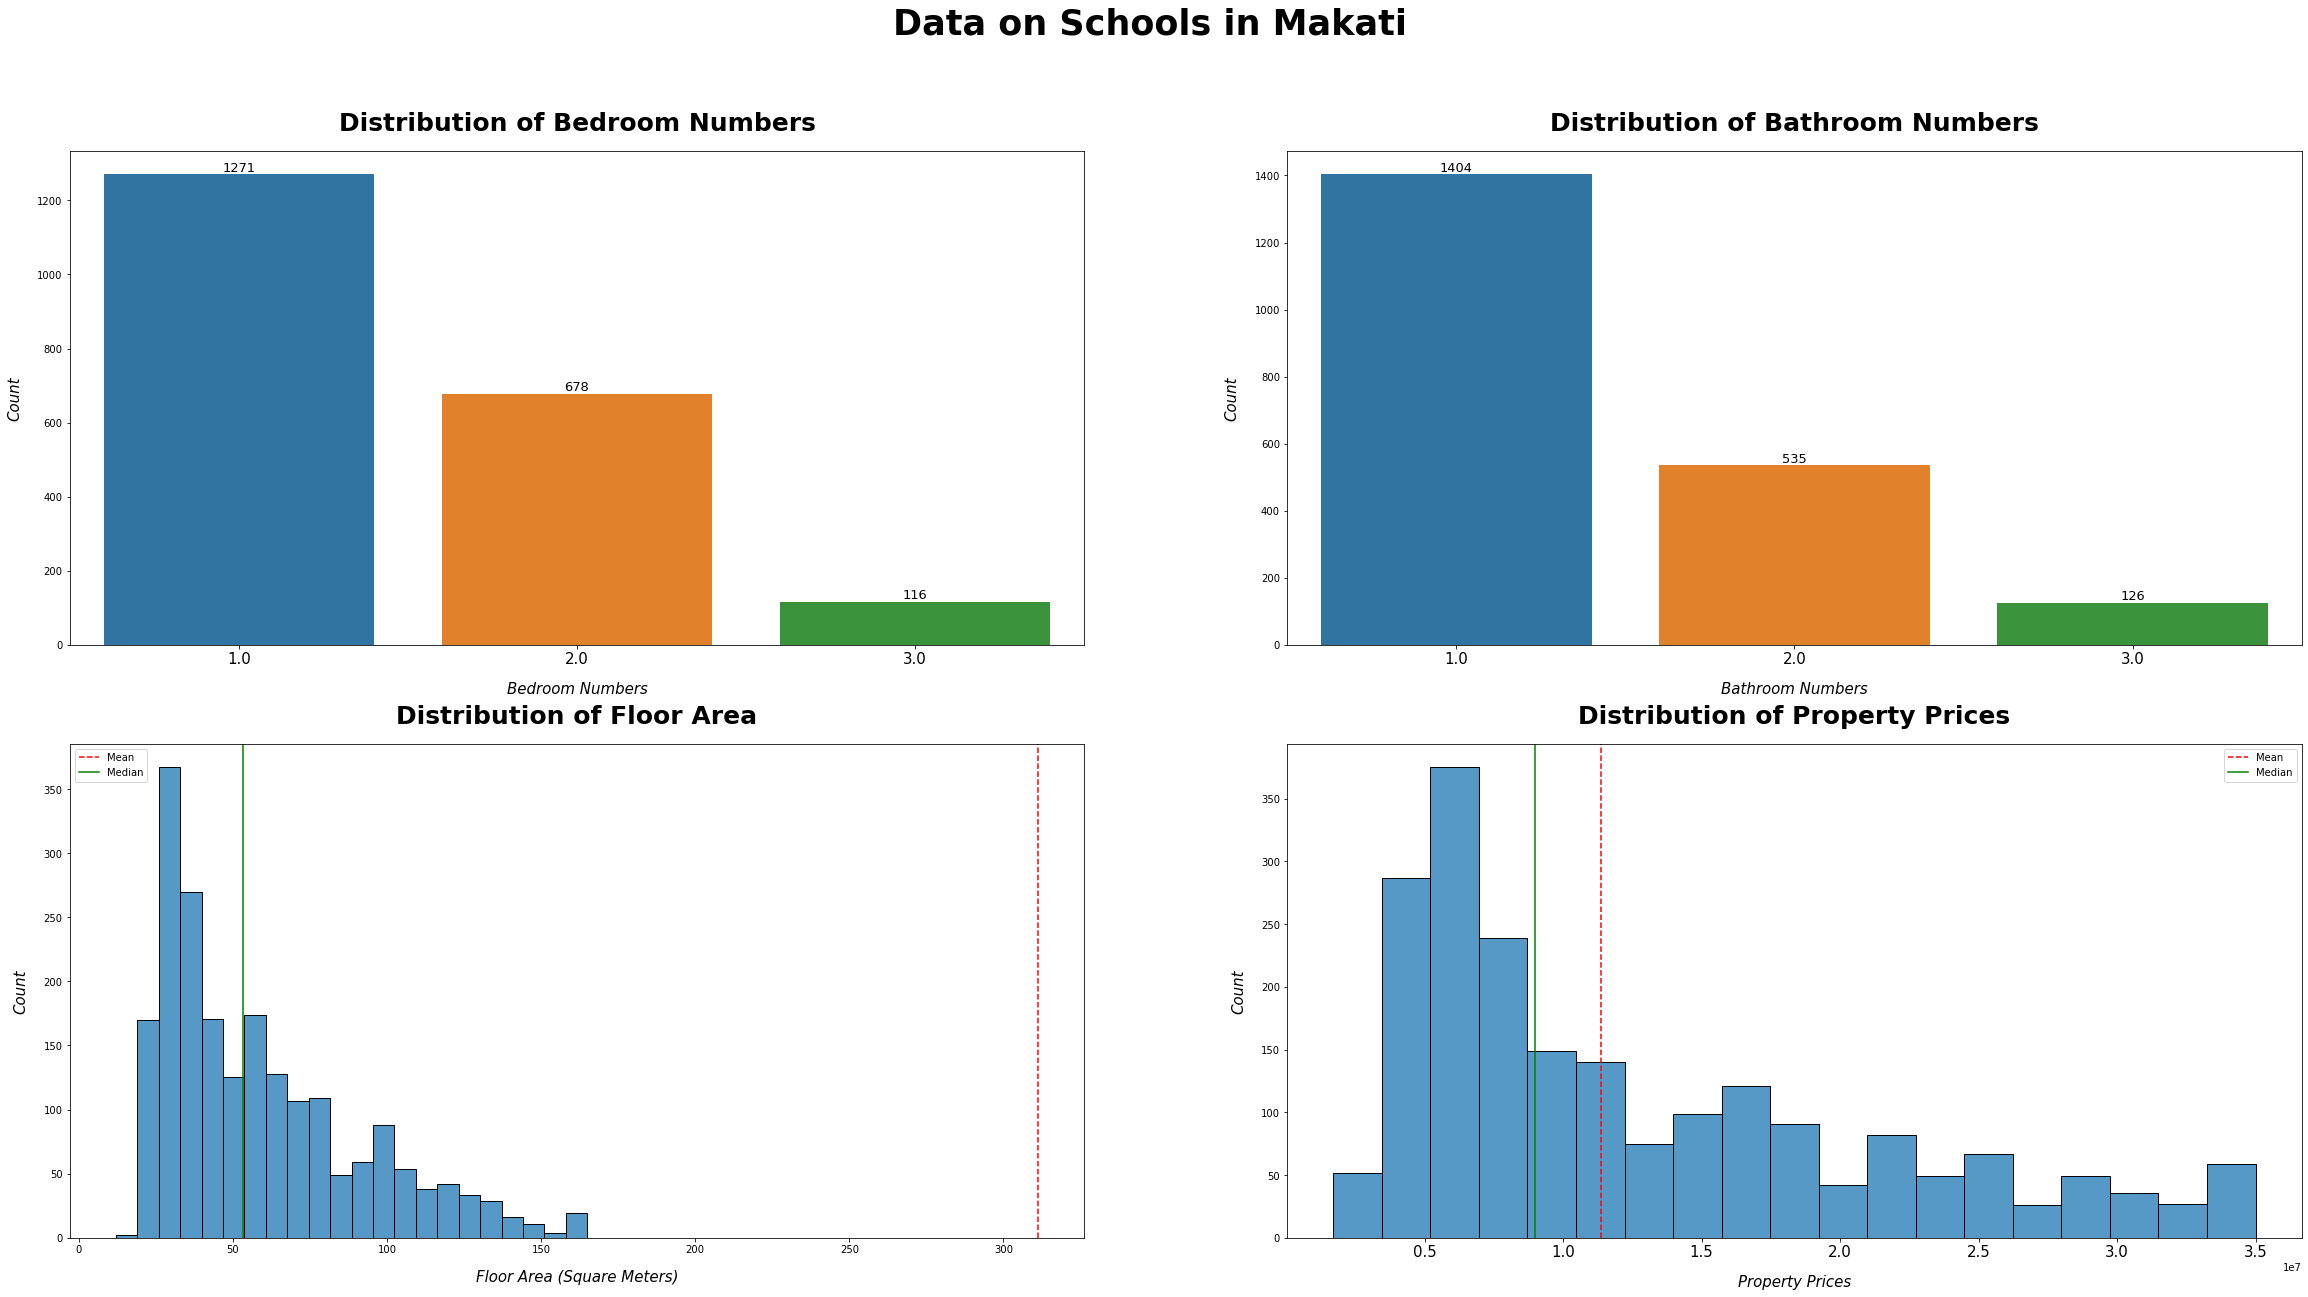

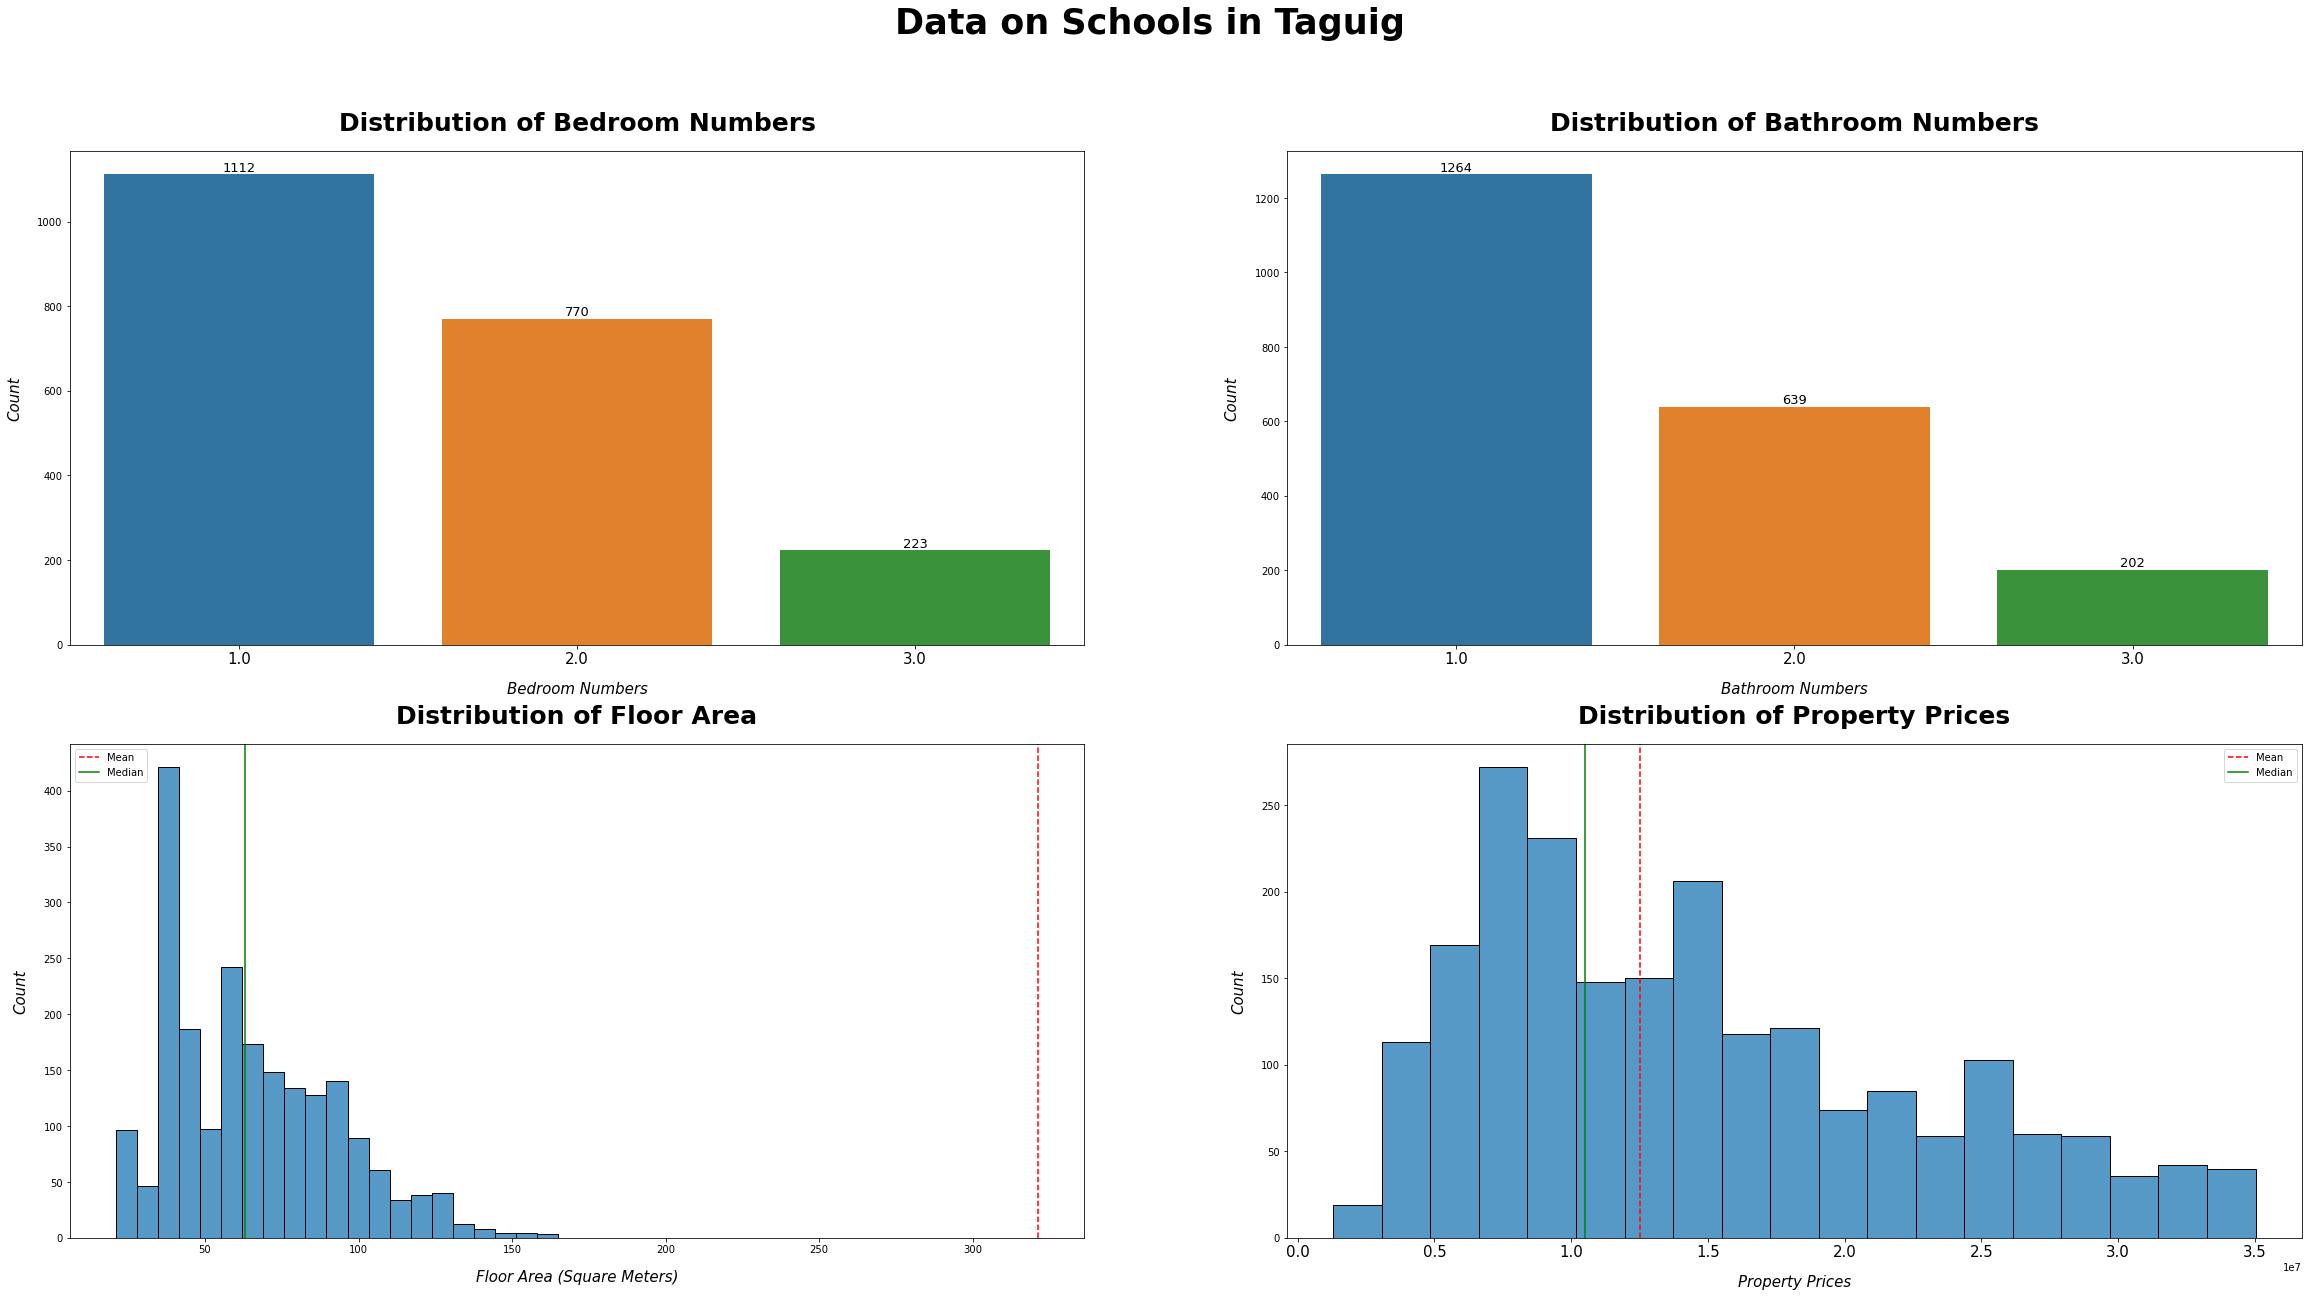

In [38]:
#  more city specific visualizations for EDA
cities = ['san juan', 
          'manila', 
          'quezon', 
          'mandaluyong',
          'pasig', 
          'makati',
          'taguig']

for city in cities:
    eda_spec_visualization_properties(clean_ncr_prop4sale, city)

In [39]:
#  saving clenaner version of the data to csv
clean_ncr_prop4sale.to_csv('data/clean/clean_ncr_prop4sale.csv')

<h1>NCR Properties for Rent Dataset</h1>

In [40]:
#  reading in csv to pandas dataframe
#  for NCR properties for rent data
ncr_prop4rent = pd.read_csv('data/for rent/ncr_4rent.csv')
ncr_prop4rent = ncr_prop4rent.drop(columns=['Unnamed: 0'])

ncr_prop4rent.head(5)

,listing,location,price,bedroom_num,bathroom_num,floor_area,land_size,longitude,latitude
0,1-BR Apartment Unit (45 sqm) 1 T&B with Pantry...,"Sampaloc, Manila","10,000",1,1.000,45.000,NaN,120.996,14.611
1,6 Room Apartment Unit for rent in Santa Cruz M...,"Santa Cruz, Manila","25,000",6,NaN,200.000,NaN,120.985,14.618
2,Studio Condo for Rent in Vista GL Taft Located...,"Ermita, Manila","18,000",1,1.000,21.000,NaN,120.983,14.586
3,80 sqm Room for Rent in Manila - FMRR Realty &...,Manila,"45,000",1,1.000,80.000,NaN,121.056,14.596
4,For Rent 2-Bedroom Apartment near UST in Sampa...,"Sampaloc, Manila","12,500",2,1.000,40.000,NaN,120.996,14.611


In [41]:
ncr_prop4rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15270 entries, 0 to 15269
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   listing       15270 non-null  object 
 1   location      15270 non-null  object 
 2   price         14990 non-null  object 
 3   bedroom_num   14748 non-null  object 
 4   bathroom_num  11806 non-null  float64
 5   floor_area    14535 non-null  float64
 6   land_size     2768 non-null   float64
 7   longitude     15270 non-null  float64
 8   latitude      15270 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.0+ MB


<p>This dataset already contains all relevant features.<p>
<p>Unfortunately, the price column is not parsed as numerical data type. We will have to fix that later.</p>
<p>We can see here as well that there are columns that have missing values too.</p>
<p>We shall investigate this further.</p>

<AxesSubplot:>

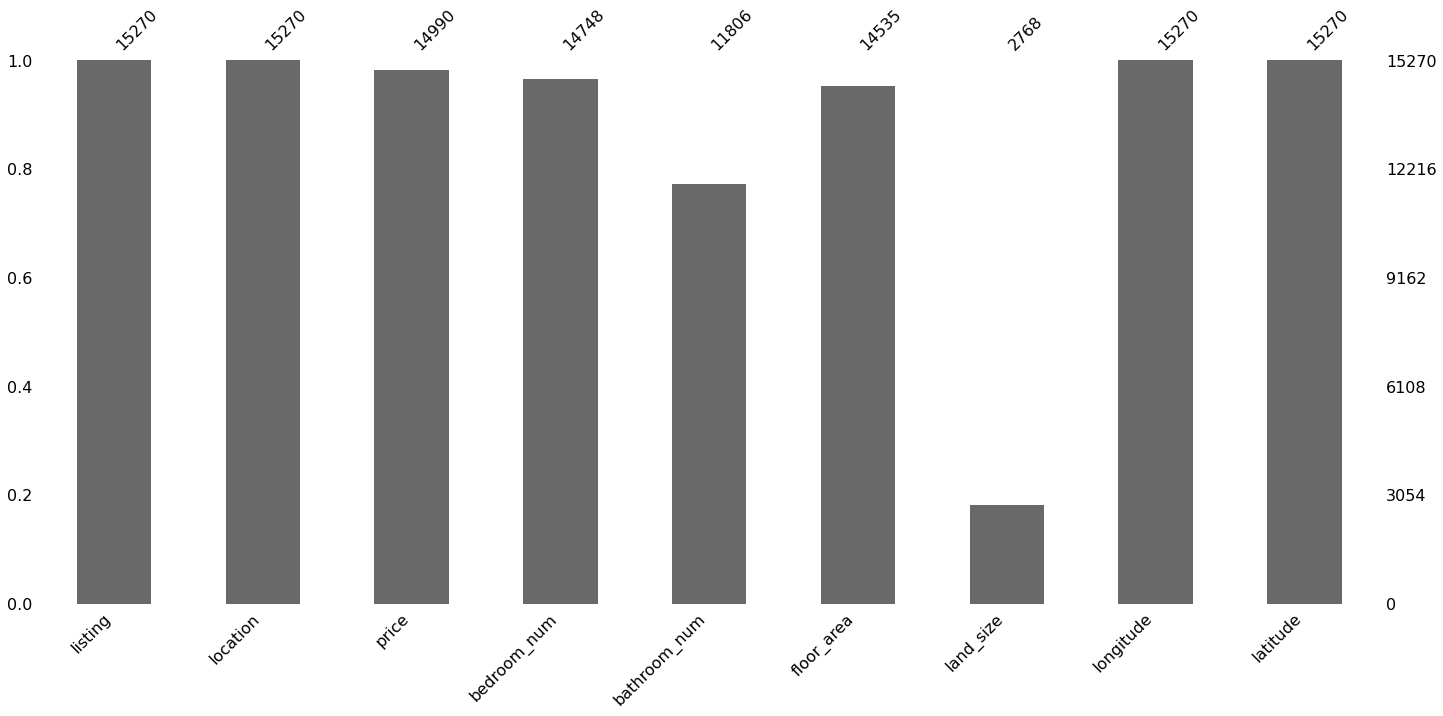

In [42]:
msno.bar(ncr_prop4rent)

<AxesSubplot:>

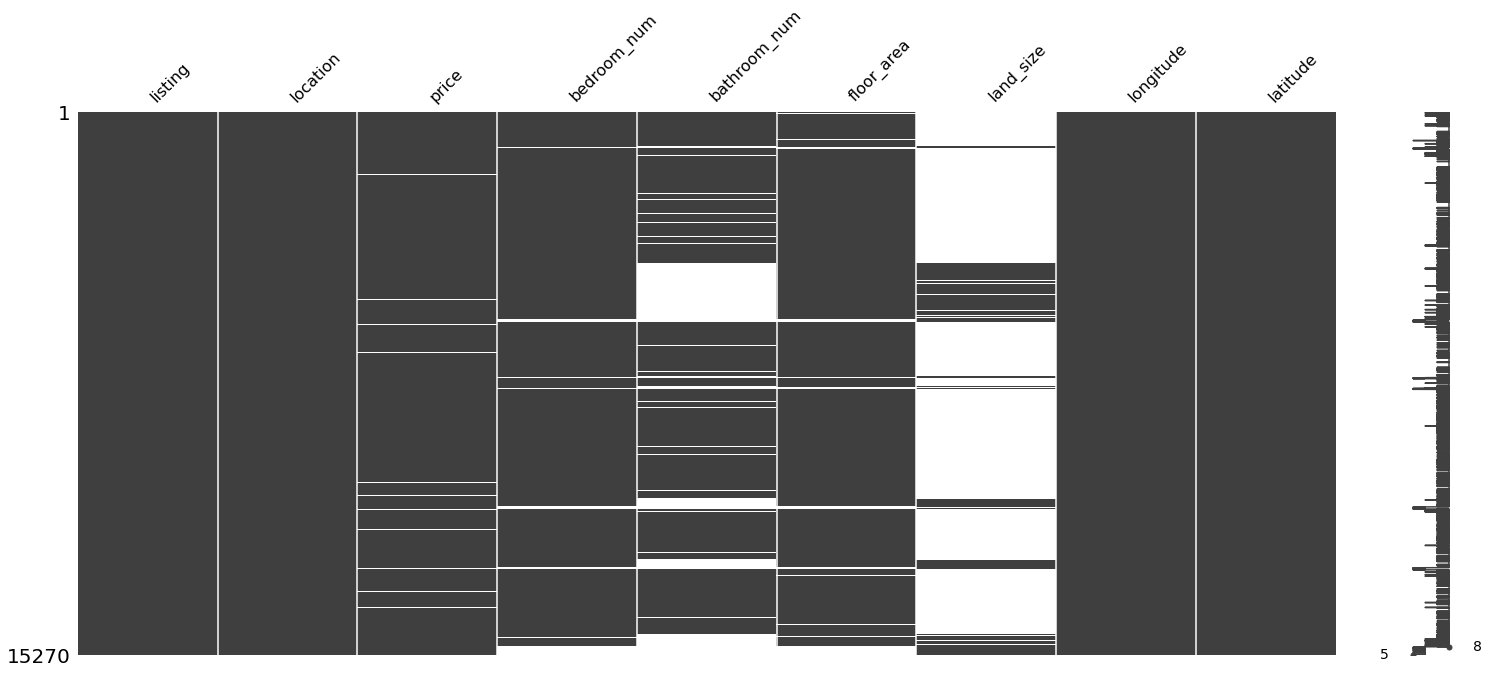

In [43]:
msno.matrix(ncr_prop4rent)

<p>It seems that the following columns have missing values:</p>
<ul>
<li>price</li>
<li>bedroom_num</li> 
<li>bathroom_num</li>
<li>floor_area</li>
<li>land_size</li>
</ul>
<p>We will drop entries with empty null values in all the columns with missing values.</p>
<p>We will drop land_size columns since it has nearly no values.</p>
<p>We will also check if there are any duplicate entries in the dataset too.</p>

<h2>Data Cleaning</h2>

In [44]:
#  string to float for bedroom_num 
ncr_prop4rent['bedroom_num'] = ncr_prop4rent['bedroom_num'].str.replace(',','')
ncr_prop4rent['bedroom_num'] = ncr_prop4rent['bedroom_num'].astype('float')

In [45]:
rent_duplicate_count = ncr_prop4rent.duplicated(subset=['listing', 'location'], keep='first').sum()
print(f'There are {rent_duplicate_count} duplicate listings \nThat is roughly {rent_duplicate_count/ncr_prop4sale.shape[0]*100}% of the listings')

There are 1584 duplicate listings 
That is roughly 5.517241379310345% of the listings


In [46]:
#  dropping rows with duplicate values 
pithy_ncr_prop4rent = ncr_prop4rent.drop_duplicates(subset=['listing', 'location'], keep='first').reset_index(drop=True)
print(f'The dataset is now reduced to {pithy_ncr_prop4rent.shape[0]} listings')

The dataset is now reduced to 13686 listings


In [47]:
#  dropping rows with missing values
pithy_ncr_prop4rent = pithy_ncr_prop4rent.dropna(axis=0, how='any', subset=['price','bedroom_num','bathroom_num','floor_area']).reset_index(drop=True)
print(f'The dataset is now reduced to {pithy_ncr_prop4rent.shape[0]} listings')

The dataset is now reduced to 10929 listings


In [48]:
pithy_ncr_prop4rent = pithy_ncr_prop4rent.drop(columns=['land_size'])

<AxesSubplot:>

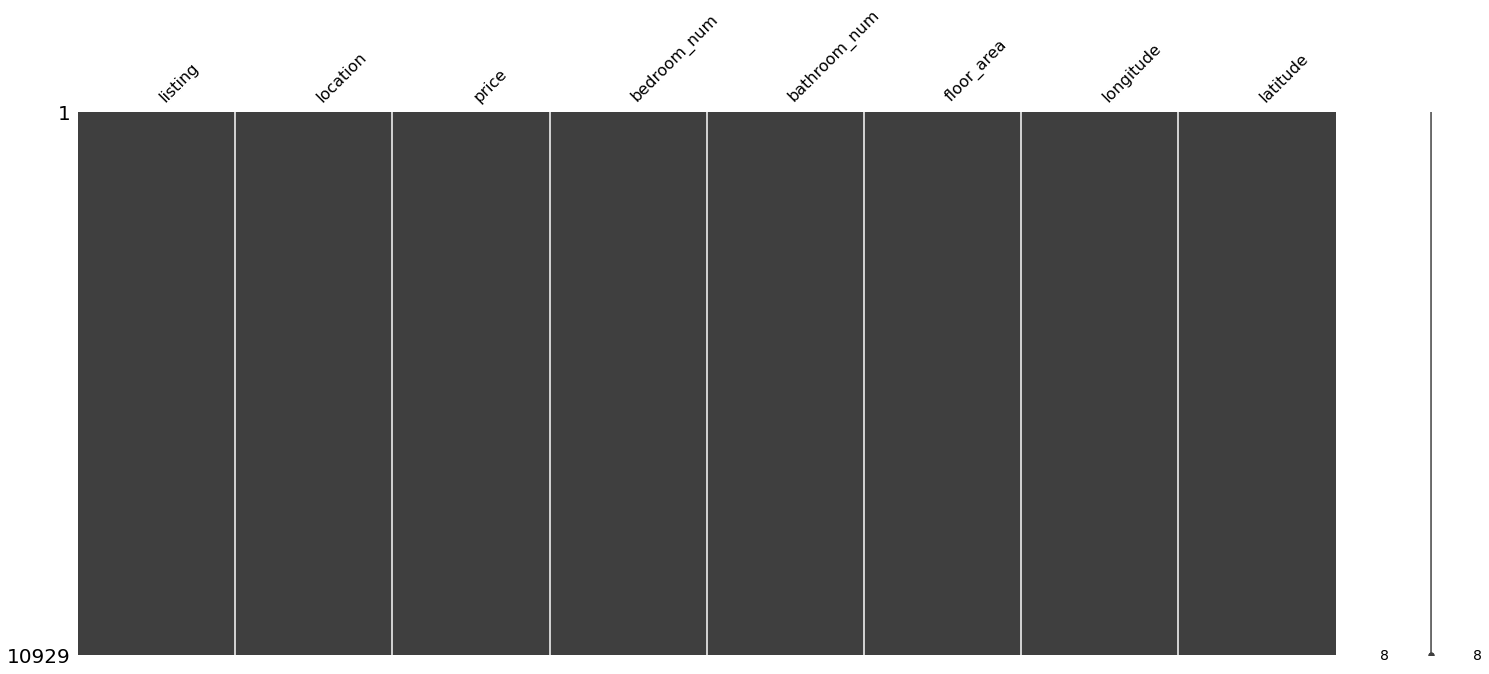

In [49]:
#  to verify that there are no more missing values in the dataset
msno.matrix(pithy_ncr_prop4rent)

In [50]:
#  stripping the price column of the commas and converting it to float thereafter
pithy_ncr_prop4rent['price'] = pithy_ncr_prop4rent['price'].apply(lambda x: x.replace(',', ''))
pithy_ncr_prop4rent['price'] = pithy_ncr_prop4rent['price'].astype(float)

pithy_ncr_prop4rent.sample(15)

,listing,location,price,bedroom_num,bathroom_num,floor_area,longitude,latitude
2751,"For Rent: Greenbelt Madison, Makati, Studio, F...","Legazpi Village, Makati","40,000.000",1.000,1.000,37.000,121.013,14.557
6961,Fully Furnished 2-Bedroom Condo Unit for Rent ...,"Fort Bonifacio, Taguig","70,000.000",2.000,2.000,88.000,121.050,14.541
2388,For LEASE 1 bedroom UNIT / Manansala Tower Roc...,"Poblacion, Makati","65,000.000",1.000,1.000,71.000,121.032,14.566
4786,Soho Central Mandaluyong - Fully Furnished Stu...,"Highway Hills, Mandaluyong","20,000.000",1.000,1.000,32.000,121.052,14.578
6925,1 bedroom with Parking FOR rent at Forbeswood ...,"Fort Bonifacio, Taguig","35,000.000",1.000,1.000,36.000,121.045,14.551
4708,For Rent Gueventville 2 Bedrooms with Balcony ...,"Mauway, Mandaluyong","25,000.000",2.000,2.000,50.000,121.044,14.582
1898,Park Terraces Three Bedroom Condo Rent Ayala C...,"San Lorenzo, Makati","230,000.000",3.000,3.000,166.000,121.022,14.551
8211,"1-Bedroom With Parking, The Grove By Rockwell,...","Rosario, Pasig","48,000.000",1.000,1.000,65.000,121.089,14.588
8439,Studio unit in Pearl Place Ortigas,"San Antonio, Pasig","15,000.000",1.000,1.000,24.000,121.061,14.583
8757,"2 BR Condo for Rent near Ortigas CBD, Sorrento...","Rosario, Pasig","20,000.000",2.000,1.000,40.000,121.090,14.588


count      10,929.000
mean       57,779.081
std        72,539.552
min           780.000
25%        20,000.000
50%        35,000.000
75%        70,000.000
max     2,000,000.000
Name: price, dtype: float64

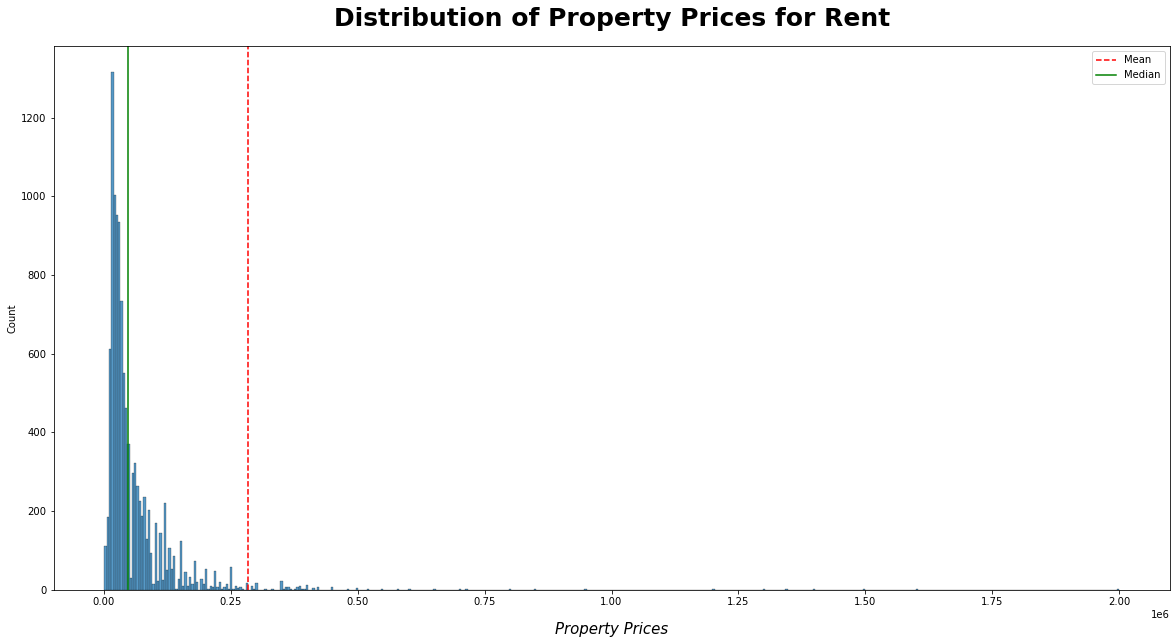

In [51]:
#  visualizing the price distribution to locate outliers
rent_price = pithy_ncr_prop4rent.price
rent_price_statistic = rent_price.describe()
rent_price_mean = rent_price_statistic.mean()
rent_price_median = rent_price_statistic.median()

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.histplot(x=rent_price)

ax.set_xlabel('Property Prices', size=15, labelpad=15, style='italic')
ax.set_title('Distribution of Property Prices for Rent', size=25, weight='bold', pad=20)
ax.axvline(x=rent_price_mean, color='r', linestyle='--', label='Mean')
ax.axvline(x=rent_price_median, color='g', linestyle='-', label='Median')
ax.legend()

display(rent_price_statistic)

<p>Data validation time.</p>

In [52]:
unique_prop4rent = get_unique(pithy_ncr_prop4rent)

<p>What we are to do</p>
<ol>
<li>strip the whitespace and transform to lowercase those columns with string values</li>
<li>extract only the city from location column</li>
<ol>
<li>create a new column called city for that</li>
</ol>
<li>bin values in the price column</li>
<ol>
<li>remove the commas from each entry</li>
<li>change data type to float</li>
</ol>
<li>remove outliers from price column too?</li>
<li>rearrange columns</li>
</ol>

In [53]:
#  tranforming to lowercase
pithy_ncr_prop4rent['location'] = pithy_ncr_prop4rent['location'].apply(lambda x: x.lower())

#  stripping whitespace from entries
pithy_ncr_prop4rent['listing'] = pithy_ncr_prop4rent['listing'].apply(lambda x: x.strip())
pithy_ncr_prop4rent['location'] = pithy_ncr_prop4rent['location'].apply(lambda x: x.strip())

pithy_ncr_prop4rent.sample(15)

,listing,location,price,bedroom_num,bathroom_num,floor_area,longitude,latitude
1933,Knightsbridge Residences Makati Condo for RENT,"poblacion, makati","30,000.000",1.000,1.000,28.000,121.032,14.566
1455,3 Bedroom Condo Unit For Lease in Salcedo Vill...,"salcedo village, makati","125,000.000",3.000,3.000,180.000,121.021,14.560
2063,Fully Furnished 3 Bedroom Condo for Rent in Pa...,"legazpi village, makati","250,000.000",3.000,2.000,175.000,121.018,14.555
5926,"The Verve Residences BGC, 97 sqm, 2 bedroom, f...","fort bonifacio, taguig","105,000.000",2.000,3.000,97.000,121.051,14.548
6680,1 Bedroom Fully Furnished Condo For Rent in Th...,"fort bonifacio, taguig","75,000.000",1.000,1.000,67.000,121.050,14.541
77,2 Bedrooms Apartment for Lease at Robinson Cir...,"oranbo, pasig","22,000.000",2.000,2.000,76.000,121.064,14.576
6763,Fully Furnished 2BR Condo Unit for Rent at Upt...,"fort bonifacio, taguig","85,000.000",2.000,2.000,93.000,121.050,14.541
3281,The Proscenium Lincoln Fully Furnished Studio ...,"guadalupe viejo, makati","30,000.000",1.000,1.000,32.000,121.041,14.564
2437,Beautifully Furnished Large 1 Bedroom Unit,"san lorenzo, makati","90,000.000",1.000,1.000,75.000,121.019,14.551
10194,studio unit condominium for rent in avida vita...,"bagong pag-asa, quezon city","25,000.000",1.000,1.000,22.000,121.038,14.650


In [54]:
#  extracting the only the city from the location column
pithy_ncr_prop4rent['city'] = pithy_ncr_prop4rent['location'].apply(classify_location)

pithy_ncr_prop4rent.sample(15)

,listing,location,price,bedroom_num,bathroom_num,floor_area,longitude,latitude,city
1518,"1BR Condo for Rent in Joya Lofts and Towers, R...","rockwell, makati","60,000.000",1.000,1.000,66.000,121.036,14.563,makati
7774,1 Bedroom Unit with 1 Parking Slot For Rent in...,"fort bonifacio, taguig","30,000.000",1.000,1.000,49.000,121.047,14.543,taguig
7437,1 Bedroom Unit at One Serendra For Lease in Ta...,"fort bonifacio, taguig","80,000.000",1.000,1.000,78.000,121.050,14.541,taguig
8552,Affordable Studio Condo Unit at Ortigas,"ortigas cbd, pasig","13,500.000",1.000,1.000,22.000,121.061,14.588,pasig
6195,Condo 150sqm Furnished 3 BR Unit For Rent in B...,"fort bonifacio, taguig","180,000.000",3.000,2.000,150.000,121.050,14.541,taguig
898,"7 Storey Dorm building For Lease in Palanan, M...","palanan, makati","1,400,000.000",53.000,54.000,"1,905.000",121.003,14.560,makati
3408,Joya lofts and towers Rockwell Makati studio f...,"rockwell, makati","25,000.000",1.000,1.000,25.000,121.028,14.557,makati
6714,Fully furnished 1 Bedroom Unit in BGC (in fron...,"fort bonifacio, taguig","35,000.000",1.000,1.000,36.000,121.050,14.541,taguig
3631,semi - furnish unit (1 bedroom) in The Columns...,"bel-air, makati","30,000.000",1.000,1.000,54.000,121.026,14.564,makati
2808,For Rent Fully Furnished 1 Bedroom Unit at The...,"legazpi village, makati","60,000.000",1.000,1.000,63.000,121.018,14.555,makati


In [55]:
#  filtering out outliers
clean_ncr_prop4rent = remove_outlier(pithy_ncr_prop4rent)
clean_ncr_prop4rent

C:\Users\Admin\AppData\Local\Temp\ipykernel_28656\234227123.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outlier = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]


,listing,location,price,bedroom_num,bathroom_num,floor_area,longitude,latitude,city
0,1-BR Apartment Unit (45 sqm) 1 T&B with Pantry...,"sampaloc, manila","10,000.000",1.000,1.000,45.000,120.996,14.611,manila
1,Studio Condo for Rent in Vista GL Taft Located...,"ermita, manila","18,000.000",1.000,1.000,21.000,120.983,14.586,manila
2,80 sqm Room for Rent in Manila - FMRR Realty &...,manila,"45,000.000",1.000,1.000,80.000,121.056,14.596,manila
3,For Rent 2-Bedroom Apartment near UST in Sampa...,"sampaloc, manila","12,500.000",2.000,1.000,40.000,120.996,14.611,manila
4,1 Bedroom Apartment unit for rent at San Andre...,"malate, manila","8,500.000",1.000,1.000,18.000,120.992,14.570,manila
...,...,...,...,...,...,...,...,...,...
8971,FGA - For Lease: 1 Bedroom Unit in Magnolia Re...,"new manila, quezon city","35,000.000",1.000,1.000,36.000,121.039,14.614,quezon
8972,Studio type semi furnished 13k in Brgy. Damaya...,"damayang lagi, quezon city","13,000.000",1.000,1.000,28.000,121.023,14.616,quezon
8973,38 sqm Studio Unit For Rent in Eastwood Parkvi...,"bagumbayan, quezon city","20,000.000",1.000,1.000,38.000,121.082,14.605,quezon
8974,1BR Fully Furnished Condo Unit at The Magnolia...,"new manila, quezon city","33,000.000",1.000,1.000,36.000,121.031,14.616,quezon


In [56]:
clean_ncr_prop4rent.price.describe()

count     8,976.000
mean     44,460.532
std      31,112.771
min         780.000
25%      22,000.000
50%      35,000.000
75%      60,000.000
max     145,000.000
Name: price, dtype: float64

<h2>Exploratory Data Analysis</h2>

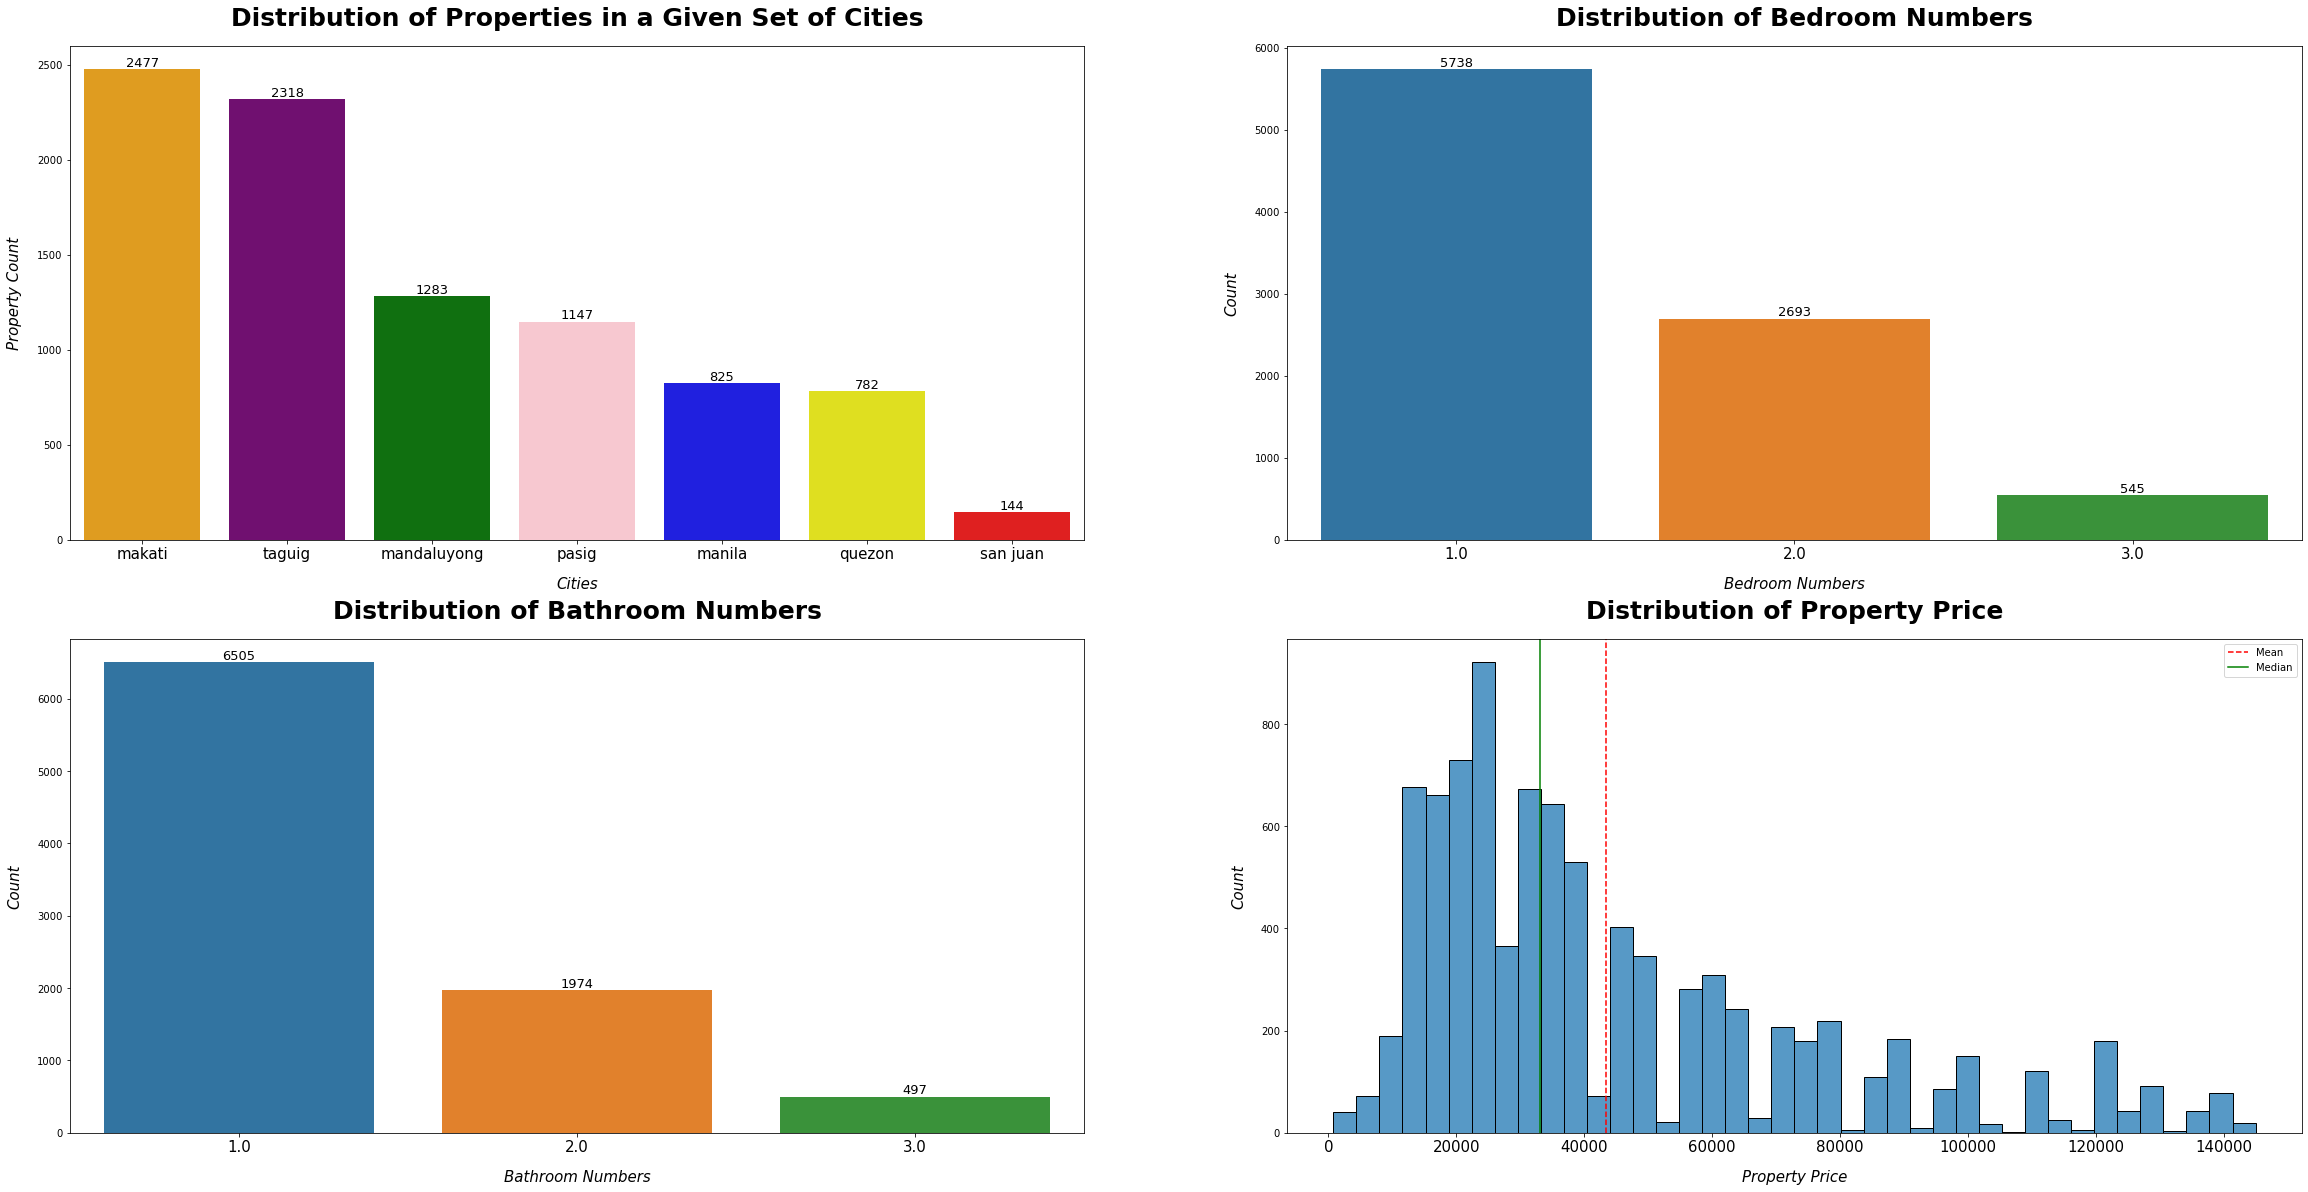

In [57]:
eda_gen_visualization_properties(clean_ncr_prop4rent)

Summary Statistics for San juan


count       144.000
mean     46,473.604
std      30,363.377
min       9,000.000
25%      25,000.000
50%      38,000.000
75%      55,000.000
max     145,000.000
Name: price, dtype: float64

Summary Statistics for Manila


count       825.000
mean     23,120.441
std      15,300.875
min         780.000
25%      15,000.000
50%      18,000.000
75%      25,000.000
max     130,000.000
Name: price, dtype: float64

Summary Statistics for Quezon


count       782.000
mean     25,377.262
std      14,509.799
min         800.000
25%      16,000.000
50%      21,000.000
75%      30,000.000
max     120,000.000
Name: price, dtype: float64

Summary Statistics for Mandaluyong


count     1,283.000
mean     30,043.295
std      21,114.467
min       2,300.000
25%      18,000.000
50%      25,000.000
75%      35,000.000
max     145,000.000
Name: price, dtype: float64

Summary Statistics for Pasig


count     1,147.000
mean     37,072.297
std      23,615.184
min       2,500.000
25%      20,000.000
50%      30,000.000
75%      45,000.000
max     140,000.000
Name: price, dtype: float64

Summary Statistics for Makati


count     2,477.000
mean     53,338.933
std      33,820.996
min       2,000.000
25%      27,000.000
50%      42,000.000
75%      75,000.000
max     145,000.000
Name: price, dtype: float64

Summary Statistics for Taguig


count     2,318.000
mean     60,516.886
std      32,000.079
min       1,300.000
25%      35,000.000
50%      55,000.000
75%      80,000.000
max     145,000.000
Name: price, dtype: float64

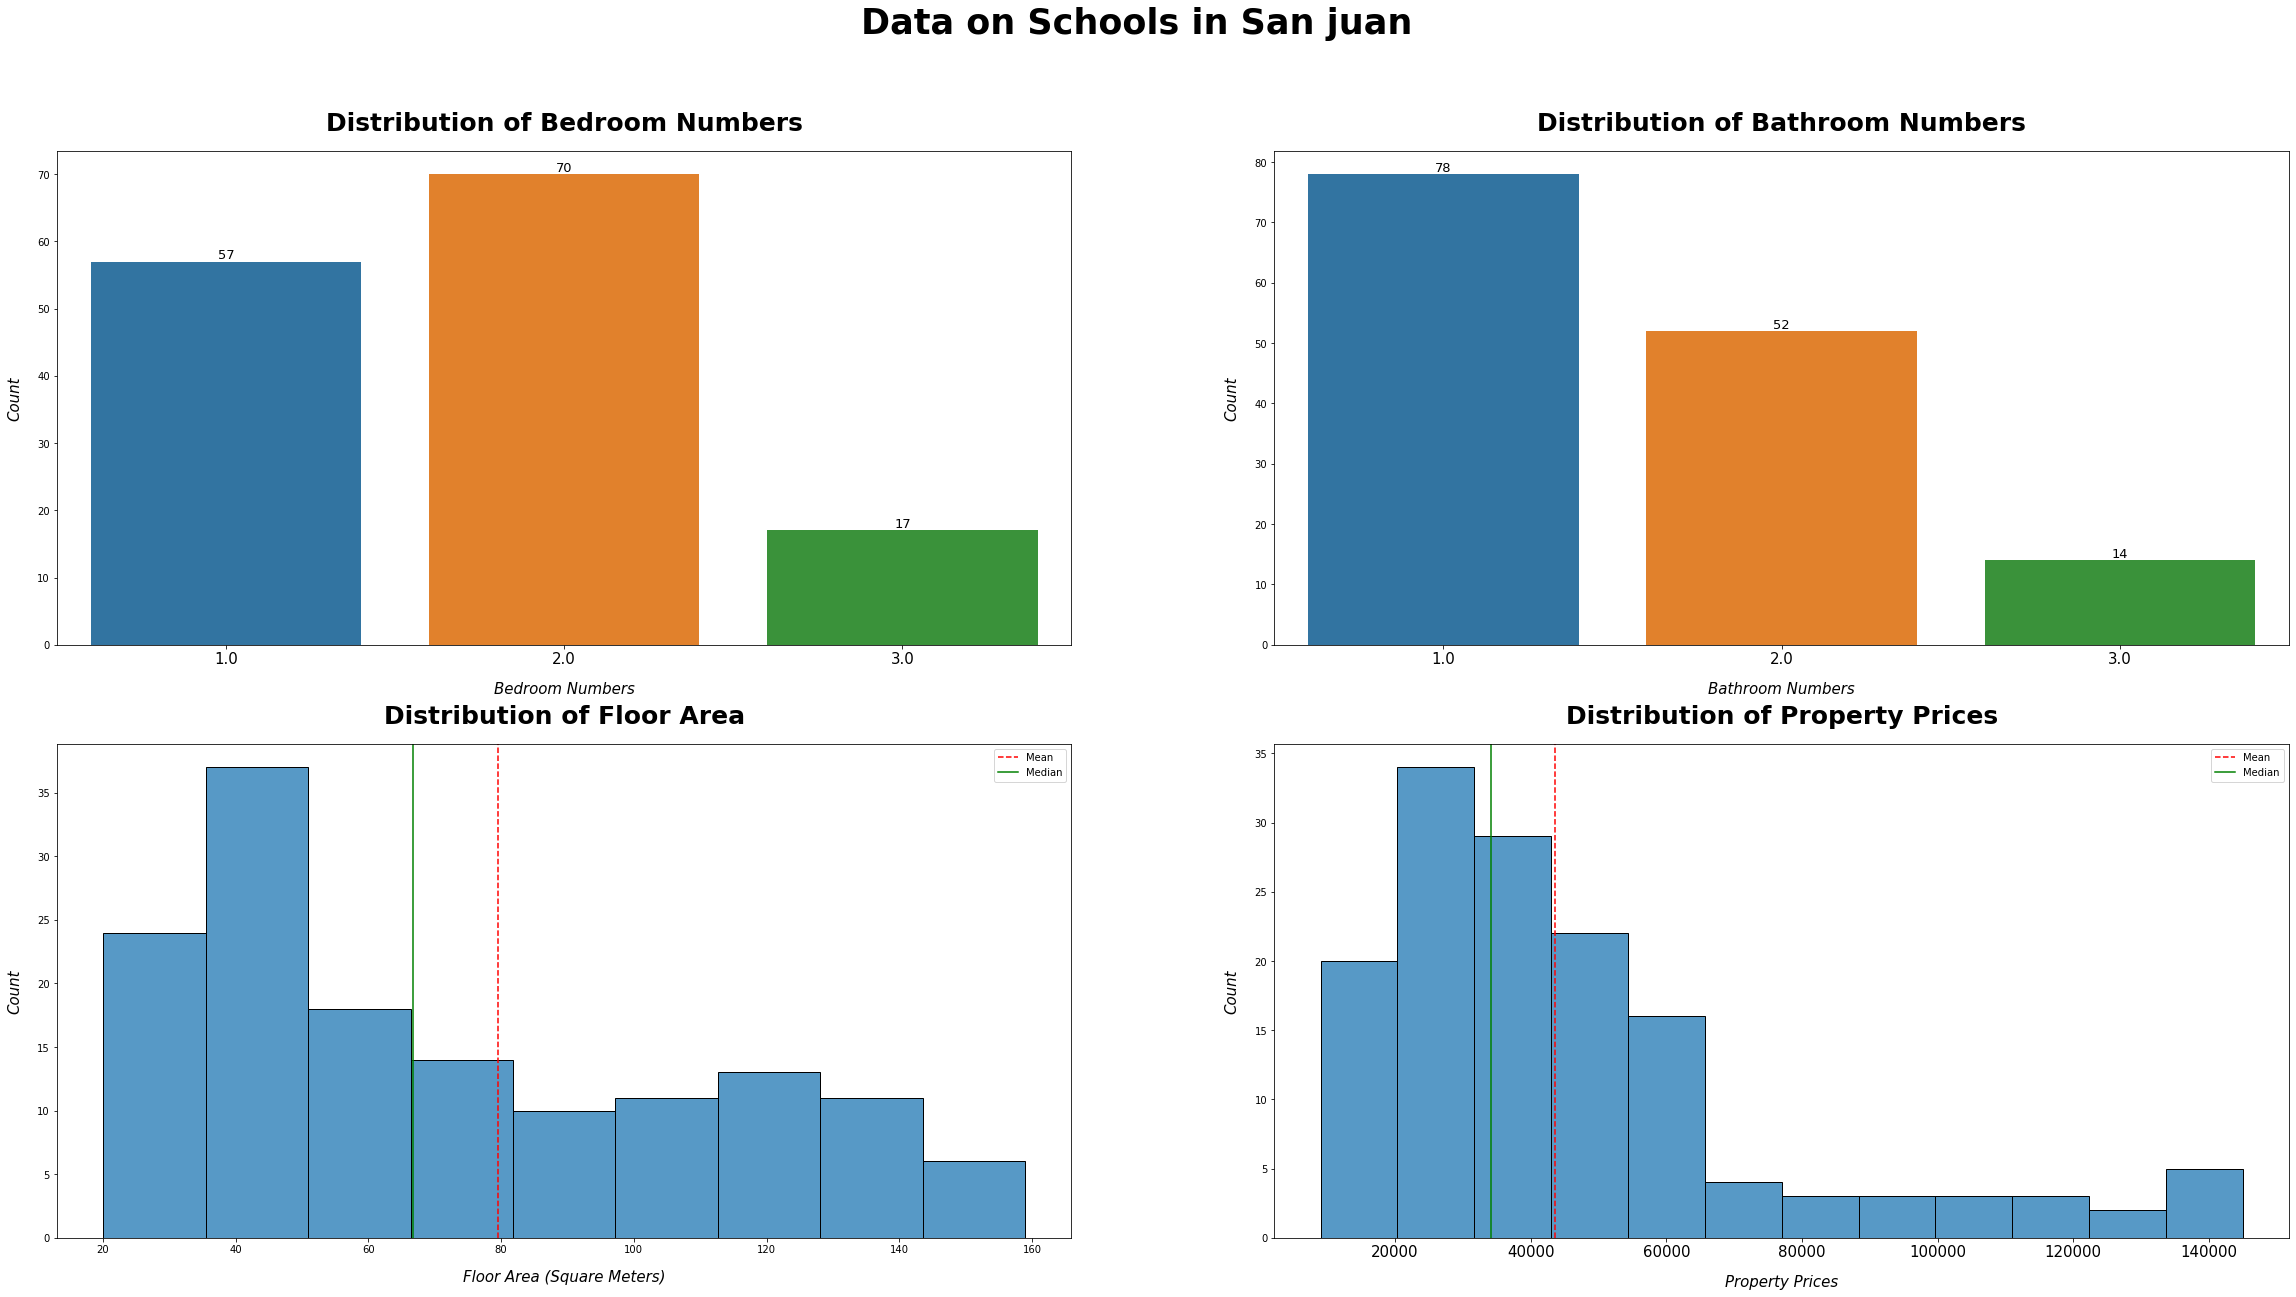

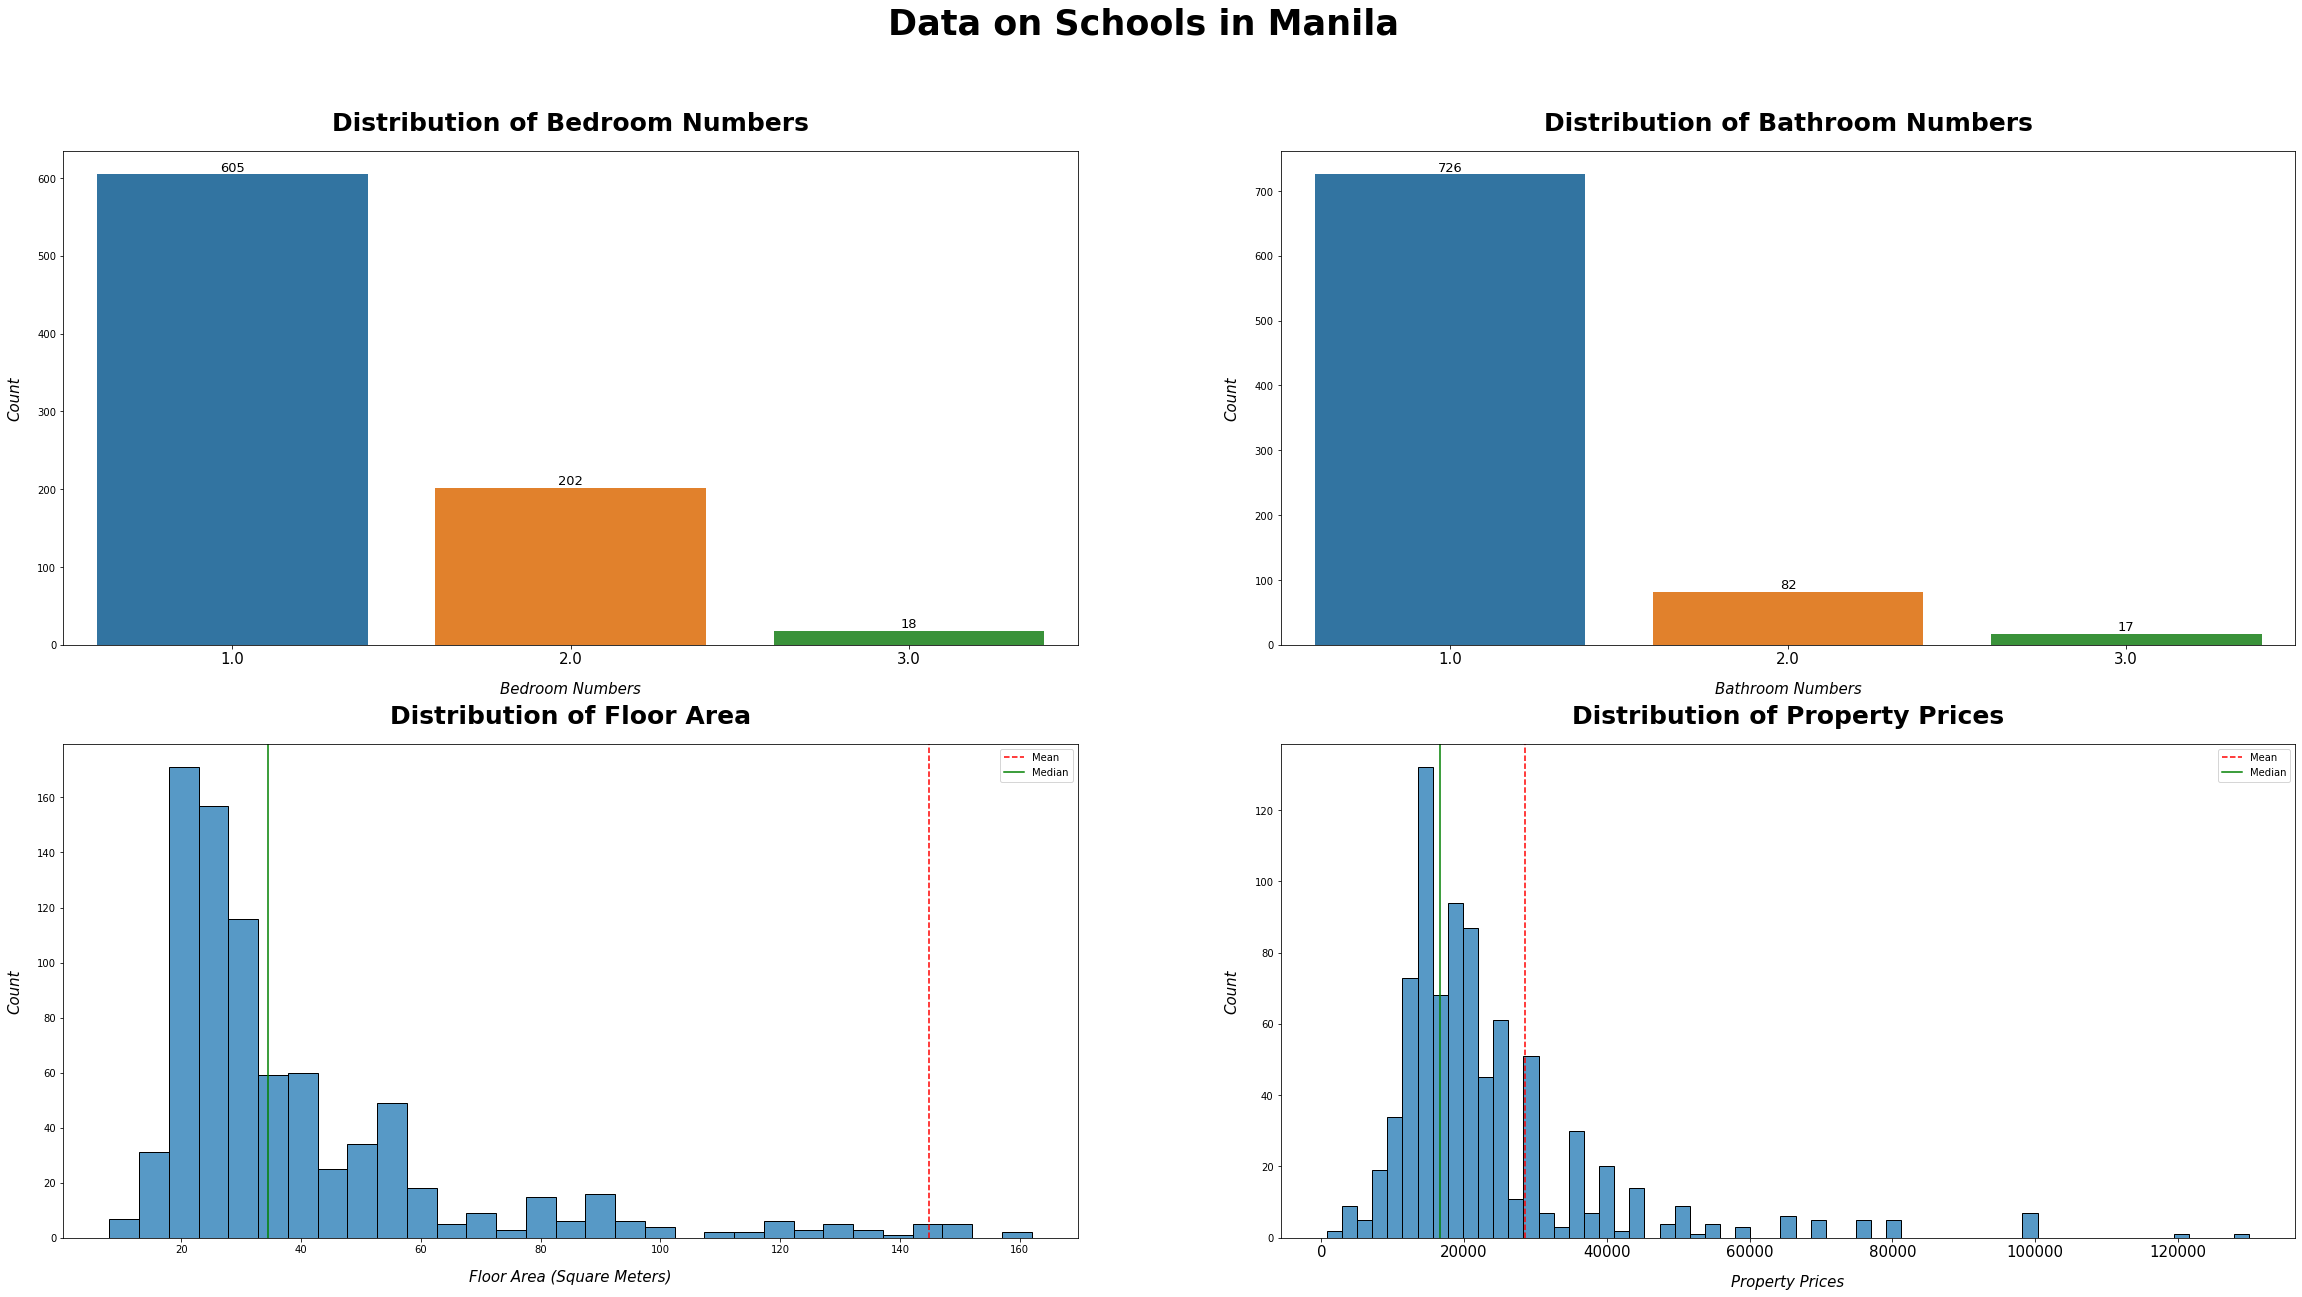

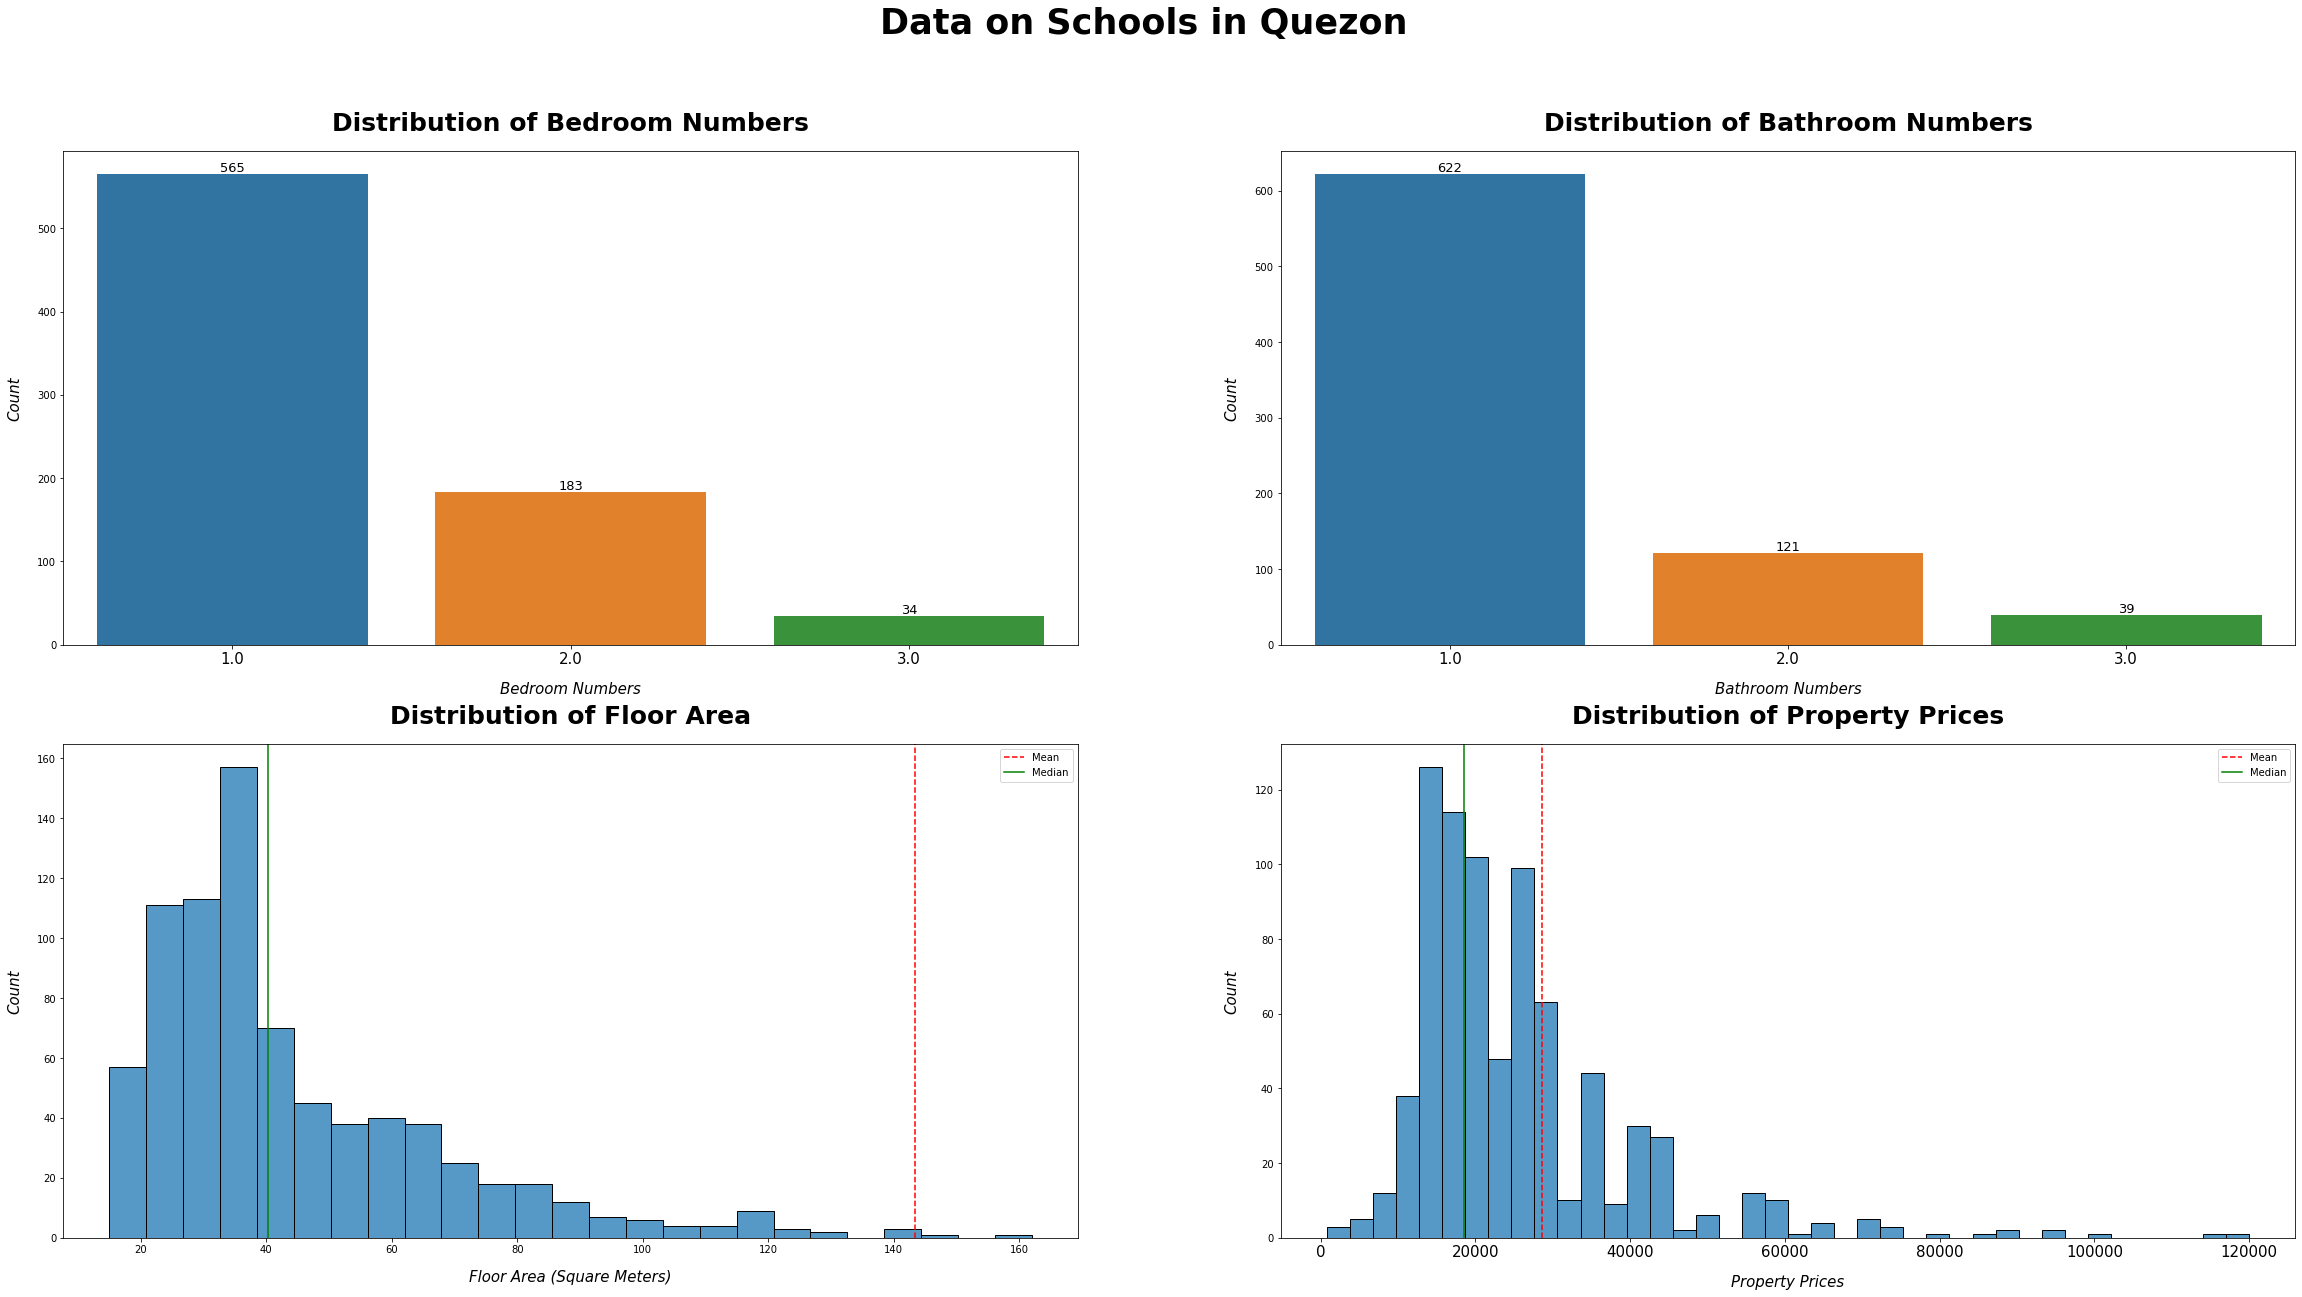

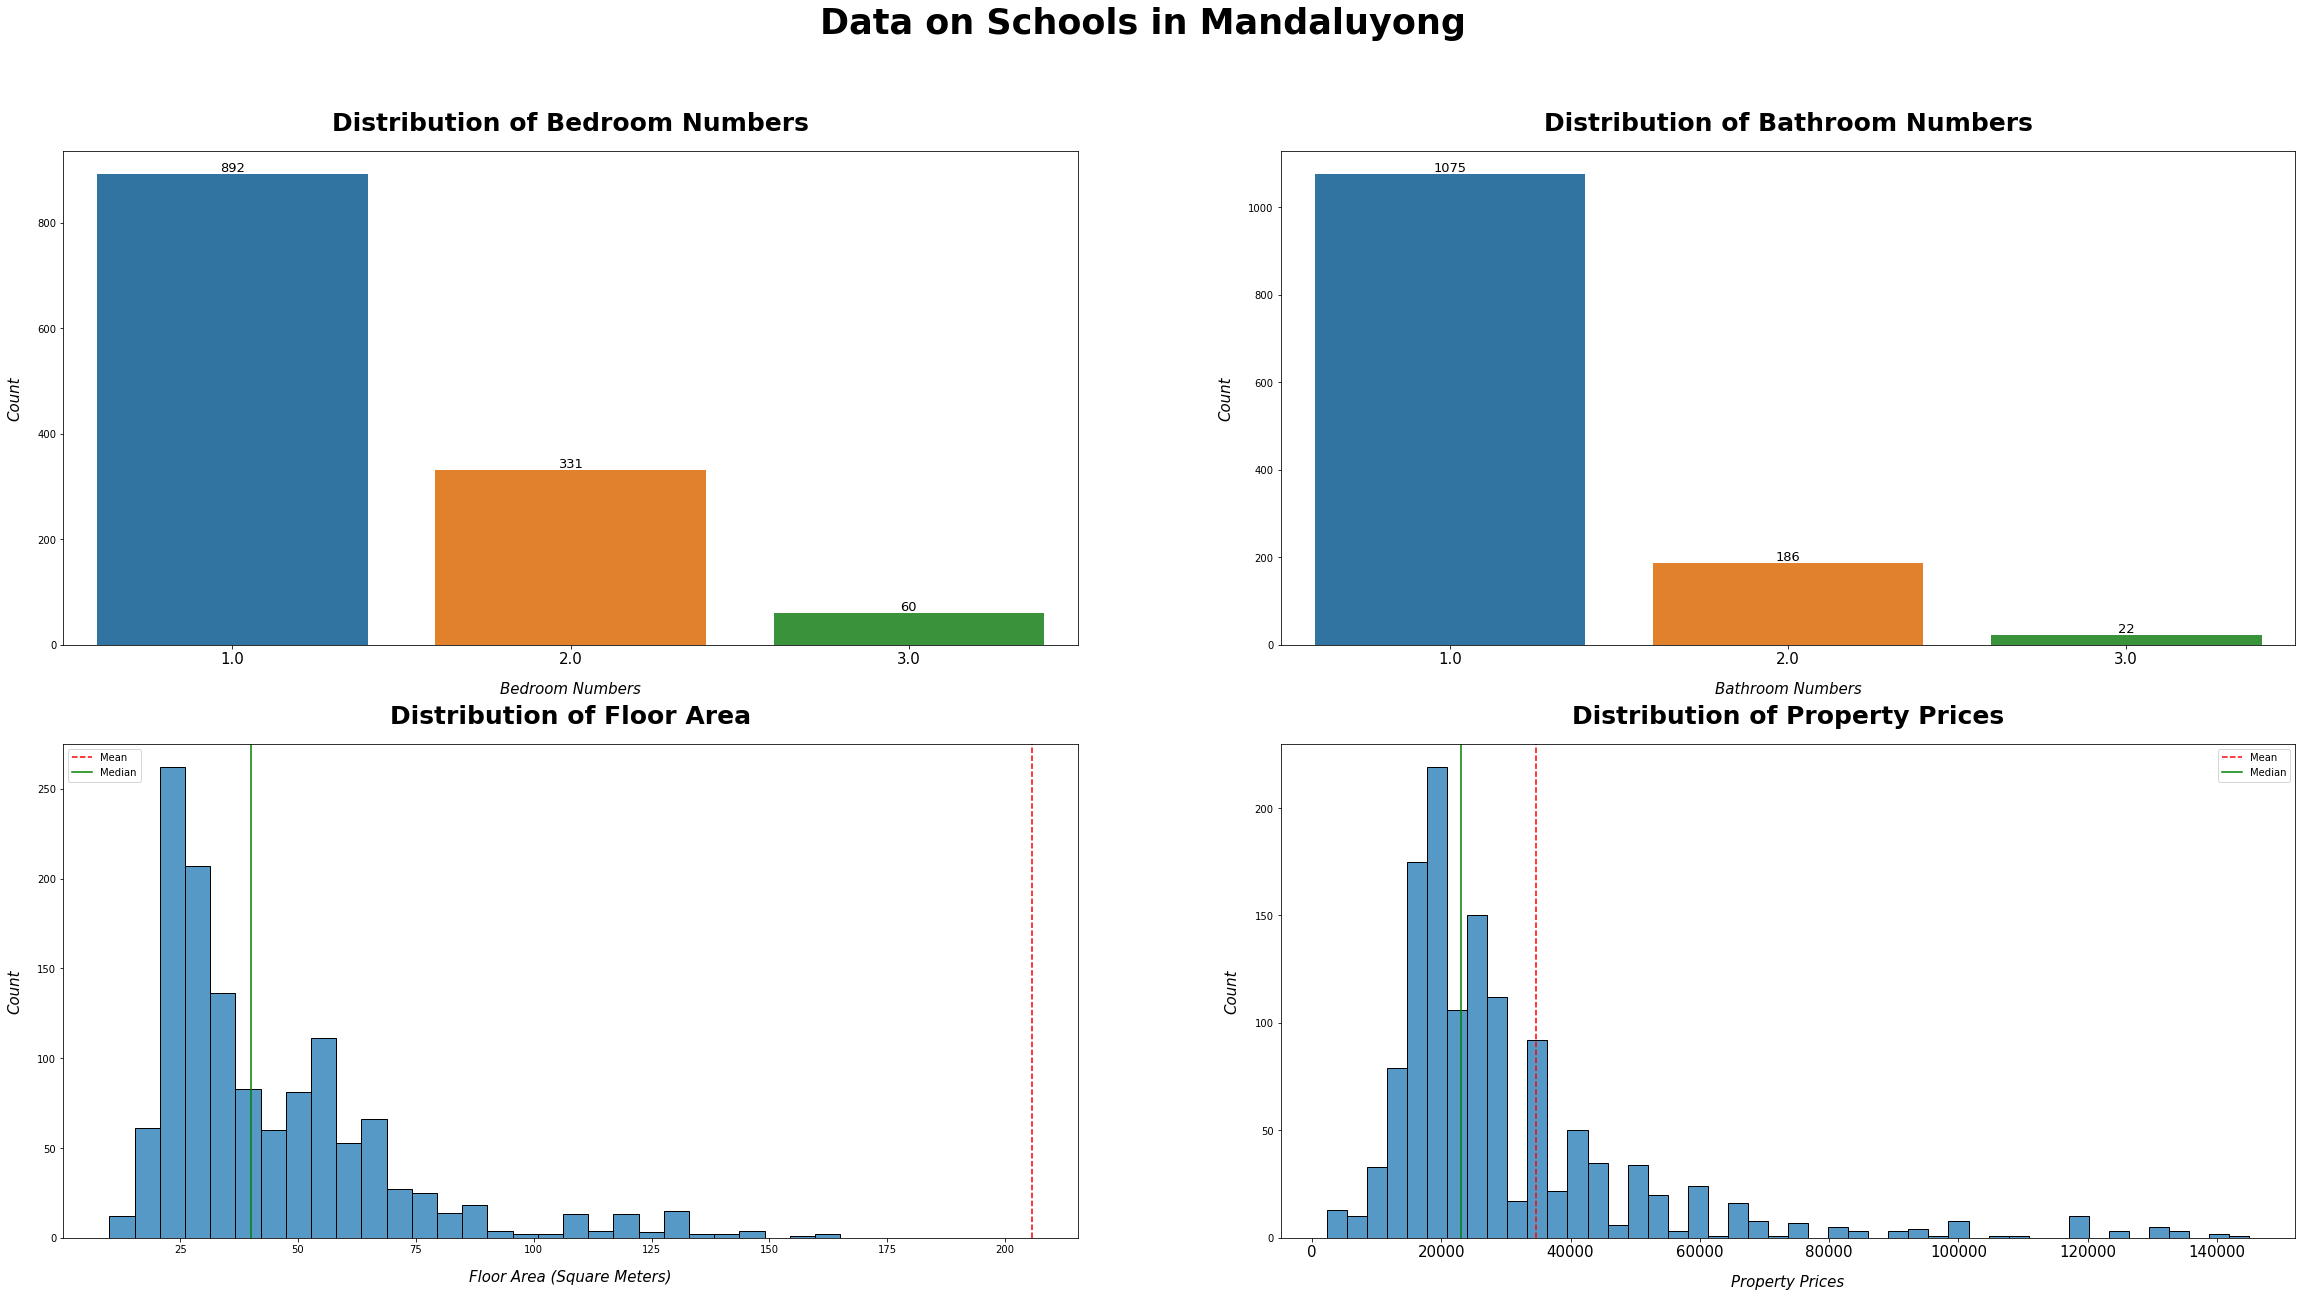

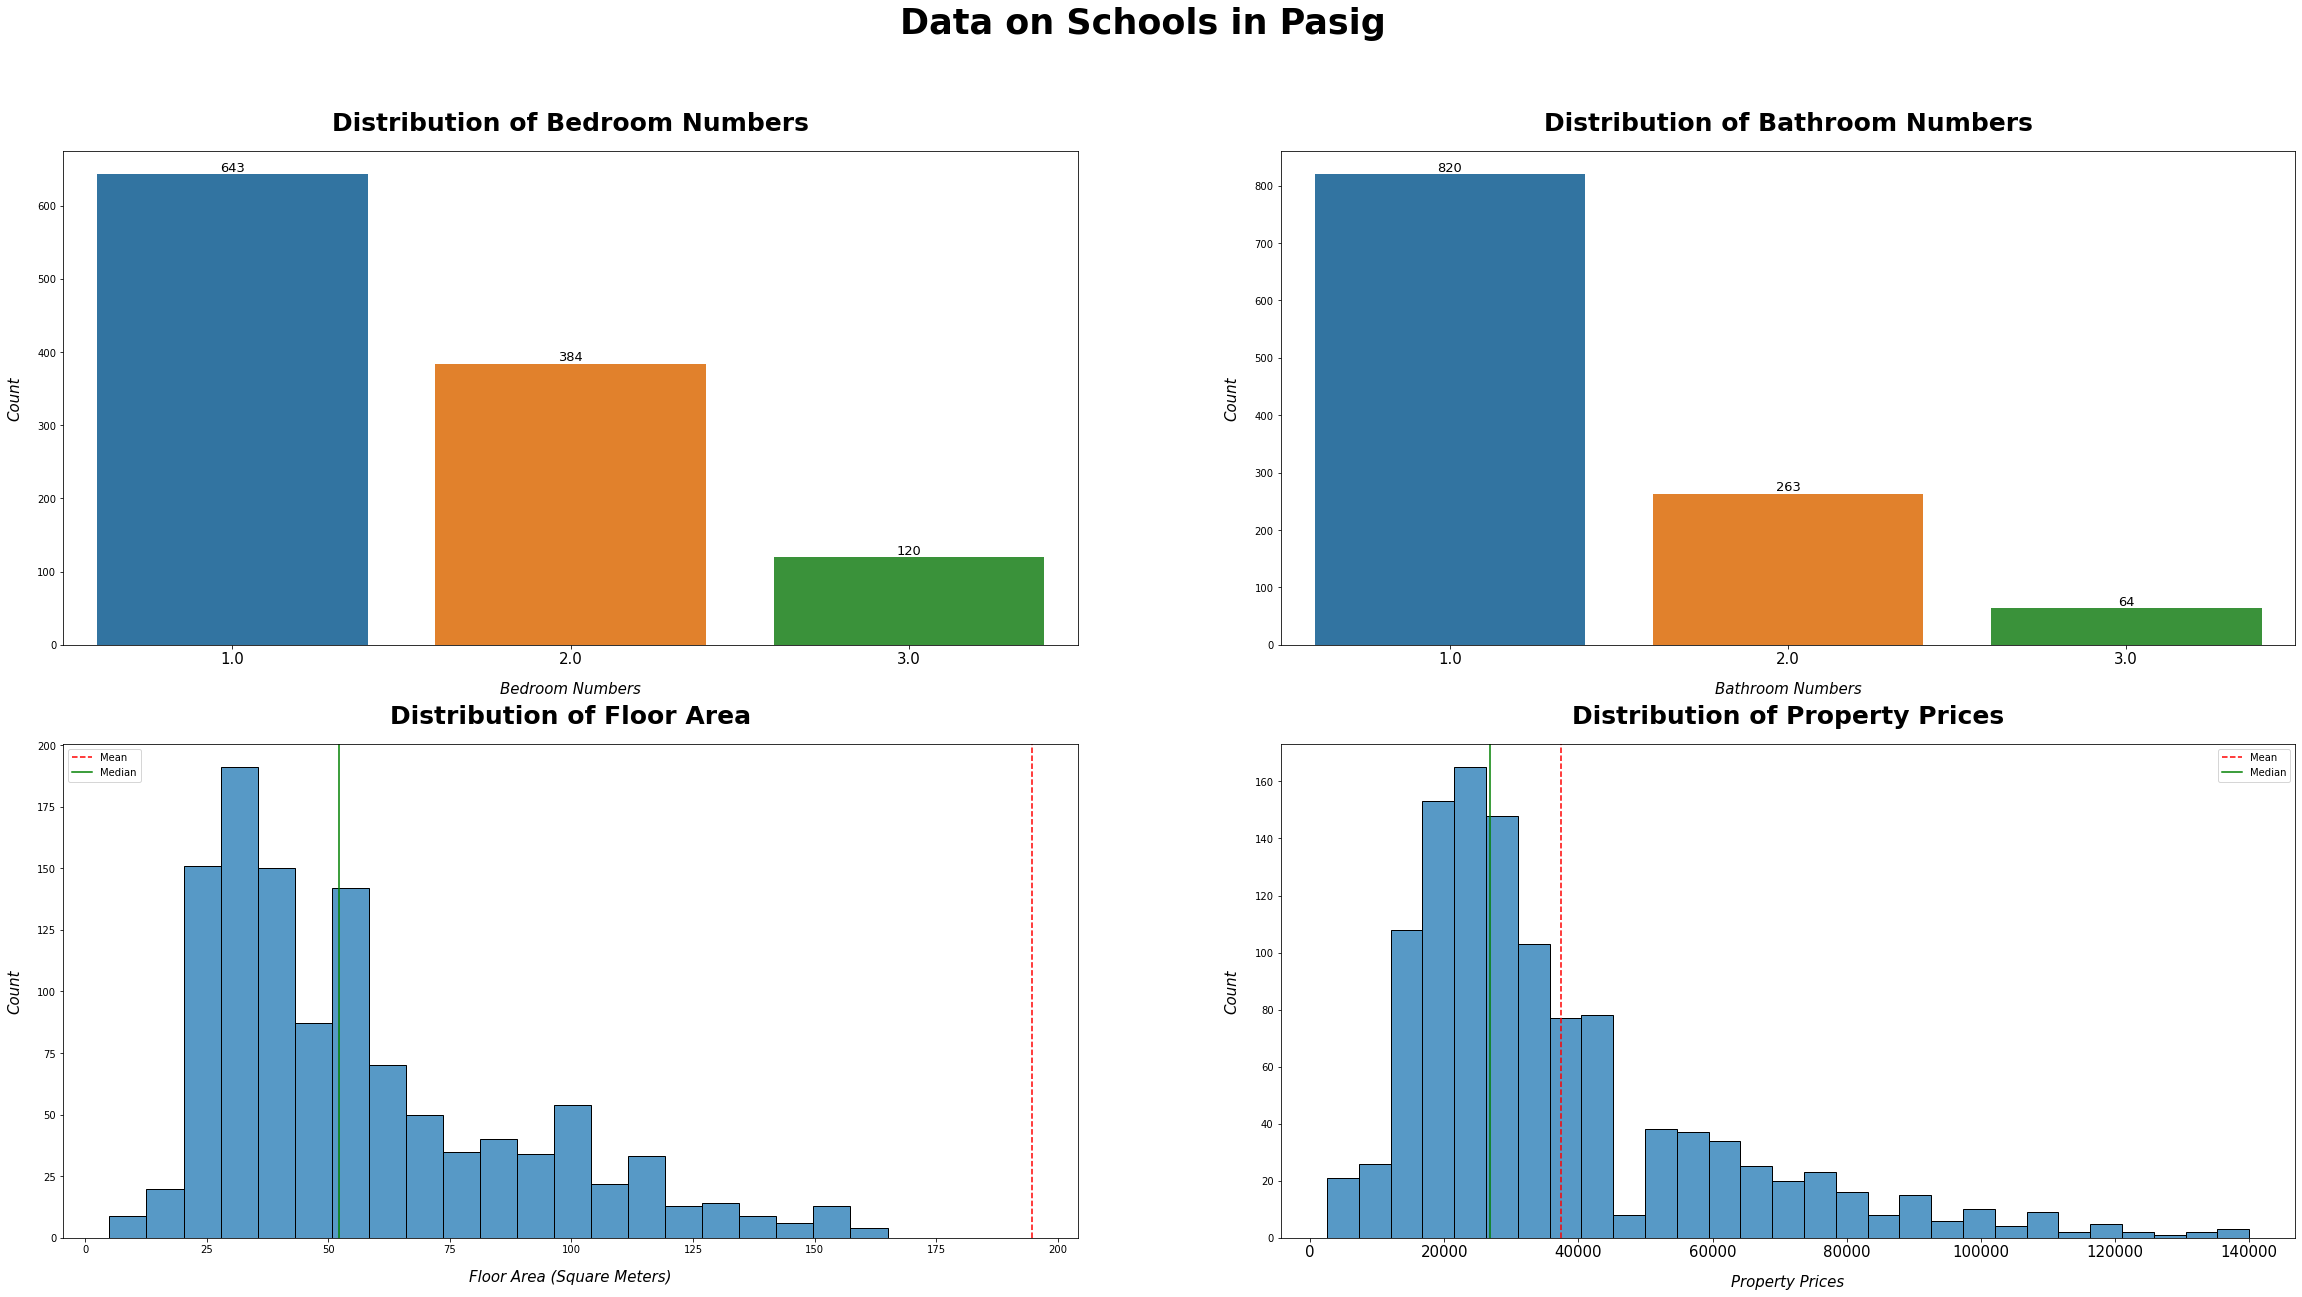

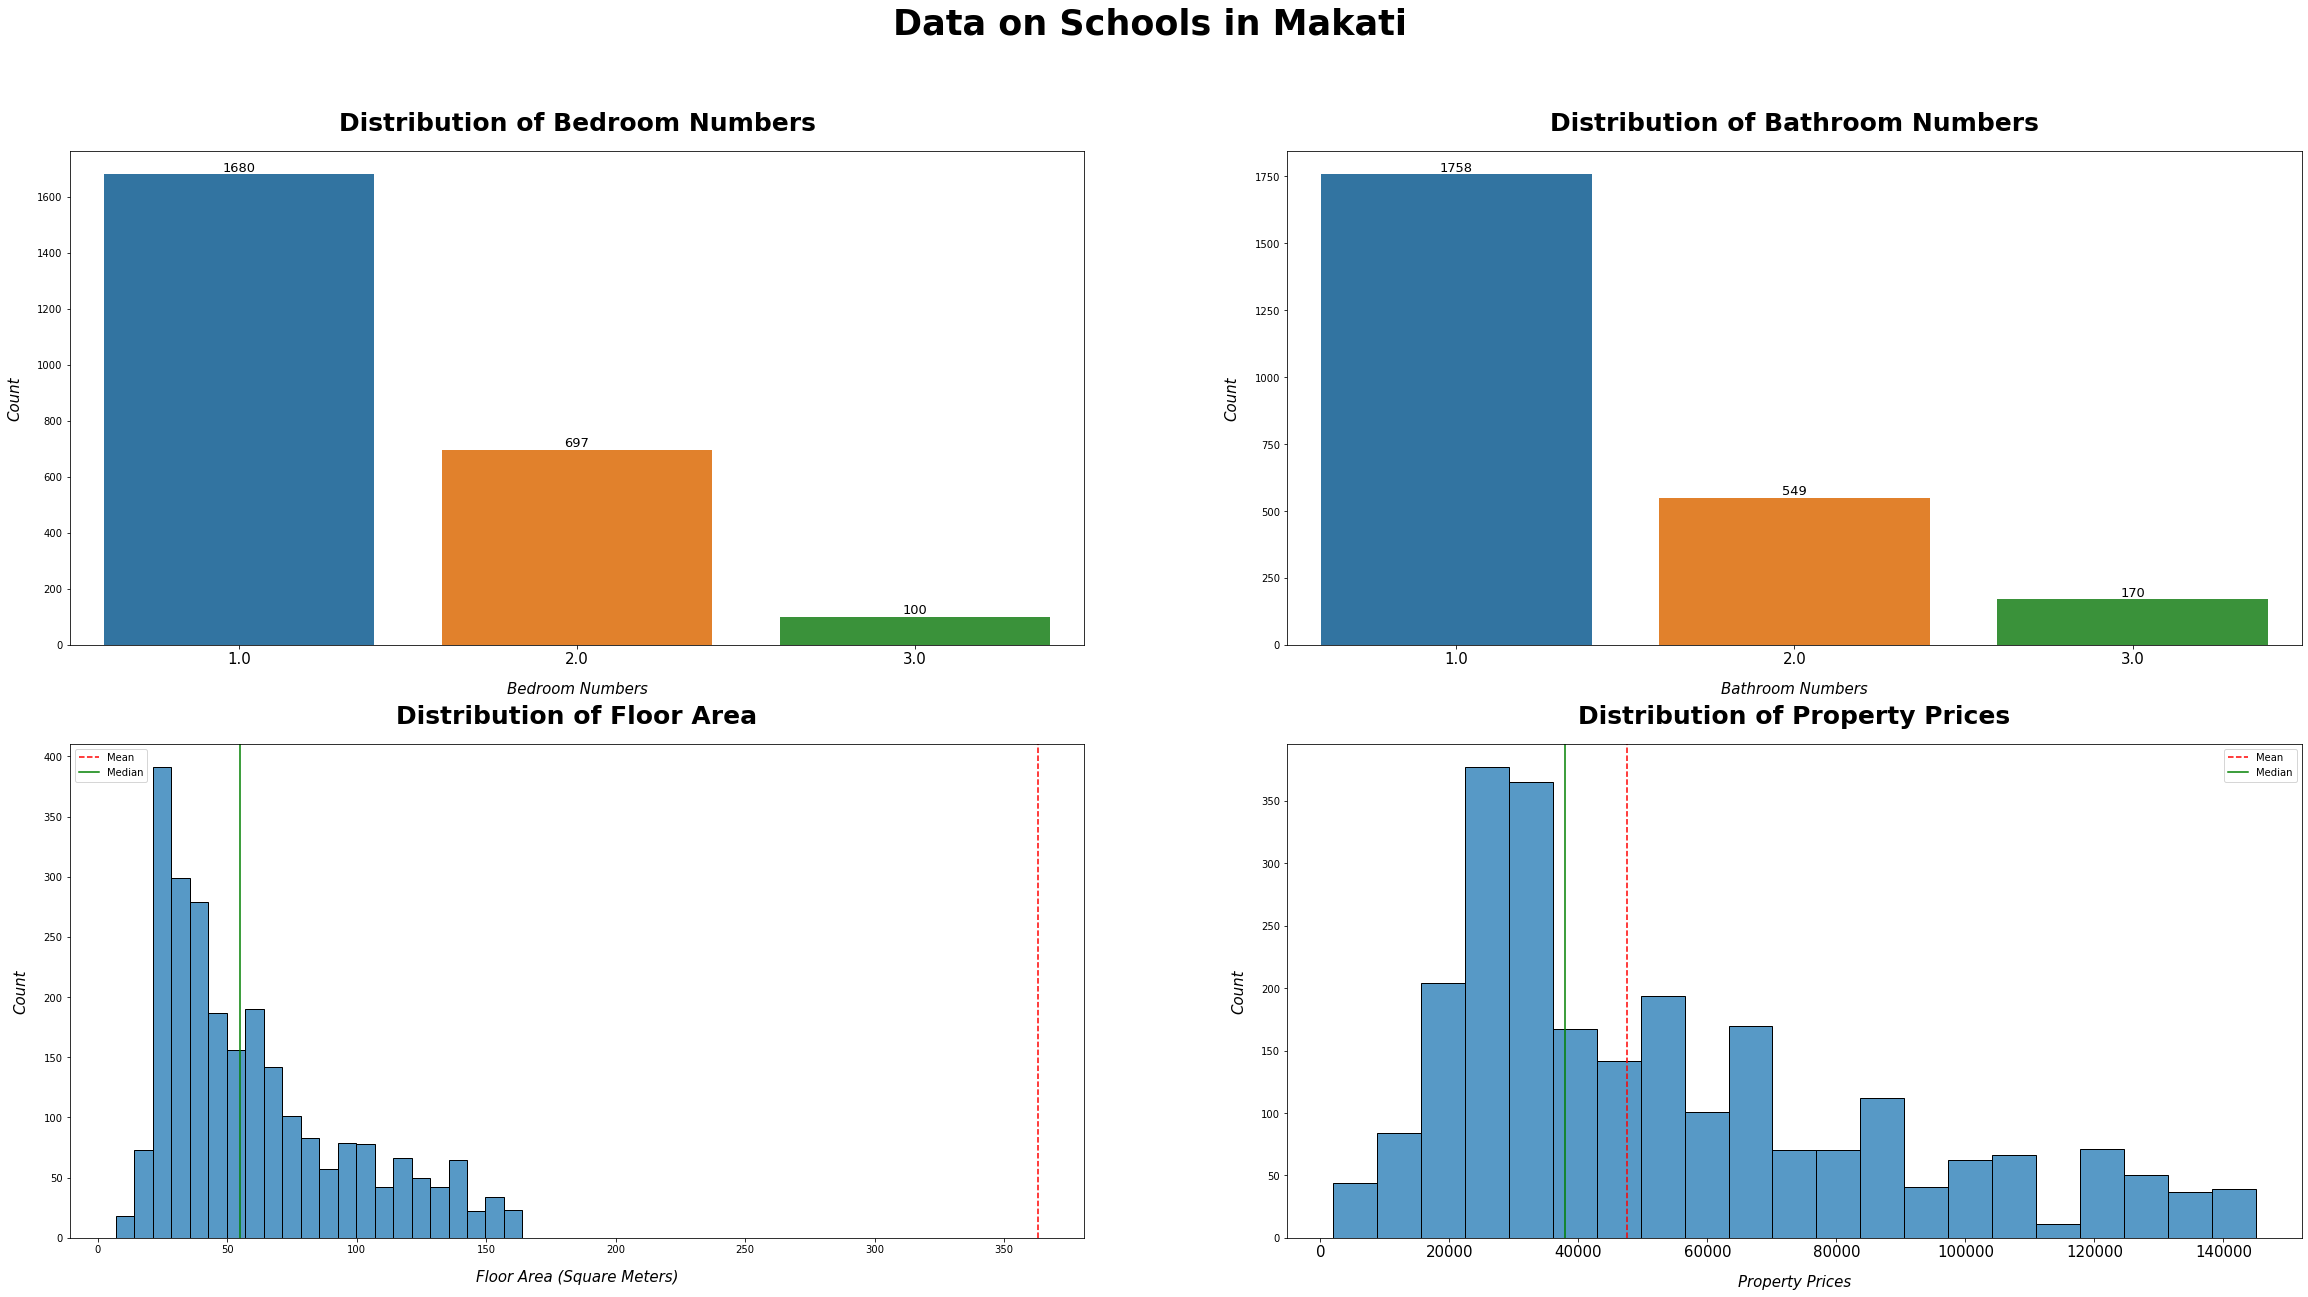

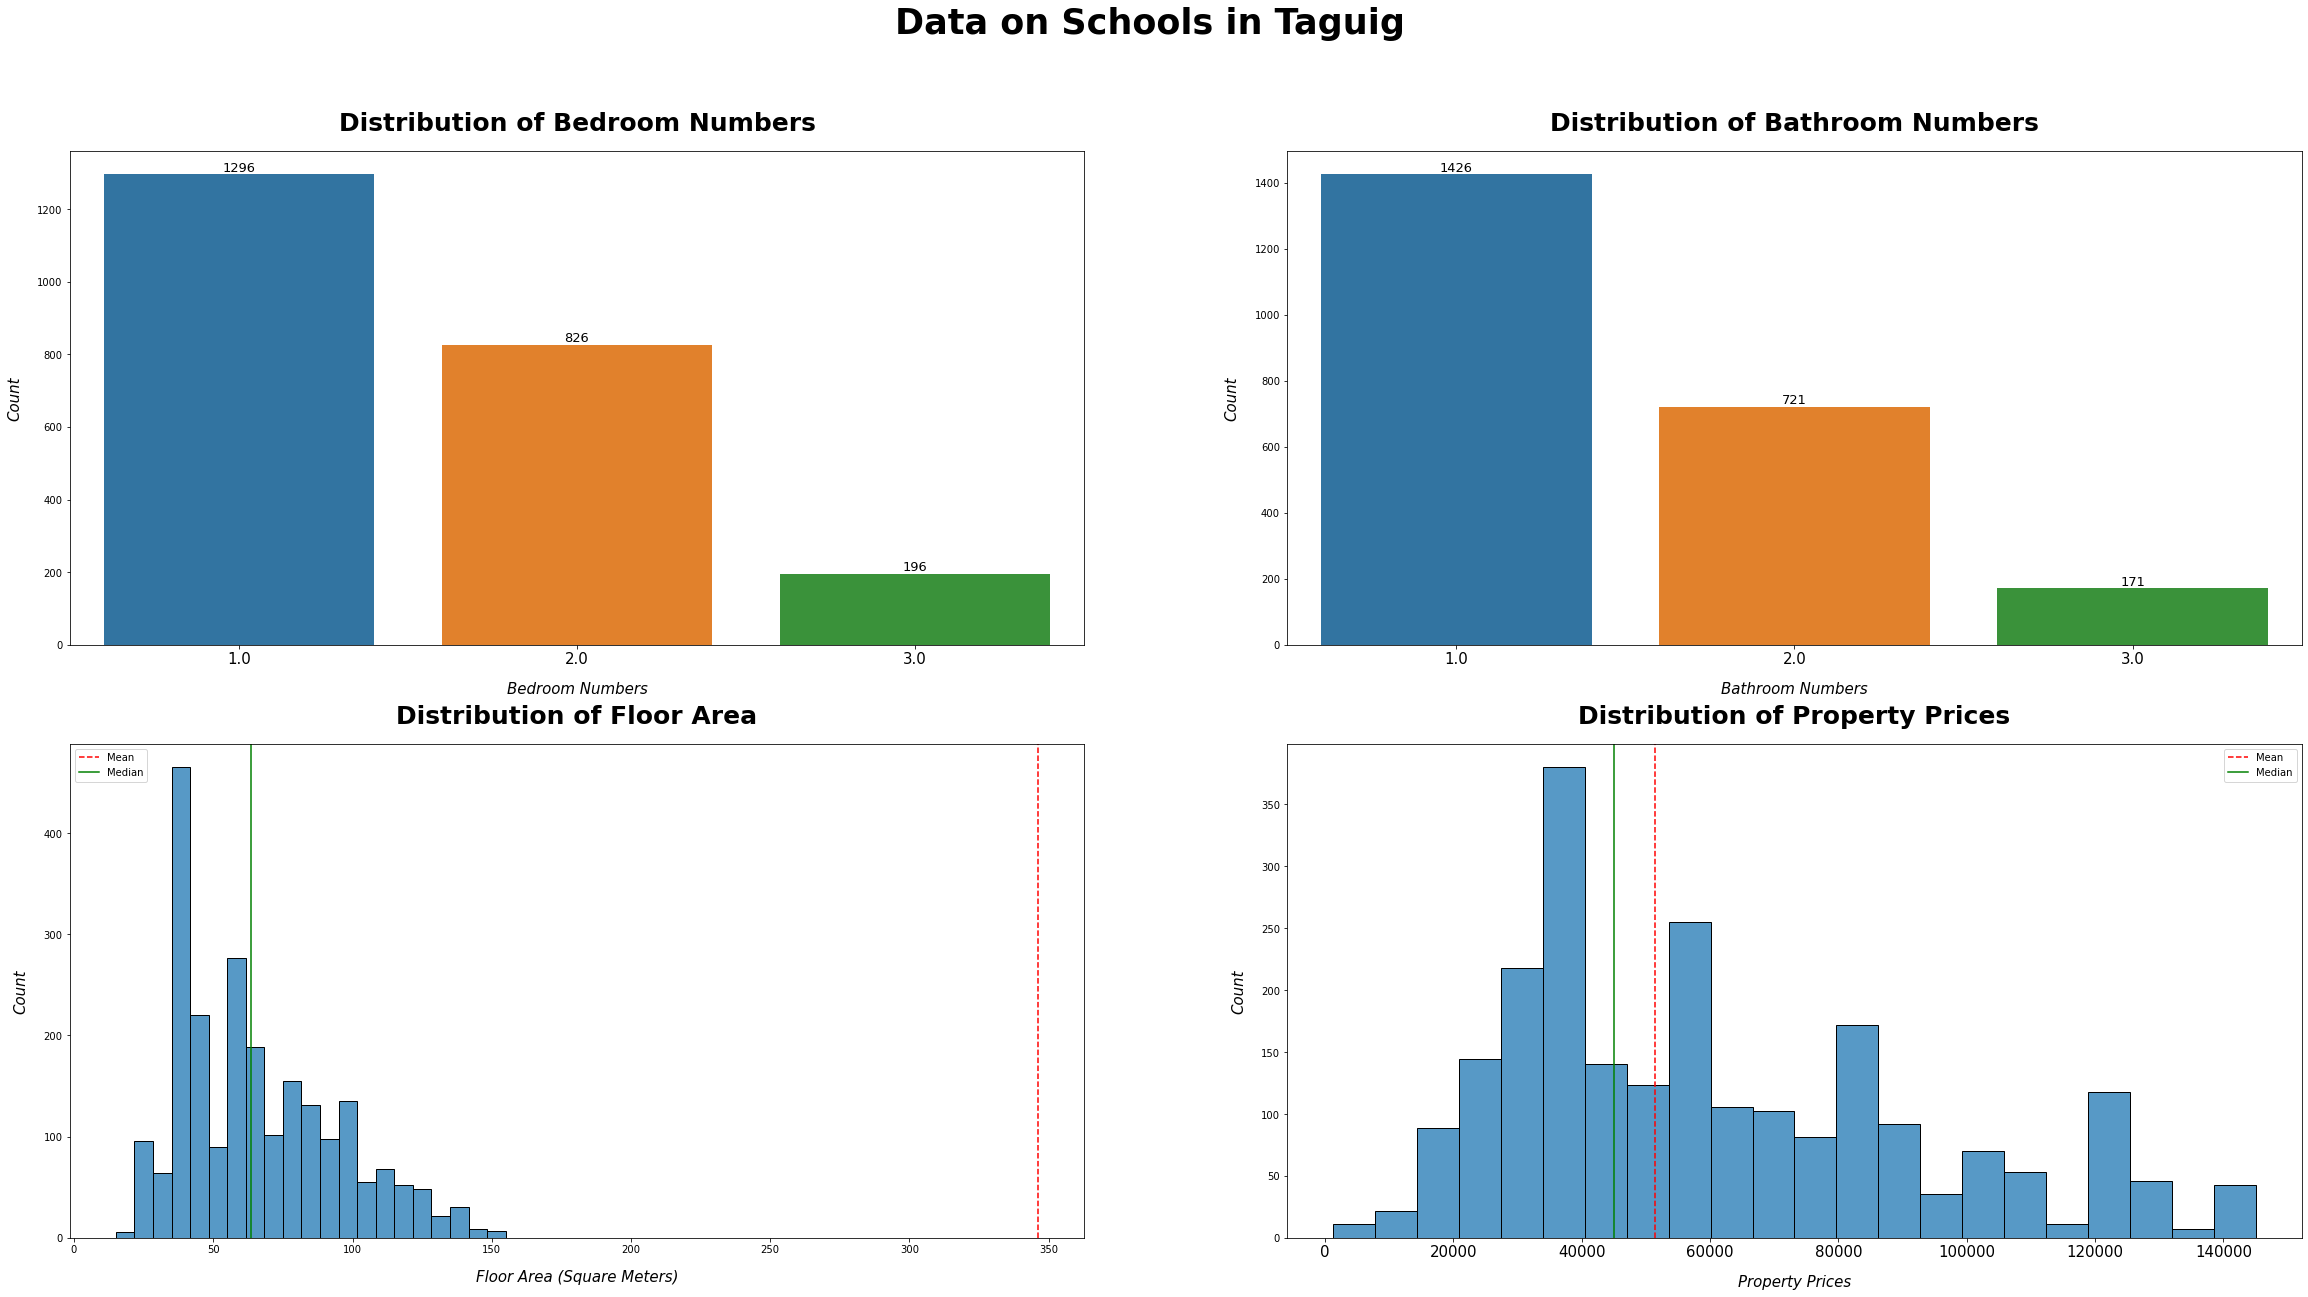

In [58]:
for city in cities:
    eda_spec_visualization_properties(clean_ncr_prop4rent, city)

In [59]:
#  saving clean dataset to csv
clean_ncr_prop4rent.to_csv('data/clean/clean_ncr_prop4rent.csv')

<h1>NCR Jobs Dataset</h1>

In [60]:
#  reading in csv to pandas dataframe
#  for NCR job list data
ncr_jobs = pd.read_csv('data/jobs/ncr_jobs.csv')
ncr_jobs = ncr_jobs.drop(columns=['Unnamed: 0'])

ncr_jobs.head()

,listing,location,salary,company
0,Phone Banker/ Call Center Agent,Makati,"PHP 20,000 - PHP 25,000 a month",Eastwest Bank
1,Healthcare Customer Support Intern,Makati,"PHP 5,000 - PHP 10,000 a month",Katalyst.ph
2,TESTER,Makati,"PHP 18,000 - PHP 22,000 a month",Döhle Shipmanagement Philippines Corporation
3,Legal Officer,Makati,"PHP 50,000 - PHP 107,444 a month",LICA Group of Companies
4,Business Development Officer,Makati,"PHP 23,000 - PHP 30,500 a month",Eastwest Bank


In [61]:
ncr_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   listing   5497 non-null   object
 1   location  5497 non-null   object
 2   salary    4801 non-null   object
 3   company   5497 non-null   object
dtypes: object(4)
memory usage: 171.9+ KB


<p>These are all relevant columns.</p>
<p>However, we have to fix the salary column so that it would be readable as a numerical column.</p>
<p>Since it gave us a range, we will have to get it's average instead.</p>
<p>Much of the cleaning will revolve around fixing the salary column.</p>  

<AxesSubplot:>

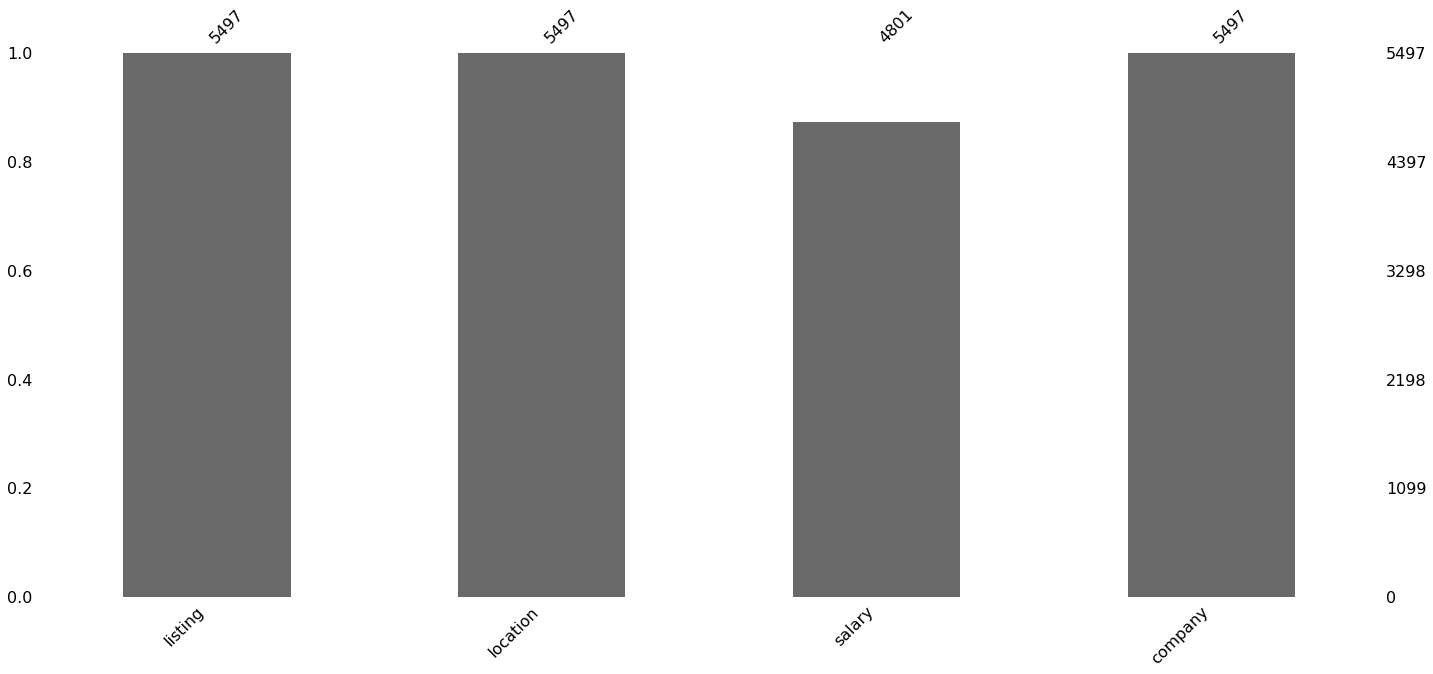

In [62]:
msno.bar(ncr_jobs)

<AxesSubplot:>

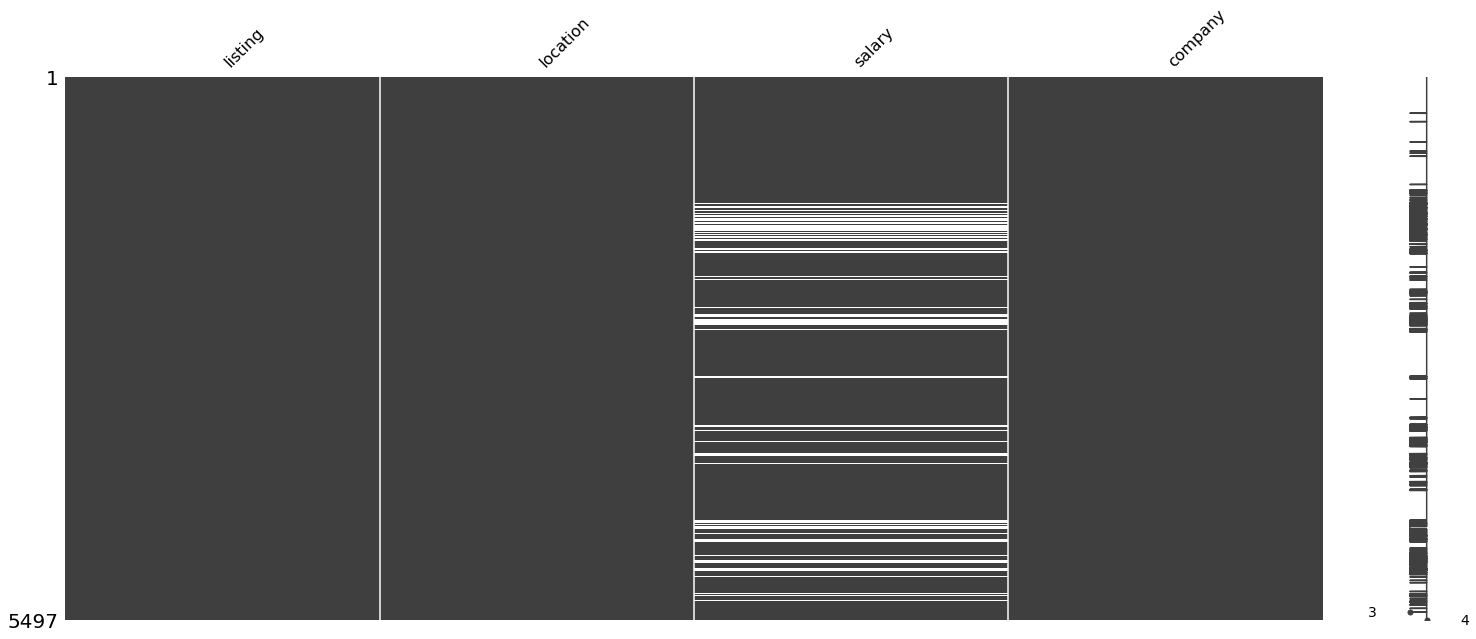

In [63]:
msno.matrix(ncr_jobs)

<p>Only the salary column has missing values.</p>
<p>We will drop entries with null values.<p>

<h2>Data Cleaning</h2>

In [64]:
#  I will drop empty values first
pithy_ncr_jobs = ncr_jobs.dropna(axis=0, how='any', subset=['salary']).reset_index(drop=True)
print(f'The dataset is now reduced to {pithy_ncr_jobs.shape[0]} listings')

The dataset is now reduced to 4801 listings


In [65]:
#  let's check for duplicate values 
jobs_duplicate_count = pithy_ncr_jobs.duplicated(subset=['listing', 'location'], keep='first').sum()
print(f'There are {jobs_duplicate_count} duplicate listings \nThat is roughly {jobs_duplicate_count/pithy_ncr_jobs.shape[0]*100}% of the listings')

There are 3 duplicate listings 
That is roughly 0.06248698187877526% of the listings


In [66]:
#  dropping those duplicates
pithy_ncr_jobs = pithy_ncr_jobs.drop_duplicates(subset=['listing', 'location'], keep='first').reset_index(drop=True)
print(f'The dataset is now reduced to {pithy_ncr_jobs.shape[0]} listings')

The dataset is now reduced to 4798 listings


In [67]:
#  making every columns with string values to lowercase
pithy_ncr_jobs['location'] = pithy_ncr_jobs['location'].apply(lambda x: x.lower()) 

pithy_ncr_jobs

,listing,location,salary,company
0,Phone Banker/ Call Center Agent,makati,"PHP 20,000 - PHP 25,000 a month",Eastwest Bank
1,Healthcare Customer Support Intern,makati,"PHP 5,000 - PHP 10,000 a month",Katalyst.ph
2,TESTER,makati,"PHP 18,000 - PHP 22,000 a month",Döhle Shipmanagement Philippines Corporation
3,Legal Officer,makati,"PHP 50,000 - PHP 107,444 a month",LICA Group of Companies
4,Business Development Officer,makati,"PHP 23,000 - PHP 30,500 a month",Eastwest Bank
...,...,...,...,...
4793,Recruitment Associate | Shared Services (EL 1709),taguig,"PHP 16,000 - PHP 25,000 a month",Accenture
4794,MANDARIN TEACHER-Urgent Hiring,taguig,"PHP 18,000 - PHP 20,000 a month",MindChamps International Preschool
4795,Station Supervisor,taguig,"PHP 18,000 - PHP 20,000 a month","Cleanfuel Autogas Inc.,"
4796,Batching Plant Operator,taguig,"PHP 18,000 - PHP 20,000 a month",Megacem Concrete Inc.


In [68]:
#  we will clean up salary columns 
#  we will first strip it of its commas and periods
pithy_ncr_jobs['salary'] = pithy_ncr_jobs['salary'].apply(lambda x: x.replace(',', ''))

In [69]:
uniq_salary = get_unique(pithy_ncr_jobs)['salary']

<p>Upon inspection of the unique values of the salary column, I have noticed that there are values that are in a yearly and hourly basis.</p>
<p>We will filter those out.</p>

In [70]:
#  filtering out those set in an hourly or yearly basis 
pithy_ncr_jobs = pithy_ncr_jobs[~(pithy_ncr_jobs['salary'].str.contains('hour|year'))].reset_index(drop=True);

#  stripping whitespace as well 
pithy_ncr_jobs['salary'] = pithy_ncr_jobs['salary'].str.strip();

#  removing the words that succeed the actual salaries 
pithy_ncr_jobs['salary'] = pithy_ncr_jobs['salary'].str.replace('(\w* mon[r]?t[h]?$)','');

#  removing PHP 
pithy_ncr_jobs['salary'] = pithy_ncr_jobs['salary'].str.replace('PHP|Php|php|[Pp]|[Hh]','');

C:\Users\Admin\AppData\Local\Temp\ipykernel_28656\1612055061.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  pithy_ncr_jobs['salary'] = pithy_ncr_jobs['salary'].str.replace('(\w* mon[r]?t[h]?$)','');
C:\Users\Admin\AppData\Local\Temp\ipykernel_28656\1612055061.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  pithy_ncr_jobs['salary'] = pithy_ncr_jobs['salary'].str.replace('PHP|Php|php|[Pp]|[Hh]','');


In [71]:
#  creating subset of the data by splitting the range of salaries 
salary_subset = pithy_ncr_jobs['salary'].str.split('-', n=-1, expand=True)

#  stripping whitespace from the salary subset
salary_subset = salary_subset.apply(lambda x: x.str.strip())

#  filling empty rows with nan 
salary_subset = salary_subset.fillna('nan')

#  replacing rows with 'blank' values with nan
salary_subset = salary_subset.replace('','nan')

#  transmuting data type from string/object to float 
salary_subset = salary_subset.astype(float)

#  creating new column that provides average of range to provide the definite salary for each listing
salary_subset['average'] = salary_subset.mean(axis=1)

#  rejoining average column to the main jobs dataset 
pithy_ncr_jobs['salary'] = salary_subset['average']
pithy_ncr_jobs

,listing,location,salary,company
0,Phone Banker/ Call Center Agent,makati,"22,500.000",Eastwest Bank
1,Healthcare Customer Support Intern,makati,"7,500.000",Katalyst.ph
2,TESTER,makati,"20,000.000",Döhle Shipmanagement Philippines Corporation
3,Legal Officer,makati,"78,722.000",LICA Group of Companies
4,Business Development Officer,makati,"26,750.000",Eastwest Bank
...,...,...,...,...
4783,Recruitment Associate | Shared Services (EL 1709),taguig,"20,500.000",Accenture
4784,MANDARIN TEACHER-Urgent Hiring,taguig,"19,000.000",MindChamps International Preschool
4785,Station Supervisor,taguig,"19,000.000","Cleanfuel Autogas Inc.,"
4786,Batching Plant Operator,taguig,"19,000.000",Megacem Concrete Inc.


In [72]:
#  creating new column that extracts only the city from the location column
pithy_ncr_jobs['city'] = pithy_ncr_jobs['location'].apply(classify_location)
pithy_ncr_jobs

,listing,location,salary,company,city
0,Phone Banker/ Call Center Agent,makati,"22,500.000",Eastwest Bank,makati
1,Healthcare Customer Support Intern,makati,"7,500.000",Katalyst.ph,makati
2,TESTER,makati,"20,000.000",Döhle Shipmanagement Philippines Corporation,makati
3,Legal Officer,makati,"78,722.000",LICA Group of Companies,makati
4,Business Development Officer,makati,"26,750.000",Eastwest Bank,makati
...,...,...,...,...,...
4783,Recruitment Associate | Shared Services (EL 1709),taguig,"20,500.000",Accenture,taguig
4784,MANDARIN TEACHER-Urgent Hiring,taguig,"19,000.000",MindChamps International Preschool,taguig
4785,Station Supervisor,taguig,"19,000.000","Cleanfuel Autogas Inc.,",taguig
4786,Batching Plant Operator,taguig,"19,000.000",Megacem Concrete Inc.,taguig


In [73]:
#  shortening company entries 
pithy_ncr_jobs['company'] = pithy_ncr_jobs['company'].apply(lambda x: x[:16])
pithy_ncr_jobs

,listing,location,salary,company,city
0,Phone Banker/ Call Center Agent,makati,"22,500.000",Eastwest Bank,makati
1,Healthcare Customer Support Intern,makati,"7,500.000",Katalyst.ph,makati
2,TESTER,makati,"20,000.000",Döhle Shipmanage,makati
3,Legal Officer,makati,"78,722.000",LICA Group of Co,makati
4,Business Development Officer,makati,"26,750.000",Eastwest Bank,makati
...,...,...,...,...,...
4783,Recruitment Associate | Shared Services (EL 1709),taguig,"20,500.000",Accenture,taguig
4784,MANDARIN TEACHER-Urgent Hiring,taguig,"19,000.000",MindChamps Inter,taguig
4785,Station Supervisor,taguig,"19,000.000",Cleanfuel Autoga,taguig
4786,Batching Plant Operator,taguig,"19,000.000",Megacem Concrete,taguig


count       4,788.000
mean       27,068.884
std        22,902.123
min         3,301.000
25%        18,244.250
50%        24,000.000
75%        30,000.000
max     1,298,960.000
Name: salary, dtype: float64

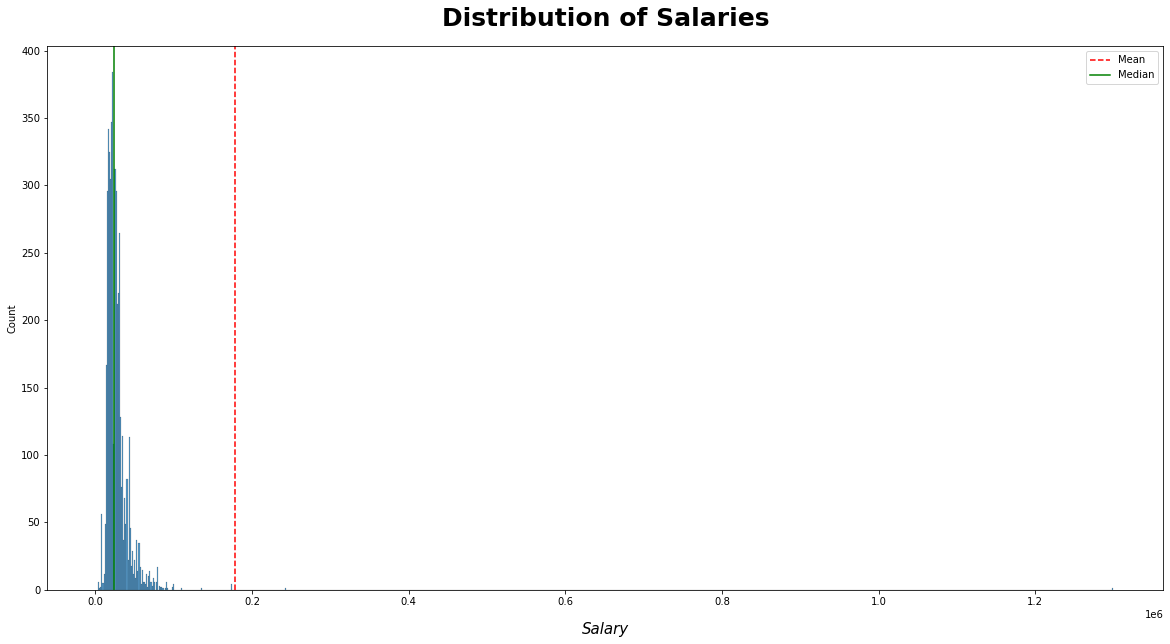

In [74]:
#  creating histogram to check for outliers in the salary column
jobs_salary = pithy_ncr_jobs.salary
jobs_salary_statistic = jobs_salary.describe()
jobs_salary_mean = jobs_salary_statistic.mean()
jobs_salary_median = jobs_salary_statistic.median()

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.histplot(x=jobs_salary)

ax.set_xlabel('Salary', size=15, labelpad=15, style='italic')
ax.set_title('Distribution of Salaries', size=25, weight='bold', pad=20)
ax.axvline(x=jobs_salary_mean, color='r', linestyle='--', label='Mean')
ax.axvline(x=jobs_salary_median, color='g', linestyle='-', label='Median')
ax.legend()

display(jobs_salary_statistic)

In [75]:
#  remove outlier with IQR method
clean_ncr_jobs = remove_outlier(pithy_ncr_jobs)
clean_ncr_jobs

C:\Users\Admin\AppData\Local\Temp\ipykernel_28656\234227123.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outlier = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]


,listing,location,salary,company,city
0,Phone Banker/ Call Center Agent,makati,"22,500.000",Eastwest Bank,makati
1,Healthcare Customer Support Intern,makati,"7,500.000",Katalyst.ph,makati
2,TESTER,makati,"20,000.000",Döhle Shipmanage,makati
3,Business Development Officer,makati,"26,750.000",Eastwest Bank,makati
4,Physical Fitness Advisor,remote in makati,"27,750.000",Katalyst.ph,makati
...,...,...,...,...,...
4484,Recruitment Associate | Shared Services (EL 1709),taguig,"20,500.000",Accenture,taguig
4485,MANDARIN TEACHER-Urgent Hiring,taguig,"19,000.000",MindChamps Inter,taguig
4486,Station Supervisor,taguig,"19,000.000",Cleanfuel Autoga,taguig
4487,Batching Plant Operator,taguig,"19,000.000",Megacem Concrete,taguig


count    4,489.000
mean    24,267.196
std      8,143.792
min      3,301.000
25%     18,000.000
50%     22,500.000
75%     28,500.000
max     47,512.000
Name: salary, dtype: float64

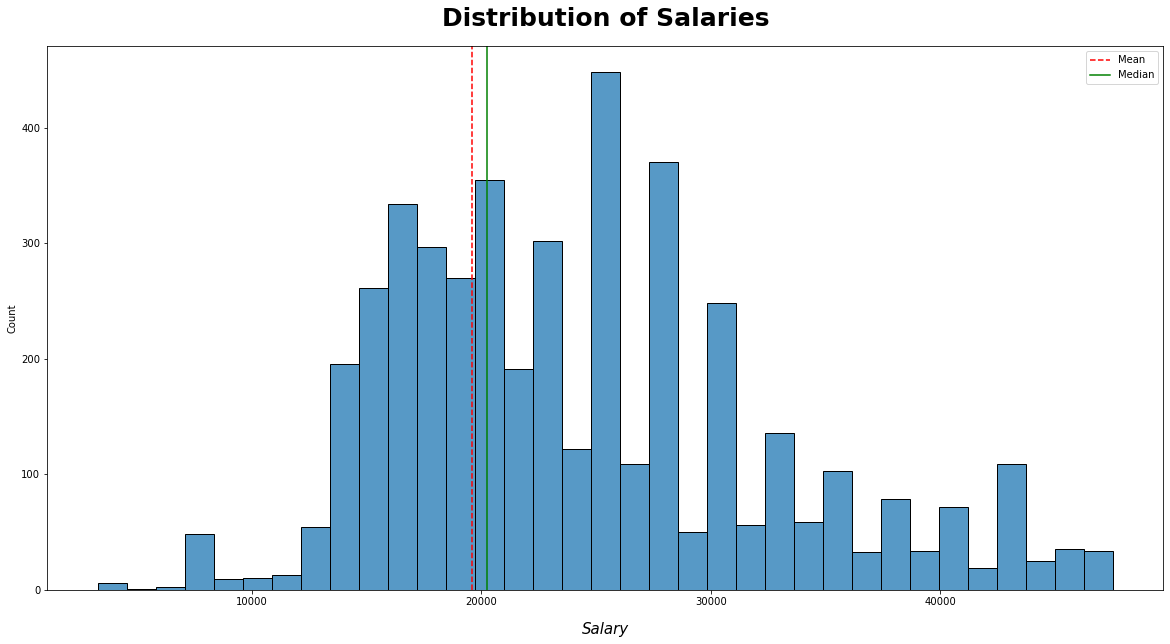

In [76]:
#  creating histogram to verify
clean_jobs_salary = clean_ncr_jobs.salary
clean_jobs_salary_statistic = clean_jobs_salary.describe()
clean_jobs_salary_mean = clean_jobs_salary_statistic.mean()
clean_jobs_salary_median = clean_jobs_salary_statistic.median()

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.histplot(x=clean_jobs_salary)

ax.set_xlabel('Salary', size=15, labelpad=15, style='italic')
ax.set_title('Distribution of Salaries', size=25, weight='bold', pad=20)
ax.axvline(x=clean_jobs_salary_mean, color='r', linestyle='--', label='Mean')
ax.axvline(x=clean_jobs_salary_median, color='g', linestyle='-', label='Median')
ax.legend()

display(clean_jobs_salary_statistic)

<h2>Exploratory Data Analysis</h2>

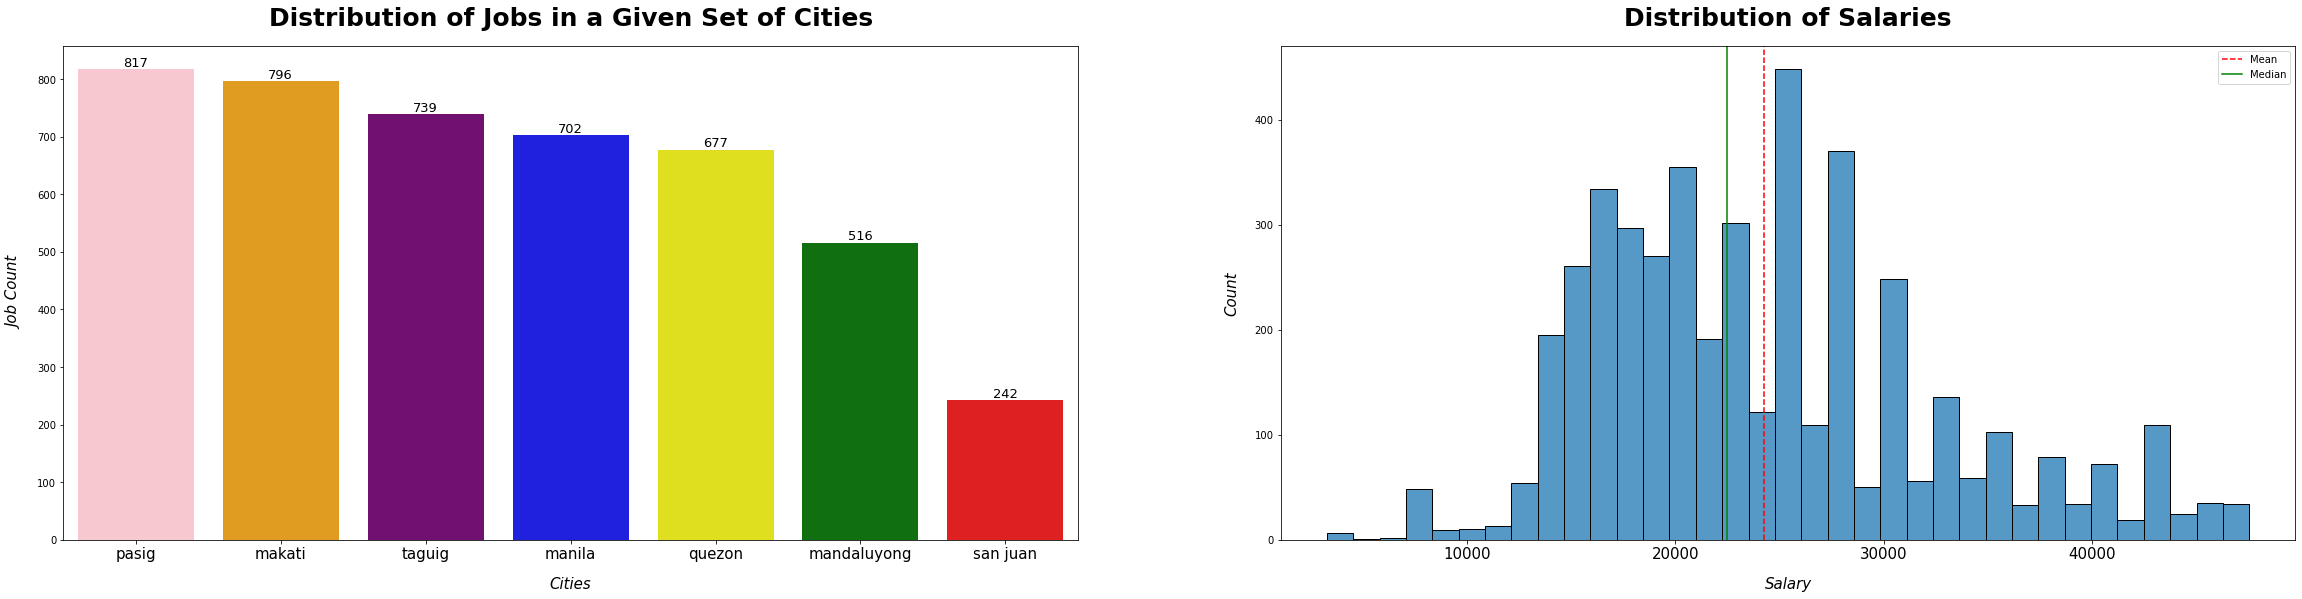

In [77]:
city_dist = clean_ncr_jobs.groupby('city').listing.count().reset_index().sort_values(by='listing', ascending=False)
salary_dist = clean_ncr_jobs.salary

#  creating figure 
fig = plt.figure(figsize=(40,20))

#  bar chart to show the distribution of properties in the seven cities 
ax_city = fig.add_subplot(221)
ax_city = sns.barplot(x = city_dist.city, y = city_dist.listing, palette=city_palettes)

ax_city.bar_label(ax_city.containers[0], size=13);
ax_city.set_ylabel('Job Count', size=15, labelpad=15, style='italic')
ax_city.set_xlabel('Cities', size=15, labelpad=15, style='italic')
ax_city.set_title('Distribution of Jobs in a Given Set of Cities', size=25, weight='bold', pad=20);

plt.xticks(size=15);

#  bar chart to show the distribution of properties in the seven cities 
ax_salary = fig.add_subplot(222)
ax_salary = sns.histplot(x=salary_dist)

ax_salary.set_ylabel('Count', size=15, labelpad=15, style='italic')
ax_salary.set_xlabel('Salary', size=15, labelpad=15, style='italic')
ax_salary.set_title('Distribution of Salaries', size=25, weight='bold', pad=20);
ax_salary.axvline(x=salary_dist.mean(), color='r', linestyle='--', label='Mean')
ax_salary.axvline(x=salary_dist.median(), color='g', linestyle='-', label='Median')
ax_salary.legend()

plt.xticks(size=15);


In [78]:
def eda_salary_city(df, city):
    specific_df = df.query(f"city == '{city}'")
    
    salary_dist = specific_df.salary
    
    fig = plt.figure(figsize=(20,10));
    
    ax_salary = fig.add_subplot(111);
    ax_salary = sns.histplot(x=salary_dist);

    ax_salary.set_ylabel('Count', size=15, labelpad=15, style='italic');
    ax_salary.set_xlabel('Salary', size=15, labelpad=15, style='italic');
    ax_salary.set_title('Distribution of Salaries', size=25, weight='bold', pad=20);
    ax_salary.axvline(x=salary_dist.mean(), color='r', linestyle='--', label='Mean');
    ax_salary.axvline(x=salary_dist.median(), color='g', linestyle='-', label='Median');
    ax_salary.legend();
    
    fig.suptitle(f'Data on Salaries in {city.capitalize()}', size=35, weight='bold');
    
    plt.xticks(size=15);
    
    print(f'Summary Statistics for {city.capitalize()}');
    display(salary_dist.describe());
    

Summary Statistics for San juan


count      242.000
mean    21,392.597
std      7,590.369
min      7,500.000
25%     16,057.250
50%     19,000.000
75%     25,750.000
max     46,678.000
Name: salary, dtype: float64

Summary Statistics for Manila


count      702.000
mean    26,211.709
std      8,630.117
min      7,500.000
25%     19,241.750
50%     25,750.000
75%     31,579.250
max     47,512.000
Name: salary, dtype: float64

Summary Statistics for Quezon


count      677.000
mean    23,022.476
std      7,326.288
min      3,662.000
25%     17,000.000
50%     22,500.000
75%     27,165.000
max     47,500.000
Name: salary, dtype: float64

Summary Statistics for Mandaluyong


count      516.000
mean    22,564.031
std      7,374.244
min      7,500.000
25%     17,500.000
50%     20,644.000
75%     25,750.000
max     47,500.000
Name: salary, dtype: float64

Summary Statistics for Pasig


count      817.000
mean    24,417.419
std      7,889.462
min      3,662.000
25%     18,000.000
50%     24,000.000
75%     29,173.000
max     47,500.000
Name: salary, dtype: float64

Summary Statistics for Makati


count      796.000
mean    24,580.325
std      8,664.335
min      3,301.000
25%     18,244.250
50%     22,500.000
75%     29,787.000
max     47,512.000
Name: salary, dtype: float64

Summary Statistics for Taguig


count      739.000
mean    25,187.537
std      8,137.704
min      4,315.000
25%     19,018.000
50%     24,000.000
75%     30,000.000
max     47,512.000
Name: salary, dtype: float64

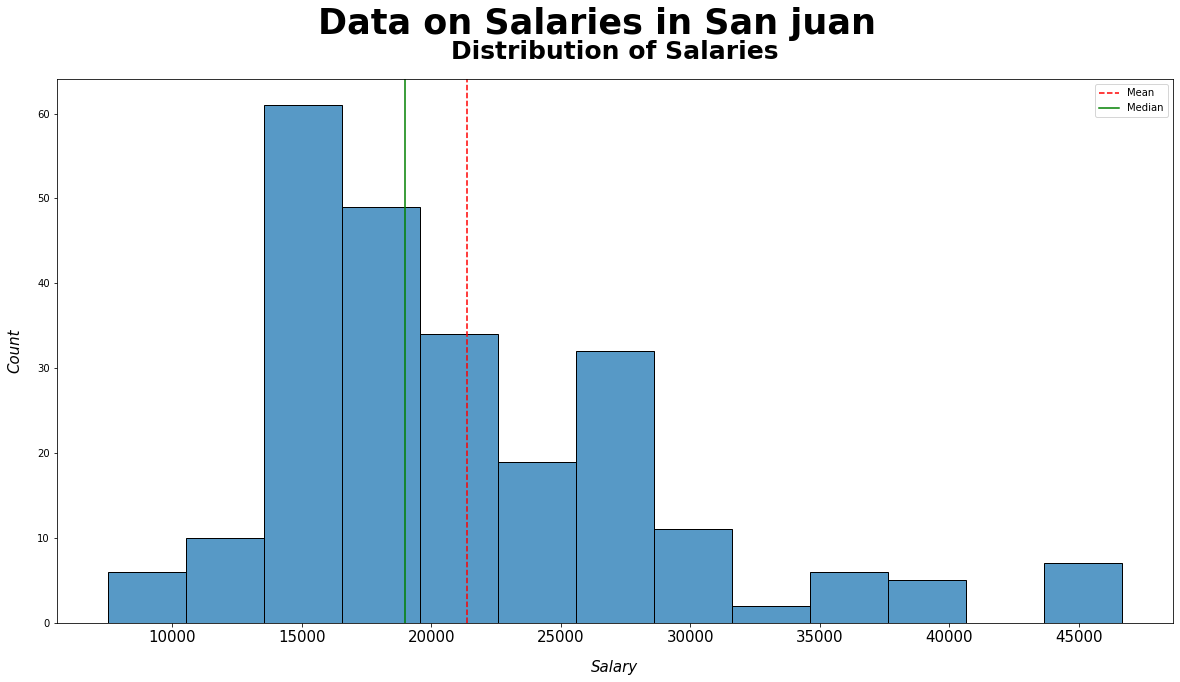

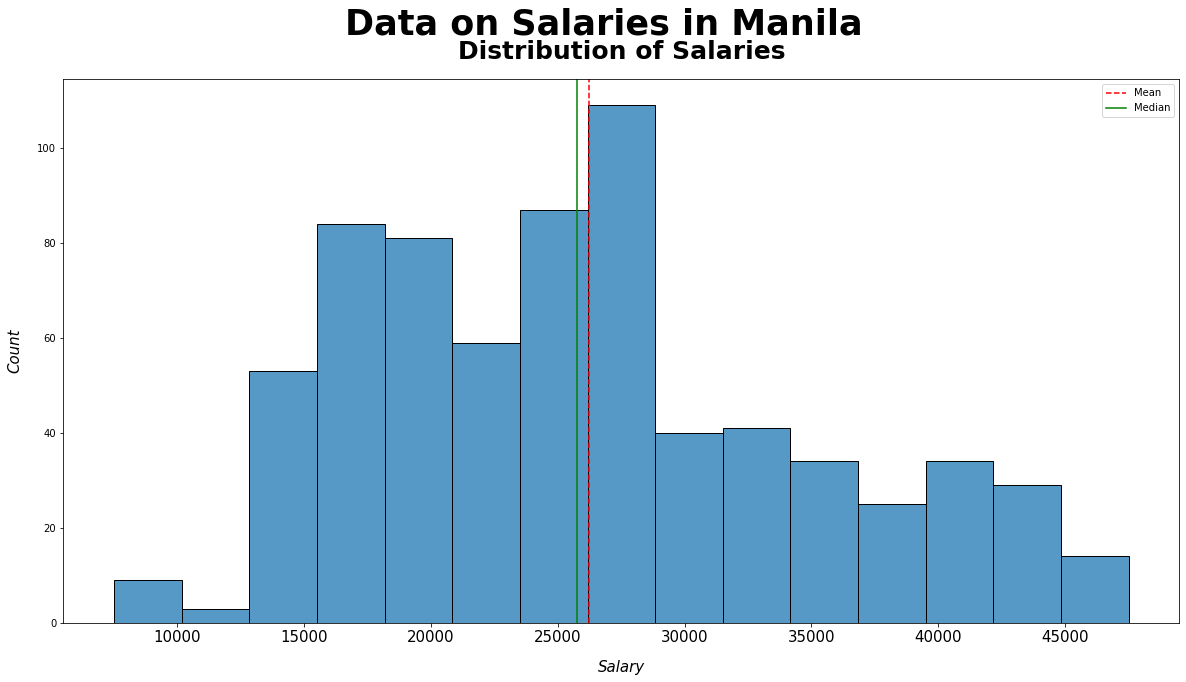

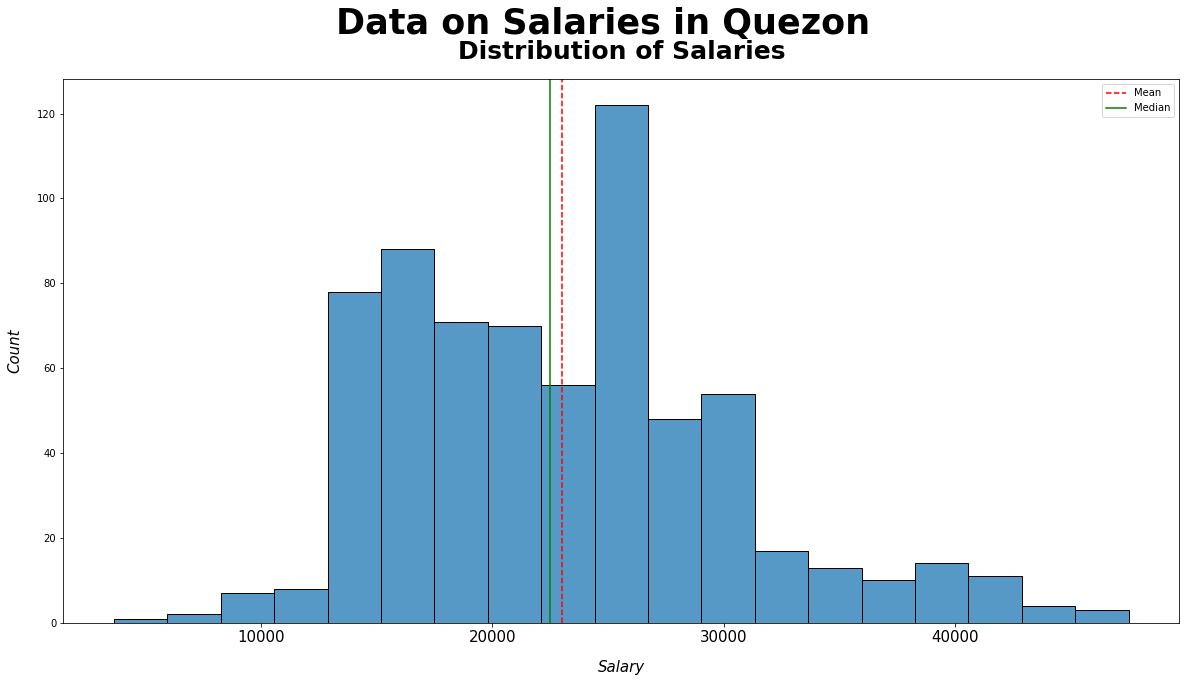

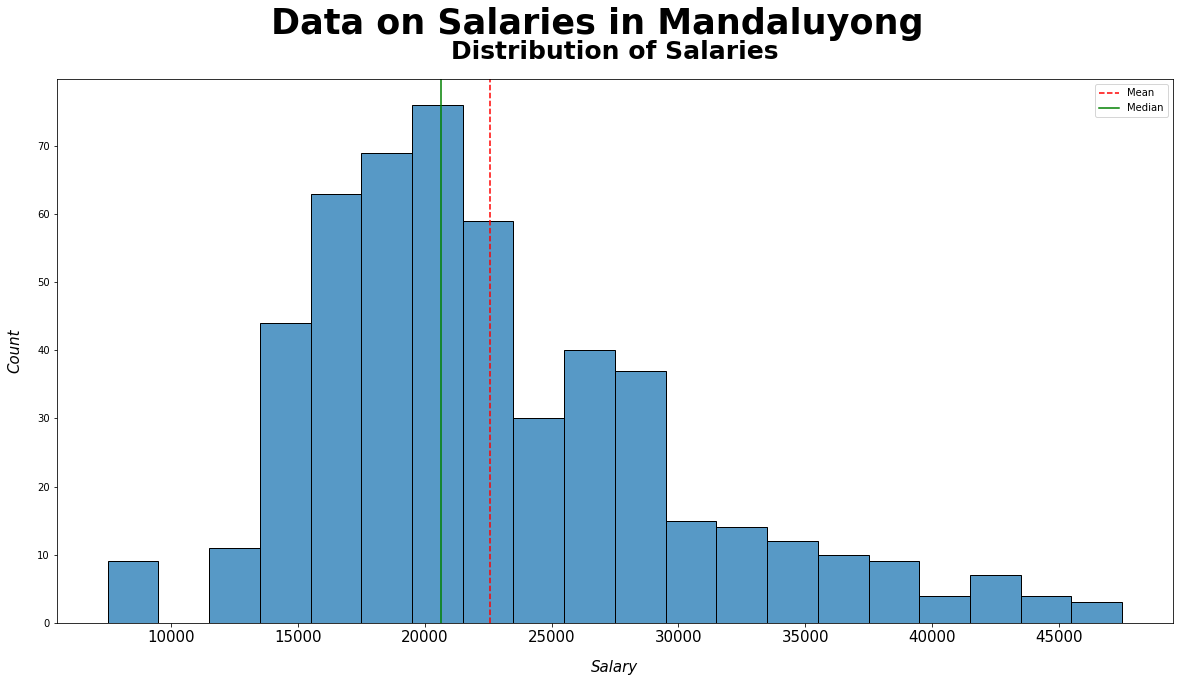

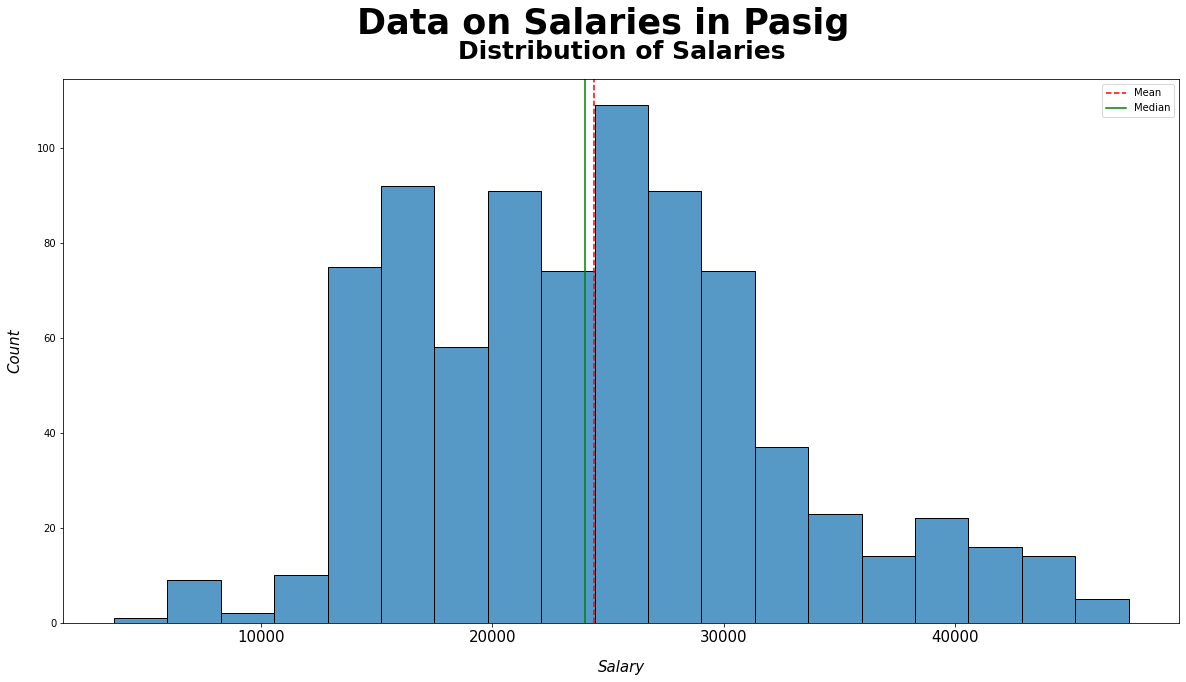

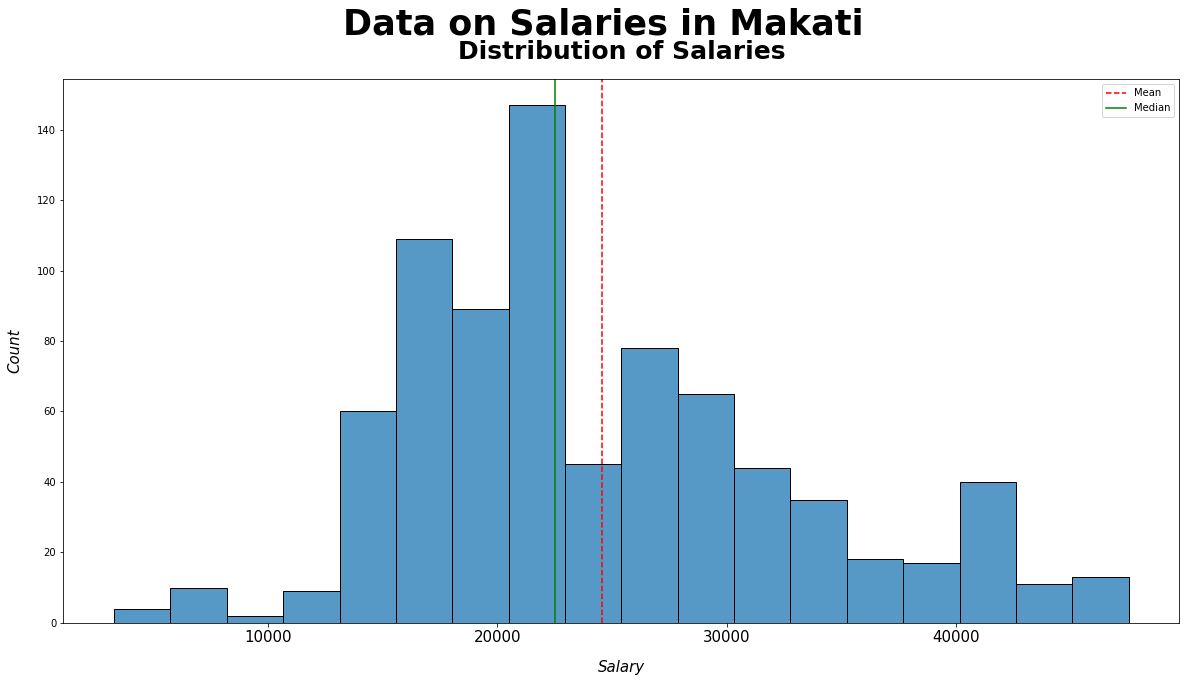

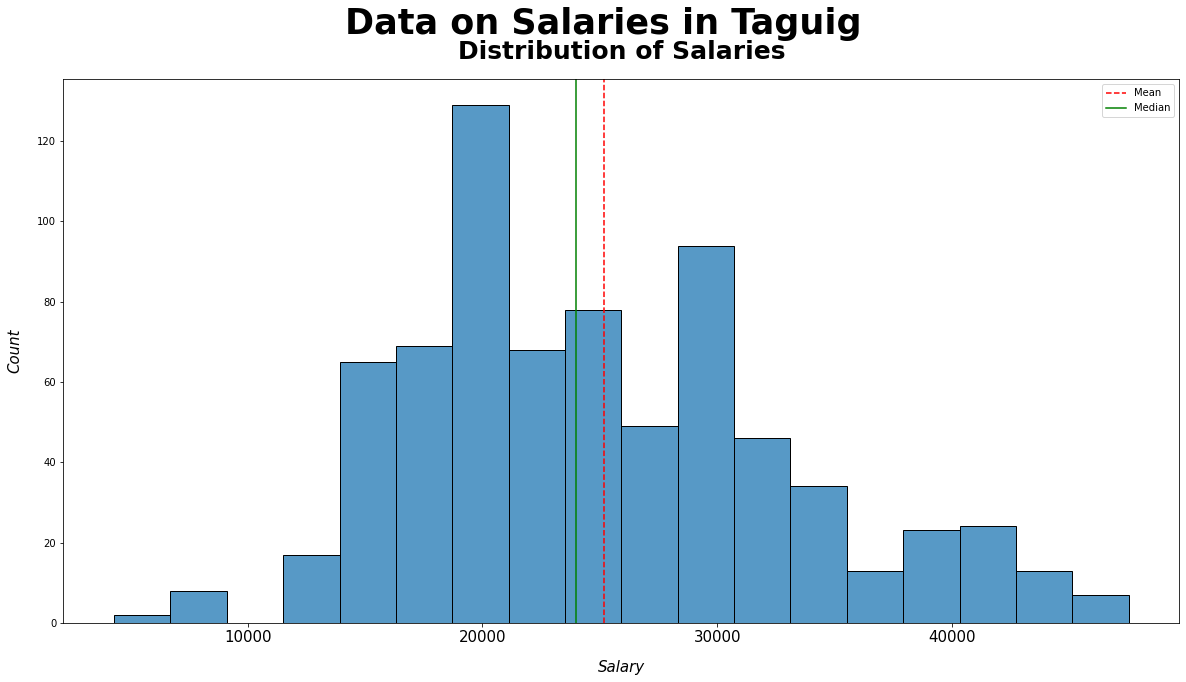

In [79]:
for city in cities:
    eda_salary_city(clean_ncr_jobs, city)

In [80]:
clean_ncr_jobs.to_csv('data/clean/clean_ncr_jobs.csv')

<h1>Geospatial Dataset</h1>

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,179,PHL,Philippines,1,Abra,1,Bangued,PH.AB.BN,0,140101,Bayan|Munisipyo,Municipality,None,None,"POLYGON ((120.61553 17.62360, 120.61870 17.623..."
1,179,PHL,Philippines,1,Abra,2,Boliney,PH.AB.BL,0,140102,Bayan|Munisipyo,Municipality,None,None,"POLYGON ((120.90749 17.41933, 120.92464 17.413..."
2,179,PHL,Philippines,1,Abra,3,Bucay,PH.AB.BU,0,140103,Bayan|Munisipyo,Municipality,None,None,"POLYGON ((120.74548 17.57671, 120.75101 17.575..."
3,179,PHL,Philippines,1,Abra,4,Bucloc,PH.AB.BC,0,140104,Bayan|Munisipyo,Municipality,None,None,"POLYGON ((120.82477 17.41721, 120.78956 17.416..."
4,179,PHL,Philippines,1,Abra,5,Daguioman,PH.AB.DG,0,140105,Bayan|Munisipyo,Municipality,None,None,"POLYGON ((120.98141 17.50534, 120.98367 17.504..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,179,PHL,Philippines,81,Zamboanga Sibugay,1643,Roseller Lim,PH.ZS.RS,0,98312,Bayan|Munisipyo,Municipality,None,None,"MULTIPOLYGON (((122.54519 7.68240, 122.54472 7..."
1648,179,PHL,Philippines,81,Zamboanga Sibugay,1644,Siay,PH.ZS.SA,0,98313,Bayan|Munisipyo,Municipality,None,None,"MULTIPOLYGON (((122.80055 7.73917, 122.80083 7..."
1649,179,PHL,Philippines,81,Zamboanga Sibugay,1645,Talusan,PH.ZS.TL,0,98314,Bayan|Munisipyo,Municipality,None,None,"MULTIPOLYGON (((122.91917 7.34111, 122.91861 7..."
1650,179,PHL,Philippines,81,Zamboanga Sibugay,1646,Titay,PH.ZS.TT,0,98315,Bayan|Munisipyo,Municipality,None,None,"POLYGON ((122.68086 7.88831, 122.68091 7.88682..."


<AxesSubplot:>

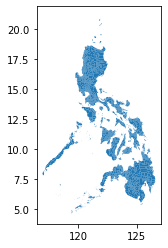

In [81]:
#  to clean geospatial data
ph_geodata = gpd.read_file('data/ph-adm/PHL_adm2.shp')
display(ph_geodata)
ph_geodata.plot()

In [82]:
ncr_geodata = ph_geodata.query("NAME_1 == 'Metropolitan Manila'")
ncr_geodata = ncr_geodata.rename(columns={'NAME_2': 'city'})
ncr_geodata['city'] = ncr_geodata['city'].str.replace('City of', '')
ncr_geodata['city'] = ncr_geodata['city'].str.replace('City', '')
ncr_geodata['city'] = ncr_geodata['city'].str.lower()
ncr_geodata = ncr_geodata.drop(columns=['NAME_1'])
ncr_geodata = ncr_geodata[['city', 'geometry']] 
ncr_geodata

,city,geometry
964,kalookan,"MULTIPOLYGON (((121.01953 14.68939, 121.01971 ..."
965,las piñas,"MULTIPOLYGON (((120.98571 14.48585, 120.98588 ..."
966,makati,"POLYGON ((121.02175 14.57696, 121.02316 14.576..."
967,malabon,"POLYGON ((120.93582 14.69482, 120.93593 14.694..."
968,mandaluyong,"POLYGON ((121.05737 14.60128, 121.05743 14.601..."
969,manila,"POLYGON ((120.97886 14.63668, 120.97897 14.636..."
970,marikina,"POLYGON ((121.10728 14.67131, 121.10785 14.671..."
971,muntinlupa,"POLYGON ((121.04676 14.46838, 121.04719 14.468..."
972,navotas,"POLYGON ((120.92940 14.69242, 120.93277 14.689..."
973,parañaque,"MULTIPOLYGON (((120.98647 14.50257, 120.98667 ..."


<AxesSubplot:>

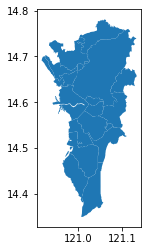

In [83]:
ncr_geodata.plot()